In [1]:
from commonfunctions import *
import joblib
import imageio as iio
import cv2
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
from scipy.signal import argrelextrema
from skimage import data, color, feature,morphology
%load_ext autoreload
%autoreload 2
%matplotlib inline.


KeyError: 'inline.'

In [ ]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
img_roberts = roberts(img)
img_perwitt = prewitt(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
img_sobel = sobel(img)
img_canny = canny(img)
show_images([img,img_roberts,img_perwitt])
show_images([img_sobel_h,img_sobel_v,img_sobel,img_canny])

In [ ]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('ACdata_base/9/1496.jpg')
h = hog.compute(im)
print(hog)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

img = cv2.imread('ACdata_base/9/1496.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
#print(lines)

HV = 0;
Total = 0
for line in lines:
    if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
        HV+=1;
    Total +=1

HVSL = Total - HV

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def HVSL(gray):    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,80)
    print(lines)
    if (lines is None): 
        return -1 
    HV = 0;
    Total = 0
    for line in lines:
        if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
            HV+=1;
        Total +=1

    return HV/Total
def HPP(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 1)
    x=x/np.max(x)
    return x
def get_max_vertical(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 0)
    return np.max(x)/binary_image.shape[0]
def HPP_Skeletonize(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(morphology.skeletonize(binary_image), axis = 1)
    x=x/np.max(x)
    return len(argrelextrema(x, np.greater)[0])/binary_image.shape[0]
    #print(np.array(list(argrelextrema(x, np.greater))).shape[1])
    #maximas=np.sort(x[argrelextrema(x, np.greater)[0]])
    #base_lines=[maximas[-1]]
    #return len(argrelextrema(x, np.greater)[0])
#     if(len(maximas)>1):
#         base_lines.append(maximas[-2])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>2):
#         base_lines.append(maximas[-3])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>3):
#         base_lines.append(maximas[-4])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>4):
#         base_lines.append(maximas[-5])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>5):
#         base_lines.append(maximas[-6])
#     else:
#         base_lines.append(0)
    return base_lines
def pre_process(x):
    #bet7awel le binary
    if x[0][0][0]>128:
        return (x<128).astype(int)
    else:
        return (x>128).astype(int)
def get_histogram_of_gradients(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    _, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist=np.histogram(angle)[0]/(angle.shape[0]*angle.shape[1])
    print(hist)
    return hist/hist.max()
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    #print(mask.any(1),mask.any(0))
    return img[np.ix_(mask.any(1).reshape(-1),mask.any(0).reshape(-1))]
def center_of_mass(img,scale=1):
    partition_size_x=img.shape[0]//scale
    partition_size_y=img.shape[1]//scale
    #centers_x=[]
    #centers_y=[]
    #for row in range(1,img.shape[0],partition_size_x):
    #    for col in range(1,img.shape[1],partition_size_y):
        #parition=img[row:row+partition_size_x,col:col+partition_size_y]
                
    mass_x, mass_y = np.where(img == 1)
            # mass_x and mass_y are the list of x indices and y indices of mass pixels

    cent_x = np.average(mass_x)
    cent_y = np.average(mass_y)
#             if cent_x is None:
#                 print(parition)
#             centers_y.append(cent_y)
#             centers_x.append(cent_y)
    return cent_x/img.shape[0]
def get_corners(gray):
    dst = cv2.cornerHarris(gray,2,3,0.04)
    #print(dst)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    img=gray.copy()
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.3*dst.max()]=255
    #plt.imshow(img)
    print(np.round(np.sum(dst>0.3*dst.max()),5)/np.round(np.sum(dst>0.01*dst.max()),5))
    return np.round(np.sum(dst>0.3*dst.max()),5)/np.round(np.sum(dst>0.01*dst.max()),5)
def sift_discriptor(img):
    sift = cv2.SIFT_create()
    image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    keypoints, descriptors = sift.detectAndCompute(image8bit, None)
    sift_image = cv2.drawKeypoints(image8bit, keypoints, img)
    print(descriptors.shape)
    plt.imshow(sift_image)
    return descriptors.shape[0]/(img.shape[0]*img.shape[1])

def count_ones(img):
    return np.sum(img)/(img.shape[0]*img.shape[1])
def LBP(image, eps=1e-7,numPoints=24,radius=8):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = feature.local_binary_pattern(image.reshape(image.shape[0],image.shape[1]), numPoints,radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
    bins=np.arange(0, numPoints + 3),
    range=(0, numPoints + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist

In [5]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 9

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('ACdata_base',
                                    target_size=(500, 500),
                                    batch_size=73139,
                                    class_mode='sparse',
                                   color_mode='grayscale',
                                    shuffle=True,
    seed=42 )
X , y = data.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11);
#X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=11);
X_train.shape

Found 1685 images belonging to 9 classes.


(1348, 500, 500, 1)

In [6]:
pre_processed_train=[pre_process(patch) for patch in X_train] # de bet7awel 2el training set le binary fa law feature sha8ala 3ala binary hanesta5dem da

In [7]:
cropped_images=[crop_image(patch) for patch in pre_processed_train]

In [8]:
resized_cropped_images=[cv2.resize(np.array(cropped, dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA) for cropped in cropped_images]

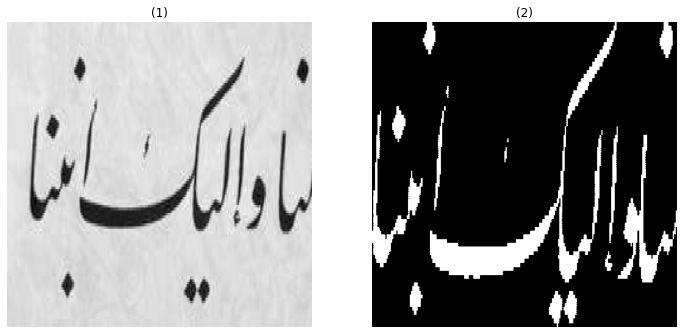

In [22]:
show_images([X_train[0],resized_cropped_images[0]])

In [15]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


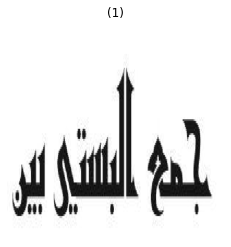

[255.]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


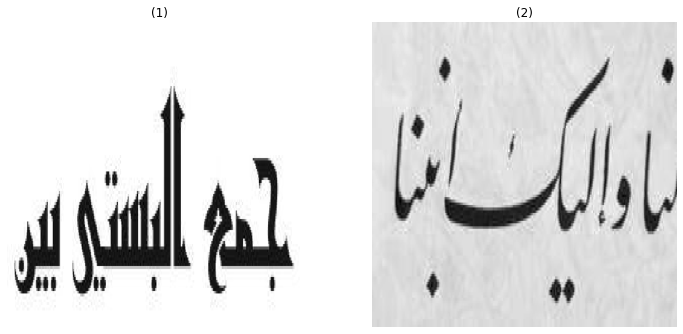

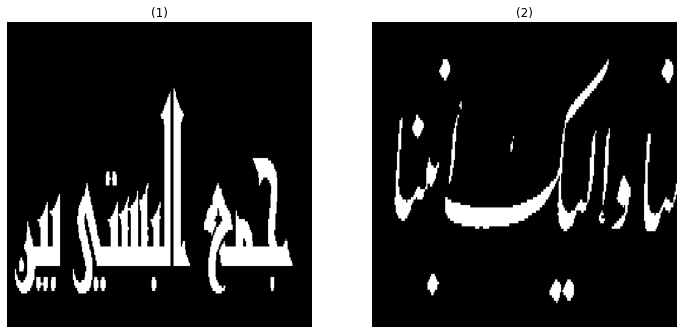

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [16]:
show_images([X_train[1]])
print(X_train[1][0][0])
print(pre_process(X_train[1]))
show_images([X_train[1],X_train[0]])
show_images([pre_process(X_train[1]),pre_process(X_train[0])]) 
print(pre_process(X_train[1]))

(237, 128)


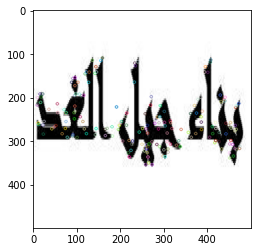

In [80]:
sift_discriptor(X_train[5])

In [ ]:
lbp=np.array([LBP(cv2.resize(img, (250,250), interpolation = cv2.INTER_AREA),radius=3) for img in X_train])

In [ ]:
print(lbp.shape)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), lbp, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]}, scoring='accuracy')
grid.fit(lbp, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'LBP.sav'
joblib.dump(grid, filename)

gaussian [0.61481481 0.63333333 0.63703704 0.63197026 0.63568773]
svm 0.6817265592730275


['LBP.sav']

In [ ]:
ones=np.array([count_ones(img) for img in resized_cropped_images]).reshape(-1,1)

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), corners, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(corners, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'Corners.sav'
joblib.dump(grid, filename)

gaussian [0.32592593 0.31111111 0.32222222 0.37546468 0.33828996]
svm 0.31827068704392125


['Corners.sav']

In [40]:
corners=np.array([get_corners(img) for img in X_train]).reshape(-1,1)

0.07719670021948082
0.07569155942851352
0.01164114238410596
0.550458058975093
0.0427061310782241
0.04639175257731959
0.05972396486825596
0.046866750599033426
0.042836812144212526
0.03798707656158214
0.40201494962625933
0.10837403045101983
0.7292807249386445
0.49969046636401154
0.03232309189489782
0.1502747471529824
0.48465909090909093
0.05529715762273902
0.10613375544123467
0.4649984162179284
0.07204645816949973
0.05897661602051361
0.15804121269540503
0.04415137614678899
0.11577551922227132
0.12560948984790044
0.09988839285714286
0.09210050251256281
0.03223798854866816
0.07394941345344751
0.06630971993410215
0.13138357705286838
0.09449473489746905
0.06839639135603888
0.028990124243389613
0.060103215561730844
0.05729307821562144
0.10932170353766689
0.11337815905402272
0.3670076726342711
0.06725468577728776
0.6514324693042292
0.05398742758535684
0.43509748447013963
0.13587069864442128
0.03995457361139789
0.058905348077056816
0.05254955007939775
0.5045558891047148
0.10678595222232797
0.11

0.07049945387746996
0.12158620106535892
0.04263826921458035
0.008091572922834024
0.04004775881796926
0.0471081307627829
0.03551416620629785
0.021175201186890258
0.31531988974321773
0.08103370278217598
0.6317073170731707
0.05523893029373082
0.12425202393523407
0.0438022126890946
0.03711031175059952
0.14217252396166133
0.42918894323740187
0.05769899200556135
0.6677480400108138
0.12460805945883173
0.10397599399849962
0.020654340504502027
0.057123879109930255
0.05115961800818554
0.05753856547686071
0.10246575342465754
0.1046849087893864
0.0070727812000912615
0.05108225108225108
0.05383078667458561
0.057004123985632565
0.029219282883215042
0.023387014052723355
0.13359089060593737
0.08684863523573201
0.0925575101488498
0.04236328515286752
0.49375866851595007
0.19002608955989905
0.07371188222923239
0.06723668869024485
0.006734211005278165
0.12538699690402477
0.07122460634739333
0.01434460947647823
0.3847645429362881
0.11357621049353885
0.05225579869553471
0.014298799104416853
0.45534420801113

0.6064613191860004
0.10190590055559463
0.07653560934657898
0.07163858013624955
0.18406476352790796
0.05331948411667965
0.06403129503808935
0.07052718480952942
0.09814473870556578
0.1592323947684048
0.06202608431907795
0.047852331379581836
0.0821696405482286
0.0817238912732475
0.059649428795674544
0.06967878573949876
0.01282803722646097
0.07596912670193391
0.1169566560280037
0.06920492721164613
0.0664203969288715
0.10049243115082984
0.026515290239882805
0.053998632946001365
0.0728643216080402
0.5763149297615159
0.09937888198757763
0.5384320490703469
0.1239108502247088
0.7382526029877773
0.05312116347152706
0.08397312859884837
0.057412790697674417
0.5100740485620803
0.03273638594476061
0.08204259438528558
0.03321558796718323
0.03809036408831701
0.08970120009796718
0.07875533526091147
0.0893163207008189
0.1084397695967944
0.0090752564746395
0.03018935334047874
0.12784971730804304
0.11349382965810237
0.6566643405443127
0.021447237992250158
0.8128430296377607
0.10017042226850975
0.035550263

0.622707423580786
0.025735885475309635
0.07055124299891913
0.05999843346126733
0.5494250331711632
0.7553006604101494
0.0840273545940822
0.07331514483078888
0.03885832187070151
0.25683707521276383
0.022193749141994235
0.5312883435582823
0.070220855917806
0.01905268759978712
0.06266168439206668
0.13012117714945182
0.016249451032059728
0.08014202383971596
0.11510716152639833
0.08120204603580562
0.033587126734704896
0.04150105817374697
0.11602671118530884
0.07108094262295082
0.13228603923798693
0.06692913385826772
0.03850889192886457
0.15774223458507186
0.05460811169037731
0.06107150731241273
0.06182197496522949
0.13780155824650334
0.46574614976101963
0.034027881876780096
0.20610204550678005
0.009386311979122822
0.12198483804272915
0.08447923277624991
0.05200682543215372
0.09516922186867226
0.035854172943657725
0.017733775771092856
0.043921852387843706
0.09932184232834133
0.07639586950562004
0.07313707451701931
0.09584884285483088
0.10732235701906412
0.08699158889272958
0.5087660148347943


In [89]:
print(corners.min())
get_corners(X_train[corners.argmin()])

0.004252159827213823
0.004252159827213823


0.004252159827213823

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), corners, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(corners, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'Corners.sav'
joblib.dump(grid, filename)

gaussian [0.32592593 0.31111111 0.32222222 0.37546468 0.33828996]
svm 0.31827068704392125


['Corners.sav']

In [37]:
max_v=np.array([get_max_vertical(img) for img in resized_cropped_images]).reshape(-1,1)

In [38]:
max_v.shape

(1348, 1)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), max_v, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(max_v, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'MAX_V.sav'
joblib.dump(grid, filename)

gaussian [0.41111111 0.41111111 0.38888889 0.42379182 0.41635688]
svm 0.359044471981275


['MAX_V.sav']

In [44]:
center_of_masses=np.array([center_of_mass(img) for img in resized_cropped_images]).reshape(-1,1)

In [45]:
print(np.array(center_of_masses).shape)
print(center_of_masses)

(1348, 1)
[[0.62509534]
 [0.68519484]
 [0.585345  ]
 ...
 [0.61772987]
 [0.43658614]
 [0.52711445]]


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), center_of_masses, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(center_of_masses, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'center_of_mass.sav'
joblib.dump(grid, filename)

gaussian [0.22592593 0.27407407 0.24074074 0.26022305 0.26394052]
svm 0.2284730827481757


['center_of_mass.sav']

In [42]:

values = []
for gray in X_train:
    print(gray.shape)
    values.append(HVSL(np.uint8(gray)))
    
    

(500, 500, 1)
[[[3.0300000e+02 1.5707964e+00]]

 [[4.5400000e+02 0.0000000e+00]]

 [[2.9500000e+02 1.5707964e+00]]

 [[2.8300000e+02 1.6231562e+00]]

 [[2.9100000e+02 1.6231562e+00]]

 [[4.7000000e+01 0.0000000e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.0800000e+02 1.5707964e+00]]

 [[3.3800000e+02 1.5707964e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[3.2700000e+02 6.9813170e-02]]

 [[3.8800000e+02 1.3962634e-01]]

 [[3.9100000e+02 1.5707964e-01]]

 [[4.4000000e+01 0.0000000e+00]]

 [[3.0900000e+02 0.0000000e+00]]

 [[2.8600000e+02 1.6231562e+00]]

 [[4.5100000e+02 0.0000000e+00]]

 [[5.2000000e+01 5.2359879e-02]]

 [[2.7600000e+02 1.7104226e+00]]

 [[3.0700000e+02 1.5533431e+00]]

 [[2.9000000e+02 1.5707964e+00]]

 [[2.8800000e+02 1.6231562e+00]]

 [[3.0800000e+02 1.5184364e+00]]

 [[2.8200000e+02 1.6580628e+00]]]
(500, 500, 1)
[[[ 273.           0.       ]]

 [[ 404.           1.5707964]]

 [[ 399.           1.5707964]]

 [[ 268.           0.       ]]

 [[ 257.           0.       

 [[-101.           3.106686 ]]]
(500, 500, 1)
[[[478.          0.       ]]

 [[379.          1.5707964]]

 [[455.          1.5707964]]

 [[454.          0.       ]]

 [[416.          1.5707964]]

 [[430.          0.       ]]

 [[358.          0.       ]]

 [[382.          0.       ]]

 [[407.          0.       ]]

 [[148.          1.5707964]]

 [[ 20.          0.       ]]

 [[213.          0.       ]]

 [[ 32.          1.5707964]]

 [[334.          0.       ]]

 [[341.          1.5707964]]

 [[236.          0.       ]]

 [[111.          1.5707964]]

 [[141.          0.       ]]

 [[164.          0.       ]]

 [[186.          1.5707964]]

 [[261.          0.       ]]

 [[ 72.          1.5707964]]

 [[ 67.          0.       ]]

 [[189.          0.       ]]

 [[ 44.          0.       ]]

 [[115.          0.       ]]

 [[309.          0.       ]]

 [[302.          1.5707964]]

 [[225.          1.5707964]]

 [[287.          0.       ]]]
(500, 500, 1)
[[[ 3.2500000e+02  1.5707964e+00]]

 [[ 

[[[ 278.            1.5707964 ]]

 [[ 274.            1.5707964 ]]

 [[ 249.            0.        ]]

 [[ 293.            1.5707964 ]]

 [[ 244.            0.        ]]

 [[ 288.            1.5707964 ]]

 [[ 281.            1.553343  ]]

 [[ 283.            1.5707964 ]]

 [[ 272.            1.5882496 ]]

 [[ 269.            1.5707964 ]]

 [[ 268.            1.5882496 ]]

 [[ 279.            1.5358897 ]]

 [[ 264.            1.5707964 ]]

 [[ 277.            1.553343  ]]

 [[ 165.            0.        ]]

 [[ 249.            1.5707964 ]]

 [[ 288.            1.5009831 ]]

 [[ 284.            1.5358897 ]]

 [[ 272.            1.553343  ]]

 [[ 262.            0.7853982 ]]

 [[ 244.            1.5707964 ]]

 [[ 298.            1.4660766 ]]

 [[ 287.            1.5184364 ]]

 [[ 263.            1.6057029 ]]

 [[ 296.            1.5009831 ]]

 [[ 292.            1.5184364 ]]

 [[-245.            3.1241393 ]]

 [[ 282.            1.5184364 ]]

 [[ 404.            0.        ]]

 [[ 286.      

 [[-1.2300000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[485.          1.5707964]]

 [[449.          1.5707964]]

 [[ 18.          1.5707964]]

 [[ 19.          0.       ]]

 [[482.          0.       ]]

 [[339.          0.       ]]

 [[413.          1.5707964]]

 [[ 56.          1.5707964]]

 [[342.          1.5707964]]

 [[199.          1.5707964]]

 [[232.          0.       ]]

 [[234.          1.5707964]]

 [[161.          1.5707964]]

 [[126.          1.5707964]]

 [[268.          0.       ]]

 [[377.          1.5707964]]

 [[304.          0.       ]]

 [[124.          0.       ]]

 [[374.          0.       ]]

 [[305.          1.5707964]]

 [[ 91.          1.5707964]]

 [[447.          0.       ]]

 [[ 53.          0.       ]]

 [[ 88.          0.       ]]

 [[410.          0.       ]]]
(500, 500, 1)
[[[ 3.4100000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 4.

 [[-2.5900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[-1.6800000e+02  3.1066861e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  2.0943952e-01]]

 [[-4.1100000e+02  3.1241393e+00]]

 [[-1.1800000e+02  3.1066861e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[-4.4100000e+02  3.1066861e+00]]

 [[ 2.8700000e+02  1.9198622e-01]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[-1.2500000e+02  3.1241393e+00]]

 [[-1.1400000e

 [[-2.0100000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.5500000e+02  1.5707964e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 4.1700000e+02  1.5707964e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 1.1300000e+02  1.5707964e+00]]

 [[ 2.3000000e+01  0.0000000e+00]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  1.5707964e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 3.0300000e

 [[-4.2900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  1.5882496e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 3.4900000e+02  1.5533431e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  1.7453292e-02]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.7453292e-02]]

 [[ 3.1700000e

 [[-405.           3.106686 ]]]
(500, 500, 1)
[[[-424.           3.0892327]]

 [[-447.           3.0892327]]

 [[-429.           3.106686 ]]

 [[-196.           3.0892327]]

 [[ 453.           0.7853982]]

 [[-201.           3.106686 ]]

 [[-207.           3.1241393]]

 [[ 332.           0.7853982]]

 [[ 211.           0.       ]]

 [[-451.           3.106686 ]]

 [[-432.           3.106686 ]]

 [[ 214.           0.       ]]

 [[  95.           0.       ]]]
(500, 500, 1)
[[[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.0300000e+02  0

 [[ 2.4000000e+02  1.6231562e+00]]]
(500, 500, 1)
[[[ 4.7000000e+02  1.5707964e+00]]

 [[ 6.2000000e+01  1.5707964e+00]]

 [[ 2.0000000e+01  1.5707964e+00]]

 [[ 1.0400000e+02  1.5707964e+00]]

 [[ 4.2800000e+02  1.5707964e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  1.5707964e+00]]

 [[ 1.4200000e+02  1.5707964e+00]]

 [[ 3.9000000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  1.5533431e+00]]

 [[ 4.3300000e+02  1.5533431e+00]]

 [[ 3.9200000e+02  1.5533431e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 3.0000000e

 [[-2.8200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[2.8400000e+02 1.5707964e+00]]

 [[3.0700000e+02 1.5707964e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.2200000e+02 1.5707964e+00]]

 [[3.3000000e+02 1.5707964e+00]]

 [[2.7600000e+02 1.5707964e+00]]

 [[2.9100000e+02 1.5707964e+00]]

 [[3.1400000e+02 1.5707964e+00]]

 [[2.3900000e+02 0.0000000e+00]]

 [[3.3700000e+02 1.5707964e+00]]

 [[2.2500000e+02 0.0000000e+00]]

 [[2.9400000e+02 1.5882496e+00]]

 [[3.4500000e+02 1.5707964e+00]]

 [[1.7300000e+02 0.0000000e+00]]

 [[2.4600000e+02 0.0000000e+00]]

 [[2.3200000e+02 0.0000000e+00]]

 [[3.5300000e+02 1.5707964e+00]]

 [[1.7600000e+02 0.0000000e+00]]

 [[2.9700000e+02 1.5533431e+00]]

 [[3.6700000e+02 1.3089969e+00]]

 [[3.2100000e+02 1.6057029e+00]]

 [[4.0600000e+02 2.9670596e-01]]

 [[3.7900000e+02 1.2740903e+00]]

 [[3.7700000e+02 1.2915436e+00]]

 [[3.5100000e+02 1.3613569e+00]]

 [[3.2200000e+02 1.4486233e+00]]

 [[3.2400000e+02 1.5184364e+00]]

 [[3.2700000e+02 1.5533431e+00]]

(500, 500, 1)
[[[ 2.5500000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-1.5400000e+02  3.1241393e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[-2.9300000e+02  3.1241393e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  1.7453292e-01]]

 [[-2.6200000e+02  3.1241393e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  1.7453292e-02]]

 [[ 3.0600000e

[[[47.  0.]]]
(500, 500, 1)
[[[ 8.7000000e+01  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[-2.7000000e+02  3.1241393e+00]]

 [[ 3.9800000e+02  1.5707964e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[-2.6800000e+02  3.1241393e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  1.5533431e+00]]

 [[ 3.9500000e+02  1.5707964e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[-8.7000000e+01  2.9496064e+00]]

 [[ 0.0000000e+00  0.0000000e+00]]

 [[ 4.0200000e+02  1.5533431e+00]]

 [[-7.8000000e+01  2.9321532e+00]]

 [[ 3.3700000e+02  7.8539819e-01]]

 [[ 4.0500000e+02  1.5358897e+00]]

 [[ 1.1300000e+02  1.7453292e-02]]

 [[ 2.7600000e+02  1.7453292e-02]]

 [[-2.6600000e+02  3.1066861e+00]]

 [[ 4.0200000e+02  1.5184364e+00]]

 [[ 4.0300000e+02  1.5358897e+00]]

 [[-7.5000000e+01  2.9146998e+00]]

 [[-1.0300000e+02  3.1066861e+00]]

 [[-1.0700000e+02  3.1241393e+00]]

 [[ 2.3000000e+02  1.0471976e-01]]

 [[ 3.8400000e+02  1.5707964e+00]]



 [[-3.1000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.6000000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  1.7453292e-02]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.6400000e+02  1.5533431e+00]]

 [[ 3.6100000e+02  1.5533431e+00]]

 [[-2.9500000e+02  3.1241393e+00]]

 [[-1.3700000e+02  3.1241393e+00]]

 [[ 3.0300000e+02  1.7453292e-02]]

 [[ 3.5300000e+02  1.5882496e+00]]

 [[ 3.6500000e

[[[ 7.9000000e+01  0.0000000e+00]]

 [[ 4.7600000e+02  1.5707964e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 4.2600000e+02  1.5707964e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000

[[[ 3.8900000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  1.5533431e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 8.2000000e+01  1.7453292e-02]]

 [[ 1.6900000e+02  1.7453292e-02]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[-1.3000000e+02  3.1241393e+00]]

 [[ 3.9300000e+02  1.5533431e+00]]

 [[ 3.7900000e+02  1.5882496e+00]]

 [[-7.5000000e+01  3.1241393e+00]]

 [[ 3.8700000e+02  1.5533431e+00]]

 [[ 1.3700000e+02  1.7453292e-02]]

 [[-1.6100000e+02  3.1241393

[[[ 2.0000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  1.7453292e-02]]

 [[-1.7500000e+02  3.1241393e+00]]

 [[ 3.0600000e+02  1.7453292e-02]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  8.7266460e-02]]

 [[ 6.1000000e+01  1.7453292e-01]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  1.5707964e-01]]

 [[ 2.2100000e+02  8.7266460e-02]]

 [[ 1.9300000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  1.0471976e-01]]

 [[ 5.8000000e+01  1.5707964e-01]]

 [[ 5.0000000e+01  8.7266460e-02]]

 [[ 4.0100000e+02  1.0471976e-01]]

 [[ 4.0100000e+02  1.3962634e-01]]

 [[-1.7700000e+02  3.1241393e+00]]

 [[ 2.7700000e+02  1.7453292e-02]]

 [[-2.1000000e+02  3.1241393e+00]]

 [[ 1.9100000e+02  1.3962634e-01]]

 [[ 2.2500000e+02  1.3962634e-01]]

 [[ 2.3200000e+02  1.3962634e-01]]

 [[-1.6000000e+02  3.0892327

[[[ 211.           0.       ]]

 [[ 112.           0.       ]]

 [[ 156.           0.       ]]

 ...

 [[  -2.           3.054326 ]]

 [[-450.           3.106686 ]]

 [[ -83.           3.1241393]]]
(500, 500, 1)
[[[ 437.           0.       ]]

 [[ 417.           0.       ]]

 [[ 339.           0.       ]]

 ...

 [[-274.           2.9670596]]

 [[-186.           3.1241393]]

 [[ -91.           3.1241393]]]
(500, 500, 1)
[[[ 339.           0.7853982]]

 [[-216.           3.0892327]]

 [[ 325.           0.7853982]]

 ...

 [[ -27.           3.0892327]]

 [[-357.           3.106686 ]]

 [[-232.           3.106686 ]]]
(500, 500, 1)
[[[ 2.2600000e+02  8.7266460e-02]]

 [[ 2.3200000e+02  1.0471976e-01]]

 [[ 3.0200000e+02  1.3788100e+00]]

 ...

 [[-1.3200000e+02  2.3561945e+00]]

 [[ 1.3000000e+01  2.3561945e+00]]

 [[-3.6900000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 1.1100000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 2.0000000e+01  0

 [[-1.6400000e+02  3.0368729e+00]]]
(500, 500, 1)
[[[246.          1.5707964]]

 [[226.          1.5707964]]

 [[241.          1.5707964]]

 [[221.          1.5707964]]

 [[231.          1.5707964]]

 [[236.          1.5707964]]

 [[216.          1.5707964]]

 [[233.          1.5358897]]

 [[347.          0.       ]]

 [[230.          1.553343 ]]

 [[249.          1.553343 ]]

 [[231.          1.6057029]]

 [[107.          0.       ]]

 [[234.          1.5184364]]

 [[236.          1.5184364]]

 [[255.          1.5184364]]

 [[256.          1.5009831]]

 [[211.          1.5707964]]

 [[235.          1.5882496]]

 [[241.          1.5009831]]

 [[238.          1.5882496]]

 [[226.          1.5358897]]

 [[234.          1.553343 ]]

 [[201.          1.6755161]]

 [[110.          0.       ]]

 [[350.          0.       ]]

 [[239.          1.5009831]]

 [[211.          1.6406095]]

 [[206.          1.6580628]]

 [[213.          1.5882496]]

 [[216.          1.6057029]]

 [[407.          0. 

[[[ 477.           0.       ]]

 [[ 278.           0.       ]]

 [[ 280.           0.       ]]

 ...

 [[-199.           3.106686 ]]

 [[-396.           3.1241393]]

 [[-371.           3.1241393]]]
(500, 500, 1)
[[[ 324.           1.5707964]]

 [[ 321.           1.5707964]]

 [[ 289.           1.5707964]]

 [[ 286.           1.5707964]]

 [[  37.           0.       ]]

 [[ 327.           1.553343 ]]

 [[ 305.           1.5707964]]

 [[ 282.           1.5882496]]

 [[ 285.           1.5882496]]

 [[ 408.           0.       ]]

 [[  31.           0.       ]]

 [[ 313.           1.5882496]]

 [[ 150.           0.       ]]

 [[ 290.           1.553343 ]]

 [[ 301.           1.5707964]]

 [[ 247.           1.7453293]]

 [[-132.           3.0717795]]

 [[ 318.           1.5882496]]

 [[ 325.           1.5358897]]

 [[ 317.           1.5707964]]

 [[ 249.           1.727876 ]]

 [[ 337.           1.4835298]]]
(500, 500, 1)
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[-272.           3.1241393]]]
(500, 500, 1)
[[[357.          1.5707964]]

 [[371.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[337.          1.5707964]]

 [[330.          1.5707964]]

 [[348.          1.5882496]]

 [[352.          1.553343 ]]

 [[ 62.          0.       ]]

 [[359.          1.553343 ]]

 [[345.          1.6057029]]

 [[224.          0.       ]]

 [[356.          1.553343 ]]

 [[371.          1.5009831]]

 [[360.          1.5358897]]

 [[ 59.          0.       ]]

 [[366.          1.5184364]]

 [[357.          1.5358897]]

 [[373.          1.553343 ]]

 [[340.          1.6231562]]

 [[489.          0.       ]]

 [[363.          1.5882496]]

 [[364.          1.5184364]]

 [[354.          1.553343 ]]

 [[418.          1.5707964]]

 [[342.          1.5882496]]

 [[ 55.          0.       ]]

 [[365.          1.5358897]]

 [[331.          1.6231562]]

 [[221.          0.       ]]

 [[492.          0.     

 [[-376.           3.1241393]]]
(500, 500, 1)
[[[ 3.2100000e+02  1.5707964e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 2.8100000e+02  1.5882496e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.8000000e+02 

(500, 500, 1)
[[[ 2.6400000e+02  1.7453292e-02]]

 [[ 2.7000000e+02  3.4906585e-02]]

 [[ 3.9800000e+02  1.5707964e+00]]

 [[ 4.0100000e+02  1.5707964e+00]]

 [[ 1.5000000e+02  3.4906585e-02]]

 [[ 2.8700000e+02  1.4311700e+00]]

 [[-2.3700000e+02  2.9496064e+00]]

 [[-1.1000000e+01  3.1241393e+00]]

 [[ 4.0900000e+02  1.5009831e+00]]

 [[ 4.0200000e+02  1.5358897e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[-2.5000000e+02  2.9845130e+00]]

 [[ 1.9700000e+02  3.8397244e-01]]

 [[ 3.5000000e+01  2.3561945e+00]]

 [[-8.0000000e+00  3.1066861e+00]]

 [[ 2.7300000e+02  5.2359879e-02]]

 [[ 4.1400000e+02  7.8539819e-01]]

 [[ 2.6800000e+02  3.4906585e-02]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 1.3400000e+02  2.0943952e-01]]

 [[ 1.4400000e+02  2.4434610e-01]]

 [[ 3.9200000e+02  1.2217305e+00]]

 [[ 4.0300000e+02  1.4486233e+00]]

 [[ 3.9900000e+02  1.5533431e+00]]

 [[ 3.9500000e+02  1.5707964e+00]]

 [[-2.9100000e

 [[-117.           3.106686 ]]]
(500, 500, 1)
[[[ 478.           0.       ]]

 [[ 468.           0.       ]]

 [[ 264.           0.       ]]

 ...

 [[-329.           3.0892327]]

 [[-421.           3.106686 ]]

 [[-384.           3.1241393]]]
(500, 500, 1)
[[[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 3.9000000e+01  5.2359879e-02]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  3.4906585e-02]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0

 [[-2.6400000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 498.           0.       ]]

 [[ 352.           0.       ]]

 [[  75.           0.       ]]

 ...

 [[-156.           3.0717795]]

 [[-260.           3.0892327]]

 [[-370.           3.106686 ]]]
(500, 500, 1)
[[[ 301.           1.5707964]]

 [[ 352.           0.       ]]

 [[ 285.           1.5707964]]

 [[ 279.           1.5707964]]

 [[  96.           0.       ]]

 [[ 255.           0.       ]]

 [[ 274.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 277.           1.5882496]]

 [[ 274.           1.6057029]]

 [[ 310.           1.4660766]]

 [[ 272.           1.6231562]]

 [[ 303.           1.553343 ]]

 [[ 202.           0.       ]]

 [[ 263.           1.5707964]]

 [[ 317.           1.3962634]]

 [[ 283.           1.5358897]]

 [[ 268.           1.5707964]]

 [[ 275.           1.5882496]]

 [[ 270.           1.6580628]]

 [[ 291.           1.5358897]]

 [[ 273.           1.5882496]]

 [[ 316.           1.43117  ]]

 [

(500, 500, 1)
[[[ 3.1800000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5533431e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5184364e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5009831e+00]]

 [[ 3.1500000e+02  1.5184364e+00]]

 [[ 3.1100000e+02  1.5358897e+00]]

 [[ 2.9900000e+02  1.5533431e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5882496e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5882496e+00]]

 [[ 2.9500000e+02  1.6231562e+00]]

 [[ 2.8900000e+02  1.5882496e+00]]

 [[ 3.1100000e+02  1.5882496e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  1.4835298e+00]]

 [[ 2.2900000e+02  1.7453292e-02]]

 [[ 3.2000000e+02  1.5184364e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 3.1900000e

(500, 500, 1)
[[[ 315.           1.5707964]]

 [[ 308.           1.5707964]]

 [[ 323.           1.5707964]]

 ...

 [[-256.           3.1241393]]

 [[-199.           3.1241393]]

 [[ -56.           3.1241393]]]
(500, 500, 1)
[[[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  3.4906584e-01]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[-3.7800000e+02  3.0892327e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[-3.9000000e+02  3.1241393e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[-3.6200000e+02  3.0194197e+00]]

 [[ 3.3200000e+02  2.0943952e-01]]

 [[ 3.4200000e+02  3.3161256e-01]]

 [[ 2.3000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  2.4434610e-01]]

 [[ 3.7700000e+02  4.8869219e-01]]

 [[-3.8700000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 

 [[ -26.           3.1241393]]]
(500, 500, 1)
[[[ 355.           0.       ]]

 [[-346.           3.1241393]]

 [[-351.           3.1241393]]

 [[ 297.           1.5707964]]

 [[ 350.           0.       ]]

 [[-465.           3.106686 ]]

 [[-468.           3.1241393]]]
(500, 500, 1)
[[[-2.5300000e+02  3.1241393e+00]]

 [[-2.3000000e+02  3.1241393e+00]]

 [[-9.1000000e+01  3.1066861e+00]]

 [[-2.3700000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-9.8000000e+01  3.1066861e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[-3.1200000e+02  3.1241393e+00]]

 [[-3.0600000e+02  3.1241393e+00]]

 [[-1.6000000e+01  2.9146998e+00]]

 [[-1.2000000e+01  2.8972466e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.0892327e+00]]

 [[ 3.8300000e+02  7.1558499e-01]]

 [[-3.0300000e+02  3.1066861e+00]]

 [[ 2.6600000e+02  1.7453292e-02]]

 [[-2.2000000e+01  2.8972466e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[-9.4000000e+01  3.1241393e+00

[[[-234.           3.0717795]]]
(500, 500, 1)
[[[ 146.           1.5707964]]

 [[ 124.           1.5707964]]

 [[ 345.           0.       ]]

 [[ 169.           1.5707964]]

 [[  33.           1.5707964]]

 [[  56.           1.5707964]]

 [[ 192.           1.5707964]]

 [[ 323.           0.       ]]

 [[ 369.           0.       ]]

 [[ 214.           1.5707964]]

 [[ 257.           0.       ]]

 [[  34.           0.       ]]

 [[ 301.           0.       ]]

 [[ 280.           0.       ]]

 [[ 123.           0.       ]]

 [[  78.           1.5707964]]

 [[ 390.           0.       ]]

 [[ 456.           0.       ]]

 [[ 101.           1.5707964]]

 [[  56.           0.       ]]

 [[ 350.           1.5707964]]

 [[ 145.           0.       ]]

 [[ 434.           0.       ]]

 [[ 237.           1.5707964]]

 [[ 412.           0.       ]]

 [[ 259.           1.5707964]]

 [[ 212.           0.       ]]

 [[ 234.           0.       ]]

 [[ 282.           1.5707964]]

 [[ 373.           1.57079

 [[-409.           3.106686 ]]]
(500, 500, 1)
[[[ 3.9400000e+02  1.0471976e-01]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.6231562e+00]]

 ...

 [[ 1.7300000e+02  1.8151424e+00]]

 [[-1.1000000e+01  3.0194197e+00]]

 [[-2.8000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 489.           0.       ]]

 [[ 441.           0.       ]]

 [[ 445.           0.       ]]

 ...

 [[-333.           3.1241393]]

 [[-132.           3.1241393]]

 [[ -63.           3.1241393]]]
(500, 500, 1)
[[[ 4.2000000e+02  5.2359879e-02]]

 [[-3.0300000e+02  3.0717795e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[ 4.1700000e+02  3.4906585e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[ 2.8900000e+02  1.2217305e-01]]

 [[ 1.6000000e+02  3.4906585e-02]]

 [[ 3.2800000e+02  8.7266460e-02]]

 [[-3.4100000e+02  3.0543261e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  3.4906585e-02]]

 [[ 4.1800000e+02  5.2359879e-02]]

 [[-3.4700000e+02  3.0717795e+00]]

 [

 [[ 1.4700000e+02  2.0420351e+00]]]
(500, 500, 1)
[[[ 3.0200000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  1.5533431e+00]]

 [[ 2.8700000e+02  1.5358897e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.7453292e-02]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5358897e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5882496e+00]]

 [[-2.9800000e+02  3.0717795e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  3.4906585e-02]]

 [[ 2.9000000e+02  1.5184364e+00]]

 [[ 3.0000000e+02  1.4835298e+00]]

 [[ 2.7900000e+02  1.5358897e+00]]

 [[-2.9800000e+02  3.1241393e+00]]

 [[ 3.0500000e+02  1.7453292e-02]]

 [[-3.0200000e

[[[ 1.6800000e+02  1.5707964e-01]]

 [[ 1.6200000e+02  3.4906585e-02]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  1.3962634e-01]]

 [[-3.5900000e+02  2.9845130e+00]]

 [[-1.6000000e+02  3.0892327e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  1.7453292e-02]]

 [[-3.5100000e+02  2.9670596e+00]]

 [[ 1.7300000e+02  1.7453292e-01]]

 [[ 3.1300000e+02  2.0943952e-01]]

 [[ 1.6000000e+02  1.7453292e-02]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[-1.5300000e+02  3.0717795e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[-3.6700000e+02  3.0019662e+00]]

 [[-1.5700000e+02  3.0892327e+00]]

 [[ 3.5900000e+02  7.8539819e-01]]

 [[-3.4300000e+02  2.9496064e+00]]

 [[ 1.6300000e+02  5.2359879e-02]]

 [[ 1.5000000e+02  1.0471976e-01]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[-3.6400000e+02  3.0019662e+00]]

 [[ 1.5900000e+02  3.4906585e-02]]

 [[ 1.5500000e+02  1.2217305

 [[-1.2000000e+02  2.8797932e+00]]]
(500, 500, 1)
[[[ 348.           0.       ]]

 [[  48.           0.       ]]

 [[ 381.           0.       ]]

 ...

 [[-336.           3.0019662]]

 [[ -99.           3.054326 ]]

 [[ -40.           3.0717795]]]
(500, 500, 1)
[[[ 187.           0.       ]]

 [[-319.           3.106686 ]]

 [[ 314.           1.5707964]]

 ...

 [[-344.           3.1241393]]

 [[-263.           3.1241393]]

 [[-158.           3.1241393]]]
(500, 500, 1)
[[[ 490.           0.       ]]

 [[  50.           0.       ]]

 [[ 294.           1.5707964]]

 ...

 [[-246.           3.106686 ]]

 [[-404.           3.1241393]]

 [[ -73.           3.1241393]]]
(500, 500, 1)
[[[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 0.0000000e+00  3.1066861e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.00000

(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  2.9670596e-01]]

 [[ 4.3600000e+02  3.1415927e-01]]

 [[ 4.0700000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  3.3161256e-01]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  4.7123888e-01]]

 [[ 4.0200000e+02  1.5882496e+00]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 4.5200000e+02  3.4906584e-01]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  3.1415927e-01]]

 [[ 4.4100000e+02  3.3161256e-01]]

 [[ 3.0200000e+02  3.4906584e-01]]

 [[ 3.5600000e+02  1.2217305e-01]]

 [[ 4.8500000e+02  5.0614548e-01]]

 [[ 4.0500000e+02  6.8067843e-01]]

 [[ 4.3600000e+02  7.8539819e-01]]

 [[ 4.4200000e+02  1.2042772e+00]]

 [[ 2.1000000e+02  1.7278759e+00]]

 [[ 3.6500000e+02  1.3962634e-01]]

 [[ 4.2700000e+02  2.7925268e-01]]

 [[ 3.5400000e+02  7.8539819e-01]]

 [[ 3.2700000e+02  4.3633232e-01]]

 [[ 4.9600000e+02  5.5850536e-01]]

 [[ 3.6600000e+02  7.8539819e-01]]

 [[ 4.3800000e

(500, 500, 1)
[[[ 340.           1.5707964]]

 [[ 145.           0.       ]]

 [[ 336.           1.5707964]]

 ...

 [[-126.           3.0194197]]

 [[ -11.           3.0368729]]

 [[-410.           3.1241393]]]
(500, 500, 1)
[[[-355.           3.0892327]]]
(500, 500, 1)
[[[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  3.4906585e-02]]

 [[ 2.2900000e+02  2.0943952e-01]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  1.7453292e-02]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e-01]]

 [[ 2.2800000e+02  1.9198622e-01]]

 [[ 2.3000000e+02  2.2689280e-01]]

 [[ 2.2500000e+02  5.2359879e-02]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  2.7925268e-01]]

 [[ 3.5200000e+02  1.3962634e+00]]

 [[ 2.2600000e+02  6.9813170e-02]]

 [[ 2.2500000e+02  1.3962634e-01]]

 [[ 3.5500000e+02  1.3788100e+00]]

 [[ 2.82

 [[-4.0700000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 206.           0.       ]]

 [[ 244.           0.       ]]

 [[ 405.           1.5707964]]

 ...

 [[ -13.           3.0892327]]

 [[-119.           3.106686 ]]

 [[-290.           3.1241393]]]
(500, 500, 1)
[[[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 1.5200000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 4.1000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  1.5707964e+00]]

 [[ 1.7700000e+02  1.5707964e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 4.1000000e+01  1.5707964e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.3500000e+02 

[[[ 7.0000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000

 [[   6.           2.86234  ]]]
(500, 500, 1)
[[[ 7.1000000e+01  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 3.5500000e+02 

 [[-2.5800000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[-130.           3.1241393]]

 [[-237.           3.1241393]]

 [[ 131.           0.       ]]

 ...

 [[-110.           3.0717795]]

 [[-428.           3.0892327]]

 [[-179.           3.106686 ]]]
(500, 500, 1)
[[[ 3.6900000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  7.8539819e-01]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  1.5184364e+00]]

 [[ 7.5000000e+01  2.2689280e-01]]

 [[ 3.5100000e+02  1.6406095e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  5.4105204e-01]]

 [[ 3.4200000e+02  1.6755161e+00]]

 [[ 4.0600000e+02  3.6651915e-01]]

 [[ 4.0300000e+02  4.0142572e-01]]

 [[ 3.3400000e+02 

[[[ 470.           0.       ]]

 [[ 391.           0.       ]]

 [[ 291.           0.       ]]

 ...

 [[-149.           3.106686 ]]

 [[-418.           3.1241393]]

 [[ -36.           3.1241393]]]
(500, 500, 1)
[[[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  1.7453292e-02]]

 [[-3.2800000e+02  3.1241393e+00]]

 [[-3.3500000e+02  2.9670596e+00]]

 [[ 3.5500000e+02  1.5882496e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 4.4500000e+02  1.7453292e-02]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5533431e+00]]

 [[ 3.2600000e+02  1.5533431e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  1.7453292e-02

 [[-1.3100000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.3300000e+02  1.7453292e-02]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 1.3500000e+02  1.7453292e-02]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[-3.8300000e+02  3.1241393e+00]]

 [[-1.2100000e+02  3.0543261e+00]]

 [[ 1.6300000e+02  3.4906585e-02]]

 [[-2.9400000e+02  3.0543261e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[-1.1800000e+02  3.0368729e+00]]

 [[-1.4700000e+02  3.0543261e+00]]

 [[ 3.8900000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  3.4906585e-02]]

 [[ 3.9600000e+02  8.7266460e-02]]

 [[-2.9100000e+02  3.0368729e+00]]

 [[ 1.3800000e+02  3.4906585e-02]]

 [[-3.0100000e+02  3.1241393e+00]]

 [[-1.2900000e+02  3.1241393e+00]]

 [[ 5.2000000e+01  5.2359879e-02]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  3.4906585e-02]]

 [[ 4.0100000e+02  1.0471976e-01]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.7453292e-02]]

 [[ 3.1500000e

 [[200.          1.5882496]]]
(500, 500, 1)
[[[  23.           0.       ]]

 [[ 334.           0.       ]]

 [[ 375.           0.       ]]

 ...

 [[-110.           3.106686 ]]

 [[-181.           3.1241393]]

 [[   1.           3.1241393]]]
(500, 500, 1)
[[[ 4.0200000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5533431e+00]]

 [[ 3.3100000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  0.000

 [[-4.4200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 293.           0.       ]]

 [[ 324.           0.       ]]

 [[ 298.           0.       ]]

 ...

 [[ -60.           3.054326 ]]

 [[-289.           3.0892327]]

 [[-453.           3.106686 ]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[ 323.           0.       ]]

 [[ 449.           0.       ]]

 ...

 [[   6.           3.054326 ]]

 [[-421.           3.0892327]]

 [[-126.           3.1241393]]]
(500, 500, 1)
[[[ 359.           0.7853982]]

 [[ 361.           0.7853982]]

 [[ 356.           0.7853982]]

 ...

 [[ -60.           2.8797932]]

 [[-119.           3.0194197]]

 [[-162.           3.106686 ]]]
(500, 500, 1)
[[[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[-4.5800000e+02  3.10668

 [[-4.8300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.0471976e-01]]

 [[ 3.1800000e+02  1.7453292e-01]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  1.7453292e-02]]

 [[-1.6200000e+02  3.0892327e+00]]

 [[ 2.9300000e+02  8.7266460e-02]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[-1.7500000e+02  3.1241393e+00]]

 [[-1.5500000e+02  3.1241393e+00]]

 [[-1.5300000e+02  3.0717795e+00]]

 [[-1.4600000e+02  3.0543261e+00]]

 [[ 1.6300000e+02  1.7453292e-02]]

 [[ 1.8600000e+02  1.7453292e-02]]

 [[-3.0100000e+02  3.0368729e+00]]

 [[-1.6700000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[-1.4900000e+02  3.0543261e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 1.6800000e+02  5.2359879e-02]]

 [[ 2.9000000e+02  8.7266460e-02]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[ 2.9900000e

(500, 500, 1)
[[[ 4.6300000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  1.5707964e+00]]

 [[ 4.1300000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[-1.4400000e+02  3.1241393e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[-1.7800000e+02  3.1241393e+00]]

 [[ 4.2000000e+02  1.5533431e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 4.4900000e+02  1.7453292e-02]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 3.3000000e

(500, 500, 1)
[[[ 261.           1.5707964]]

 [[ 279.           1.5707964]]

 [[  13.           0.       ]]

 [[ 241.           1.5707964]]

 [[ 295.           1.5707964]]

 [[ 493.           1.5707964]]

 [[  50.           0.       ]]

 [[ 485.           0.       ]]

 [[   7.           1.5707964]]

 [[  85.           0.       ]]

 [[ 314.           1.5707964]]

 [[ 223.           1.5707964]]

 [[ 121.           0.       ]]

 [[ 206.           1.5707964]]

 [[ 188.           1.5707964]]

 [[ 332.           1.5707964]]

 [[  97.           1.5707964]]

 [[ 169.           1.5707964]]

 [[ 439.           1.5707964]]

 [[ 340.           0.       ]]

 [[ 375.           0.       ]]

 [[ 368.           1.5707964]]

 [[ 422.           1.5707964]]

 [[ 117.           1.5707964]]

 [[ 303.           0.       ]]

 [[  25.           1.5707964]]

 [[ 448.           0.       ]]

 [[ 158.           0.       ]]

 [[ 349.           1.5707964]]

 [[ 477.           1.5707964]]

 [[  63.           1.57079

 [[-171.           3.1241393]]]
(500, 500, 1)
[[[ 2.9300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  1.5707964e+00]]

 [[ 4.0200000e+02  1.5707964e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.8300000e+02 

 [[-8.0000000e+00  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.7500000e+02  1.5707964e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  1.7453292e-02]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  1.7453292e-02]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[ 4.1500000e+02  1.7453292e-02]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[-4.3200000e+02  3.1241393e+00]]

 [[-4.0700000e+02  3.1241393e+00]]

 [[ 3.7600000e+02  1.7453292e-02]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5533431e+00]]

 [[ 3.7100000e+02  1.5882496e+00]]

 [[ 4.1500000e+02  5.2359879e-02]]

 [[-3.9300000e+02  3.0892327e+00]]

 [[-3.9500000e

 [[ -16.           3.1241393]]]
(500, 500, 1)
[[[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5358897e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.6057029e+00]]

 [[ 3.2100000e+02  1.5533431e+00]]

 [[ 3.0700000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 3.1300000e+02  1.5882496e+00]]

 [[ 2.8200000e+02  1.5009831e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.7453292e-02]]

 [[-4.6500000e+02 

 [[-1.6200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 407.           0.       ]]

 [[ 421.           0.       ]]

 [[ 416.           0.       ]]

 ...

 [[-457.           3.106686 ]]

 [[ -45.           3.106686 ]]

 [[-338.           3.1241393]]]
(500, 500, 1)
[[[ 3.2800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5009831e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[-3.1800000e+02 

 [[-63.          3.106686 ]]]
(500, 500, 1)
[[[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  5.9341192e-01]]

 [[ 2.8800000e+02  5.9341192e-01]]

 [[ 2.3000000e+01  2.3561945e+00]]

 [[ 2.9500000e+02  6.1086524e-01]]

 [[ 4.2400000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  6.4577180e-01]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 2.5000000e+01  2.3561945e+00]]

 [[ 2.9700000e+02  5.7595867e-01]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  2.3561945e+00]]

 [[ 2.7400000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  7.8539819e-01]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  1.5707964e+00]]

 [[ 2.1000000e+01  2.3561945e+00]]

 [[ 2.8900000e+02  5.5850536e-01]]

 [[ 2.2000000e+02  7.1558499e-01]]

 [[ 2.2100000e+02  7.3303831e-01]]

 [[ 3.4200000e+02  1

 [[-8.7000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 4.0300000e+02  1.5707964e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.5707964e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 4.0700000e+02  1.5707964e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  1.5707964e+00]]

 [[ 1.1900000e+02  1.7453292e-02]]

 [[ 1.2400000e+02  1.7453292e-02]]

 [[ 1.9600000e+02  3.4906585e-02]]

 [[ 3.2000000e+02  7.8539819e-01]]

 [[-1.1600000e+02  3.1241393e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  1.7453292e-02]]

 [[ 3.2200000e+02  7.8539819e-01]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 1.9300000e+02  1.7453292e-02]]

 [[ 2.8200000e+02  1.7453292e-02]]

 [[ 2.1500000e+02  3.4906585e-02]]

 [[ 3.1700000e+02  7.8539819e-01]]

 [[ 2.2000000e+02  5.2359879e-02]]

 [[ 2.0300000e

[[[ 8.0000000e+00  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 1.5000000e+01  1.5707964e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  1.5707964e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 3.9000000e+01  1.5707964e+00]]

 [[ 6.4000000e+01  1.5707964e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  1.5707964e+00]]

 [[ 2.0900000e+02  1.5707964e+00]]

 [[ 1.0400000e+02  0.0000000

[[[ 390.           0.       ]]

 [[ 283.           0.       ]]

 [[ 403.           1.5707964]]

 ...

 [[-265.           3.0717795]]

 [[-353.           3.0892327]]

 [[-454.           3.106686 ]]]
(500, 500, 1)
[[[ 4.4000000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  1.7453292e-02]]

 [[ 2.6600000e+02  0.0000000e+00]]

 ...

 [[-6.1000000e+01  3.0717795e+00]]

 [[-2.7900000e+02  3.0892327e+00]]

 [[-1.3200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.0500000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  5.2359879e-02]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  6.9813170e-02]]

 [[ 3.8900000e+02  3.4906585e-02]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  4.5378560e-01]]

 [[ 3.0400000e+02  4.5378560e-01]]

 [[ 3.9800000e+02  6.9813170e-02]]

 [[ 2.9400000e+02  8.7266460e-02]]

 [[ 3.2900000e+02  3.4906585e-02]]

 [[ 4.0500000e+02  8.7266460e-02]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  5.2359879e-02]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 3.840000

 [[-343.           3.1241393]]]
(500, 500, 1)
[[[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 4.0700000e+02  3.4906585e-02]]

 [[-1.0300000e+02  3.1241393e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  5.2359879e-02]]

 [[ 4.5100000e+02  3.4906585e-02]]

 [[ 1.9100000e+02  6.9813170e-02]]

 [[ 1.1200000e+02  1.7453292e-02]]

 [[-3.8600000e+02  3.1241393e+00]]

 [[ 1.8900000e+02  1.9198622e-01]]

 [[-3.6800000e+02  3.1066861e+00]]

 [[-3.7300000e+02  3.1241393e+00]]

 [[ 4.1200000e+02  5.2359879e-02]]

 [[ 1.6900000e+02  1.2217305e-01]]

 [[ 1.9400000e+02  6.9813170e-02]]

 [[ 3.9300000e+02 

[[[ 3.0200000e+02  1.5707964e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  1.6231562e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.6406095e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5358897e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.6231562e+00]]

 [[ 2.6900000e+02  1.6057029e+00]]

 [[ 2.6600000e+02  1.6231562e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.6580628e+00]]

 [[ 3.2100000e+02  1.4486233e+00]]

 [[ 2.9400000e+02  1.5358897e+00]]

 [[ 2.8700000e+02  1.5533431e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000

 [[-1.6300000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  1.5707964e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5533431e+00]]

 [[ 2.2500000e

[[[-423.           3.1241393]]

 [[-333.           3.106686 ]]

 [[-254.           3.1241393]]

 ...

 [[-421.           3.0892327]]

 [[-384.           3.0892327]]

 [[-431.           3.106686 ]]]
(500, 500, 1)
[[[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  1.5707964e+00]]

 [[ 3.7100000e+02  1.4835298e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[-4.1900000e+02  3.1066861e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[-4.1600000e+02  3.0892327e+00]]

 [[ 3.2800000e+02  1.4835298e+00]]

 [[ 3.2600000e+02  1.5707964e+00

 [[ 283.            1.6231562 ]]]
(500, 500, 1)
[[[ 3.9000000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  1.7453292e-02]]

 ...

 [[-5.8000000e+01  3.0543261e+00]]

 [[-2.1000000e+01  3.0717795e+00]]

 [[-3.3800000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[3.5000000e+02 1.5707964e+00]]

 [[3.5300000e+02 1.5707964e+00]]

 [[3.5600000e+02 1.5707964e+00]]

 [[3.4800000e+02 1.5707964e+00]]

 [[3.0700000e+02 1.6929693e+00]]

 [[4.1400000e+02 1.2217305e-01]]

 [[2.6000000e+02 1.5358897e+00]]

 [[3.4400000e+02 1.5882496e+00]]

 [[3.5400000e+02 1.5533431e+00]]

 [[3.6100000e+02 1.5358897e+00]]

 [[3.4100000e+02 1.5707964e+00]]

 [[2.7300000e+02 5.9341192e-01]]

 [[3.5700000e+02 1.5184364e+00]]

 [[2.7500000e+02 1.4311700e+00]]

 [[3.7600000e+02 1.4486233e+00]]

 [[3.5500000e+02 1.5358897e+00]]

 [[3.7200000e+02 1.5707964e+00]]

 [[3.1300000e+02 1.6755161e+00]]

 [[3.4200000e+02 1.2740903e+00]]

 [[3.0400000e+02 1.3439035e+00]]

 [[2.7800000e+02 1.4660766e+00]]

 [

 [[-4.0000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[3.0600000e+02 1.5707964e+00]]

 [[2.7900000e+02 1.5707964e+00]]

 [[1.1200000e+02 0.0000000e+00]]

 [[3.7100000e+02 0.0000000e+00]]

 [[1.2700000e+02 0.0000000e+00]]

 [[2.7300000e+02 1.5707964e+00]]

 [[3.6900000e+02 0.0000000e+00]]

 [[1.0400000e+02 0.0000000e+00]]

 [[3.6400000e+02 0.0000000e+00]]

 [[2.4600000e+02 1.5707964e+00]]

 [[3.6200000e+02 0.0000000e+00]]

 [[1.0600000e+02 0.0000000e+00]]

 [[2.8000000e+02 1.5358897e+00]]

 [[1.2100000e+02 0.0000000e+00]]

 [[2.5200000e+02 1.5707964e+00]]

 [[2.8400000e+02 1.5533431e+00]]

 [[3.0800000e+02 1.5533431e+00]]

 [[2.7400000e+02 1.5882496e+00]]

 [[3.1100000e+02 1.5533431e+00]]

 [[1.8100000e+02 0.0000000e+00]]

 [[3.0000000e+02 1.5707964e+00]]

 [[2.4100000e+02 1.6057029e+00]]

 [[2.7800000e+02 1.5533431e+00]]

 [[2.6800000e+02 1.5882496e+00]]

 [[2.7800000e+02 1.4835298e+00]]

 [[2.7400000e+02 1.5533431e+00]]

 [[2.7300000e+02 1.6406095e+00]]

 [[2.7900000e+02 1.4660766e+00]]

 [[-2.4600000e+02  2.9321532e+00]]]
(500, 500, 1)
[[[ 363.           1.5707964]]

 [[ 359.           1.5707964]]

 [[ 402.           0.       ]]

 ...

 [[-426.           3.054326 ]]

 [[-124.           3.106686 ]]

 [[-211.           3.1241393]]]
(500, 500, 1)
[[[ 430.           0.       ]]

 [[ 239.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-158.           3.0892327]]

 [[ -77.           3.0892327]]

 [[-219.           3.1241393]]]
(500, 500, 1)
[[[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.0700000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[-3.9300000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.5533431e+00]]

 [[ 3.9900000e+02  1.7

 [[-3.1000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[5.5000000e+01 1.5707964e+00]]

 [[4.4600000e+02 1.5707964e+00]]

 [[1.1000000e+01 1.5707964e+00]]

 [[4.9100000e+02 1.5707964e+00]]

 [[4.0400000e+02 1.5707964e+00]]

 [[9.4000000e+01 1.5707964e+00]]

 [[4.8600000e+02 0.0000000e+00]]

 [[1.3800000e+02 1.5707964e+00]]

 [[1.5000000e+01 0.0000000e+00]]

 [[2.3500000e+02 0.0000000e+00]]

 [[1.8200000e+02 1.5707964e+00]]

 [[1.4100000e+02 0.0000000e+00]]

 [[1.0900000e+02 0.0000000e+00]]

 [[2.6700000e+02 0.0000000e+00]]

 [[3.5900000e+02 1.5707964e+00]]

 [[2.7000000e+02 1.5707964e+00]]

 [[2.2800000e+02 1.5707964e+00]]

 [[3.9100000e+02 0.0000000e+00]]

 [[4.2400000e+02 0.0000000e+00]]

 [[4.5400000e+02 0.0000000e+00]]

 [[7.7000000e+01 0.0000000e+00]]

 [[3.1600000e+02 1.5707964e+00]]

 [[3.6100000e+02 0.0000000e+00]]

 [[2.0300000e+02 0.0000000e+00]]

 [[1.7300000e+02 0.0000000e+00]]

 [[3.6600000e+02 1.7453292e-02]]

 [[3.2800000e+02 0.0000000e+00]]]
(500, 500, 1)
[[[ 4.0900000e+02 

 [[ 2.8000000e+02  1.6057029e+00]]]
(500, 500, 1)
[[[ 3.7300000e+02  1.5707964e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  1.5707964e-01]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 3.9100000e+02  1.5184364e+00]]

 [[ 1.9800000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 4.6500000e+02  2.6179940e-01]]

 [[-1.0000000e+00  2.3561945e+00]]

 [[ 2.0300000e+02  1.5707964e+00]]

 [[ 3.9300000e+02  1.5009831e+00]]

 [[ 2.5400000e+02  1.8151424e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  1.3962634e-01]]

 [[ 3.4400000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  1.0471976e-01]]

 [[ 3.7400000e

 [[ -31.           3.1241393]]]
(500, 500, 1)
[[[-263.           3.1241393]]

 [[ 349.           0.7853982]]

 [[-464.           3.1241393]]

 ...

 [[   2.           3.106686 ]]

 [[-207.           3.1241393]]

 [[ -18.           3.1241393]]]
(500, 500, 1)
[[[   1.           0.       ]]

 [[ 313.           0.       ]]

 [[ 285.           0.       ]]

 ...

 [[ -31.           3.106686 ]]

 [[-429.           3.1241393]]

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 3.3200000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  4.0142572e-01]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.00000

(500, 500, 1)
[[[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5533431e+00]]

 [[ 3.1100000e+02  1.5009831e+00]]

 [[ 2.9100000e+02  1.5533431e+00]]

 [[ 3.1900000e+02  1.4835298e+00]]

 [[ 2.8700000e+02  1.5533431e+00]]

 [[ 3.2500000e+02  1.4311700e+00]]

 [[ 2.8200000e+02  1.5882496e+00]]

 [[ 3.2300000e+02  1.4660766e+00]]

 [[ 2.7900000e+02  1.6231562e+00]]

 [[ 3.2100000e+02  1.4660766e+00]]

 [[ 2.9700000e+02  1.5009831e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.4486233e+00]]

 [[ 3.1500000e+02  1.5009831e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 3.1600000e+02  1.4835298e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[-4.2600000e+02  3.0543261e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 3.0600000e

 [[-181.           3.0717795]]]
(500, 500, 1)
[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  1.5707964e+00]]

 [[ 4.6000000e+01  1.5707964e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 9.7000000e+01  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.6400000e+02 

 [[-1.2600000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.8200000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 2.5500000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  7.8539819e-01]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  7.8539819e-01]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 2.2700000e+02  1.5707964e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  7.8539819e-01]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 2.9300000e

[[[-4.2300000e+02  3.1241393e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.0717795e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[-1.6900000e+02  3.1241393e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[-4.1300000e+02  3.1066861e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[-3.5600000e+02  3.0717795e+00]]

 [[-3.2300000e+02  3.1066861e+00]]

 [[-3.3300000e+02  3.1241393e+00]]

 [[-3.6400000e+02  3.0892327e+00]]

 [[-4.6900000e+02  3.1241393e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  5.2359879e-02]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[-1.5900000e+02  3.1066861e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[-3.4800000e+02  3.1241393e+00]]

 [[-3.1100000e+02  3.1241393e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  1.7453292e-02]]

 [[ 1.4000000e+01  1.7453292e-02]]

 [[-4.1700000e+02  3.1241393

 [[-1.7900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 313.           0.       ]]

 [[ 310.           0.       ]]

 [[ 316.           0.       ]]

 ...

 [[ -22.           3.0892327]]

 [[-396.           3.106686 ]]

 [[ -70.           3.1241393]]]
(500, 500, 1)
[[[ 118.           0.       ]]

 [[ 342.           1.5707964]]

 [[ 352.           1.5707964]]

 ...

 [[-364.           3.106686 ]]

 [[-340.           3.106686 ]]

 [[-293.           3.106686 ]]]
(500, 500, 1)
[[[298.          1.5707964]]

 [[324.          0.       ]]

 [[312.          1.5707964]]

 [[293.          1.5707964]]

 [[284.          1.5707964]]

 [[279.          1.5707964]]

 [[301.          1.5358897]]

 [[269.          1.6580628]]

 [[309.          1.5358897]]

 [[254.          1.7976891]]

 [[302.          1.553343 ]]

 [[317.          1.5707964]]

 [[290.          1.5882496]]

 [[292.          1.5882496]]

 [[278.          1.6057029]]

 [[274.          1.6231562]]

 [[302.          1.5184364]]

 [[261.         

 [[-3.9400000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 409.           0.       ]]

 [[ 300.           0.       ]]

 [[ 406.           0.       ]]

 ...

 [[-476.           3.1241393]]

 [[-338.           3.1241393]]

 [[-252.           3.1241393]]]
(500, 500, 1)
[[[   1.           1.5707964]]

 [[ 497.           1.5707964]]

 [[ 498.           0.       ]]

 [[ 439.           0.       ]]

 [[  59.           1.5707964]]

 [[ 439.           1.5707964]]

 [[ 410.           0.       ]]

 [[ 382.           0.       ]]

 [[  58.           0.       ]]

 [[ 264.           0.       ]]

 [[ 352.           0.       ]]

 [[ 292.           0.       ]]

 [[  88.           1.5707964]]

 [[ 235.           0.       ]]

 [[ 323.           0.       ]]

 [[ 116.           0.       ]]

 [[  87.           0.       ]]

 [[ 147.           0.       ]]

 [[ 176.           0.       ]]

 [[ 205.           0.       ]]

 [[ 118.           1.5707964]]

 [[ 382.           1.5707964]]

 [[ 411.           1.5707964]]

 [

(500, 500, 1)
[[[-2.0000000e+02  3.1066861e+00]]

 [[-2.7900000e+02  3.1066861e+00]]

 [[-2.0400000e+02  3.1066861e+00]]

 [[-9.6000000e+01  3.1241393e+00]]

 [[-2.8300000e+02  3.1066861e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1066861e+00]]

 [[ 4.3800000e+02  7.8539819e-01]]

 [[-9.0000000e+01  3.0892327e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-9.9000000e+01  3.1241393e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[-2.0900000e+02  3.1241393e+00]]

 [[ 2.9500000e+02  1.7453292e-02]]

 [[-2.7400000e+02  3.0717795e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  6.8067843e-01]]

 [[-2.7600000e+02  3.0892327e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[-2.2400000e+02  2.9845130e+00]]

 [[ 4.4000000e+01  1.0471976e-01]]

 [[-1.9600000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 3.3400000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]



(500, 500, 1)
[[[ 8.3000000e+01  6.9813170e-02]]

 [[ 4.4300000e+02  5.2359879e-02]]

 [[ 4.4500000e+02  3.4906585e-02]]

 ...

 [[-6.2000000e+01  3.1066861e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[-2.0400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-3.5400000e+02  3.1066861e+00]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[-4.4000000e+02  3.1066861e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[-9.0000000e+00  3.0892327e+00]]

 [[-1.4000000e+01  3.1066861e+00]]

 [[-1.8000000e+01  3.1241393e+00]]

 [[-1.5000000e+01  3.1241393e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[-3.4100000e+02  3.1066861e+00]]

 [[-1.1000000e+01  3.1066861e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  7.8539819e-01]]

 [[-3.6000000e+02  3.1066861e+00]]

 [[-3.5800000e+02  3.0892327e+

[[[-1.8300000e+02  3.1066861e+00]]

 [[-2.0400000e+02  3.1066861e+00]]

 [[-3.4600000e+02  3.1066861e+00]]

 [[ 3.6300000e+02  7.8539819e-01]]

 [[-1.7500000e+02  3.0892327e+00]]

 [[-1.9600000e+02  3.0892327e+00]]

 [[ 3.3900000e+02  7.8539819e-01]]

 [[ 2.1100000e+02  5.2359879e-02]]

 [[-9.5000000e+01  3.0717795e+00]]

 [[-2.8400000e+02  3.0892327e+00]]

 [[-8.9000000e+01  3.0717795e+00]]

 [[-2.7600000e+02  3.0717795e+00]]

 [[-2.7900000e+02  3.0892327e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  7.8539819e-01]]

 [[-3.5000000e+02  3.1066861e+00]]

 [[-1.7200000e+02  3.0717795e+00]]

 [[ 3.7900000e+02  5.2359879e-02]]

 [[ 4.2100000e+02  7.8539819e-01]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  7.8539819e-01]]

 [[-2.8800000e+02  3.1066861e+00]]

 [[ 3.4600000e+02  7.8539819e-01]]

 [[ 4.1400000e+02  7.8539819e-01]]

 [[-1.6600000e+02  2.9845130e+00]]

 [[-1.7000000e+02  3.0717795e+00]]

 [[-2.8300000e+02  3.1066861

 [[ 1.8500000e+02  0.0000000e+00]]]
(500, 500, 1)
[[[ 2.7900000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  1.7453292e-02]]

 [[ 3.7100000e+02  1.5882496e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[-2.7300000e

 [[ 2.0000000e+00  2.4260077e+00]]]
(500, 500, 1)
[[[ 3.0100000e+02  1.5707964e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  1.5882496e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.6057029e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5882496e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[ 2.9300000e+02  1.5882496e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.6231562e+00]]

 [[ 2.7400000e+02  1.6406095e+00]]

 [[-4.2700000e+02  3.1066861e+00]]

 [[ 3.0200000e+02  1.5533431e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.6057029e+00]]

 [[ 2.7600000e+02  1.6406095e+00]]

 [[ 2.8400000e+02  1.6231562e+00]]

 [[ 2.7100000e+02  1.6929693e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5358897e+00]]

 [[ 2.6600000e

 [[221.          1.5707964]]]
(500, 500, 1)
[[[ 285.            1.5707964 ]]

 [[ 280.            1.5707964 ]]

 [[ 301.            1.5707964 ]]

 [[ 275.            1.5707964 ]]

 [[ 270.            1.5707964 ]]

 [[ 296.            1.5707964 ]]

 [[ 277.            1.5882496 ]]

 [[ 283.            1.553343  ]]

 [[ 259.            1.5707964 ]]

 [[ 287.            1.5358897 ]]

 [[ 424.            0.        ]]

 [[ 288.            1.553343  ]]

 [[ 293.            1.5882496 ]]

 [[ 290.            1.5358897 ]]

 [[ 272.            1.5882496 ]]

 [[ 264.            0.        ]]

 [[ 279.            0.7853982 ]]

 [[ 286.            1.553343  ]]

 [[ 269.            0.        ]]

 [[ 322.            1.0646509 ]]

 [[ 278.            1.553343  ]]

 [[ 237.            0.6457718 ]]

 [[ 281.            1.5358897 ]]

 [[ 238.            0.6981317 ]]

 [[ 323.            1.0821041 ]]

 [[ 310.            1.4835298 ]]

 [[ 290.            1.5009831 ]]

 [[ 255.            1.6231562 ]]

 [[ 

 [[ 4.4900000e+02  8.0285144e-01]]]
(500, 500, 1)
[[[ 1.2100000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  0.0000000e+00]]

 [[-4.2900000e+02  3.1066861e+00]]

 [[ 6.0000000e+00  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[-2.0700000e+02  3.1241393e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[-2.0300000e+02  3.1066861e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[-1.1600000e+02  3.1241393e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 2.3400000e

[[[1.8500000e+02 0.0000000e+00]]

 [[1.9000000e+02 1.7453292e-02]]]
(500, 500, 1)
[[[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1241393e+00]]

 [[-1.0200000e+02  3.1241393e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[-2.9200000e+02  3.1066861e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[-3.0800000e+02  3.1241393e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[-9.6000000e+01  3.1066861e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[-9.8000000e+01  3.1066861e+00]]

 [[-4.3300000e+02  3.1241393e+00]]

 [[-3.0200000e+02  3.1066861e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[-2.9900000e+02  3.1241393e+00]]

 [[ 4.5000000e+02  1.7453292e-02]]

 [[-3.4000000e+01  3.1241393e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 5.5600000e+02  7.8539819e-01]]]
(500, 500, 1)
[[[-1.9000000e+02  3.1066861e+00]]

 [[-

[[[ 4.8100000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 1.8000000e+01  1.5707964e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 1.3100000e+02  1.5707964e+00]]

 [[ 4.4600000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  1.5707964e+00]]

 [[ 2.1600000e+02  1.5707964

 [[ 2.5900000e+02  1.8151424e+00]]]
(500, 500, 1)
[[[ 3.0000000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5533431e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5184364e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5882496e+00]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5358897e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5009831e+00]]

 [[ 2.8800000e+02  1.5882496e+00]]

 [[ 2.9900000e+02  1.5009831e+00]]

 [[ 2.9300000e+02  1.5533431e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  1.4835298e+00]]

 [[ 3.0800000e+02  1.4835298e+00]]

 [[ 2.9800000e+02  1.5358897e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  1.5009831e+00]]

 [[ 3.0500000e+02  1.5184364e+00]]

 [[ 2.7600000e

 [[-4.2700000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  1.5882496e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5533431e+00]]

 [[ 3.1200000e+02  1.5358897e+00]]

 [[ 3.1400000e+02  1.5358897e+00]]

 [[ 2.9600000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.4311700e+00]]

 [[ 3.1100000e+02  1.5184364e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.4835298e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5358897e+00]]

 [[ 2.7300000e

[[[  59.           0.       ]]

 [[ 296.           0.       ]]

 [[ 406.           0.       ]]

 ...

 [[-165.           2.984513 ]]

 [[-314.           3.0194197]]

 [[ -46.           3.0892327]]]
(500, 500, 1)
[[[ 2.3000000e+01  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[-3.4400000e+02  3.1241393e+00]]

 [[ 3.7300000e+02  7.8539819e-01]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[-1.1400000e+02  3.1241393e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[-2.8300000e+02  3.1241393e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[-4.6400000e+02  3.1241393e+00]]

 [[-2.0800000e+02  3.1241393e+00]]

 [[-1.9900000e+02  3.1066861e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.8000000e+01  2.3561945e+00

(500, 500, 1)
[[[ 186.           0.       ]]

 [[-382.           3.106686 ]]

 [[ 202.           0.       ]]

 ...

 [[-257.           3.0892327]]

 [[-281.           3.1241393]]

 [[ -93.           3.1241393]]]
(500, 500, 1)
[[[ 4.6500000e+02  1.5707964e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 5.4000000e+01 

(500, 500, 1)
[[[ 3.2700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.9300000e

(500, 500, 1)
[[[ 2.9000000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[-3.8000000e+01  3.1241393e+00]]

 [[ 1.6100000e+02  1.7453292e-02]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  2.7925268e-01]]

 [[ 3.4600000e+02  1.1519173e+00]]

 [[ 3.2200000e+02  1.3962634e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.4400000e

 [[-3.6500000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 4.2700000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 3.2600000e+02  1.5358897e+00]]

 [[ 3.1000000e+02  1.5882496e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.3100000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 2.7600000e+02  1.6057029e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.6057029e+00]]

 [[ 2.9300000e

(500, 500, 1)
[[[ 3.8800000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 3.4500000e+02  1.5882496e+00]]

 [[ 4.4500000e+02  2.9670596e-01]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5533431e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[-3.9400000e+02  3.1241393e+00]]

 [[ 4.4400000e+02  3.1415927e-01]]

 [[ 3.8900000e

(500, 500, 1)
[[[ 3.0900000e+02  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[-3.6000000e

 [[-2.3300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-4.1000000e+02  3.0892327e+00]]

 [[-3.2400000e+02  3.0892327e+00]]

 [[-3.1800000e+02  3.1066861e+00]]

 [[-4.1600000e+02  3.0717795e+00]]

 [[-4.2000000e+02  3.0892327e+00]]

 [[-3.2800000e+02  3.1066861e+00]]

 [[-3.8800000e+02  3.0892327e+00]]

 [[-3.3100000e+02  3.1241393e+00]]

 [[-3.2000000e+02  3.0717795e+00]]

 [[-4.0600000e+02  3.0717795e+00]]

 [[-3.1500000e+02  3.0543261e+00]]

 [[-3.1400000e+02  3.0892327e+00]]

 [[-2.4400000e+02  3.0892327e+00]]

 [[ 3.6200000e+02  1.3788100e+00]]

 [[ 3.4200000e+02  7.8539819e-01]]

 [[ 3.6900000e+02  1.4137167e+00]]

 [[-3.1000000e+02  3.0368729e+00]]

 [[ 3.8000000e+02  1.3788100e+00]]

 [[ 3.5700000e+02  1.3962634e+00]]

 [[ 3.7900000e+02  1.3089969e+00]]

 [[ 3.8100000e+02  1.3962634e+00]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 3.6500000e+02  1.3613569e+00]]

 [[ 3.6700000e+02  1.3613569e+00]]

 [[ 3.5700000e+02  1.4311700e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.7500000e

(500, 500, 1)
[[[ 482.           0.       ]]

 [[ 484.           0.       ]]

 [[ -13.           3.0892327]]

 [[  -7.           3.106686 ]]

 [[ 260.           0.       ]]

 [[-257.           3.1241393]]

 [[  -3.           3.0892327]]

 [[ 323.           1.5707964]]

 [[ -17.           3.106686 ]]

 [[ 439.           0.       ]]

 [[ 449.           0.       ]]

 [[-244.           3.106686 ]]

 [[ 325.           1.553343 ]]]
(500, 500, 1)
[[[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.7453292e-02]]

 [[ 3.6600000e+02  1.7453292e-02]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.7453292e-02]]

 [[ 4.0700000e+02  1.7453292e-02]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[-3.1700000e+02  3.1241393e+00]]

 [[ 2.3000000e+01  3.4906585e-02]]

 [[ 4.4200000e+02  1.7453292e-02]]

 [[ 1.5000000e+0

[[[ 4.7000000e+01  0.0000000e+00]]

 [[ 4.7100000e+02  3.4906585e-02]]

 [[ 4.8700000e+02  8.7266460e-02]]

 [[ 4.7400000e+02  5.2359879e-02]]

 [[ 4.2300000e+02  4.3633232e-01]]

 [[ 6.5000000e+01  8.7266460e-02]]

 [[ 4.8800000e+02  1.0471976e-01]]

 [[ 3.8600000e+02  1.3089969e+00]]

 [[-4.0000000e+01  3.1066861e+00]]

 [[ 3.7900000e+02  1.3439035e+00]]

 [[ 4.6800000e+02  1.7453292e-02]]

 [[ 4.8500000e+02  6.9813170e-02]]

 [[ 4.6300000e+02  6.1086524e-01]]

 [[ 3.7600000e+02  1.3613569e+00]]

 [[ 5.2000000e+01  1.7453292e-02]]

 [[ 4.8000000e+01  3.4906585e-02]]

 [[ 3.8300000e+02  1.3439035e+00]]

 [[ 3.8000000e+02  1.3788100e+00]]

 [[ 4.8600000e+02  1.2217305e-01]]

 [[ 4.2700000e+02  4.5378560e-01]]

 [[ 4.3000000e+02  4.7123888e-01]]

 [[ 4.3900000e+02  5.2359879e-01]]

 [[ 4.6000000e+02  5.9341192e-01]]

 [[ 4.2800000e+02  1.2566371e+00]]

 [[ 3.8400000e+02  1.3264502e+00]]

 [[ 4.7800000e+02  6.8067843e-01]]

 [[ 4.3300000e+02  1.1868238e+00]]

 [[ 1.5000000e+02  0.0000000

 [[-350.           3.1241393]]]
(500, 500, 1)
[[[ 401.           1.5707964]]

 [[ 285.           0.       ]]

 [[ 332.           1.5707964]]

 ...

 [[  -7.           3.0892327]]

 [[-122.           3.106686 ]]

 [[ -94.           3.1241393]]]
(500, 500, 1)
[[[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  1.5707964e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0

(500, 500, 1)
[[[ 339.           0.       ]]

 [[ 299.           1.5707964]]

 [[ 162.           0.       ]]

 ...

 [[-383.           3.0194197]]

 [[-337.           3.0368729]]

 [[-129.           3.0368729]]]
(500, 500, 1)
[[[-159.           3.1241393]]

 [[-414.           3.1241393]]

 [[-154.           3.106686 ]]

 ...

 [[-257.           3.106686 ]]

 [[-102.           3.106686 ]]

 [[-238.           3.1241393]]]
(500, 500, 1)
[[[-1.2800000e+02  3.1066861e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[-2.1100000e+02  3.1241393e+00]]

 [[-2.6600000e+02  3.0892327e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[-1.2500000e+02  3.1066861e+00]]

 [[-3.2500000e+02  3.1066861e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[-2.1000000e+02  3.1066861e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[-3.2200000e+02  3.0892327e+00]]

 [[-7.9000000e+01  3.0892327e+00]]]
(500, 500, 1)
[[[ 2.75

[[[ 339.           0.7853982]]

 [[ -33.           2.3561945]]

 [[ -28.           2.3561945]]

 ...

 [[  18.           2.9146998]]

 [[-432.           2.9670596]]

 [[-291.           3.0717795]]]
(500, 500, 1)
[[[ 4.7300000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[-4.6000000e+02  3.0892327e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[-4.6500000e+02  3.1066861e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  3.4906585e-02]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00

[[[ 334.           0.7853982]]

 [[ 332.           0.7853982]]

 [[   4.           2.3561945]]

 ...

 [[ -52.           3.106686 ]]

 [[-338.           3.1241393]]

 [[-180.           3.1241393]]]
(500, 500, 1)
[[[-9.8000000e+01  3.1241393e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[-1.0600000e+02  3.1241393e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  1.2915436e+00]]

 [[-9.2000000e+01  3.1066861e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 4.3700000e+02  4.3633232e-01]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.9300000e+02  1.0995574e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[-4.3000000e+02  3.0194197e+00]]

 [[-1.0000000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 7.5000000e+01  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[-1.8300000e+02  3.1066861e+00]]

 [[-4.8000000e+01  3.1241393e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[-4.8000000e+01  3.0892327e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[-1.7500000e+02 

(500, 500, 1)
[[[ 3.6400000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[-2.2000000e+02  3.1066861e+00]]

 [[-1.0200000e+02  3.1241393e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[-1.9800000e+02  3.1241393e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[-1.0300000e+02  3.1066861e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.1066861e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 2.0800000e+02  0.0000000e+00]]

 [[ 2.2100000e

 [[ -97.           3.1241393]]]
(500, 500, 1)
[[[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  1.7453292e-02]]

 [[ 1.4500000e+02  1.7453292e-02]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 6.1000000e+01  1.7453292e-02]]

 [[ 1.1900000e+02  1.7453292e-02]]

 [[ 9.8000000e+01  1.7453292e-02]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  5.2359879e-02]]

 [[ 4.6400000e+02  1.7453292e-02]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 4.8400000e+02  5.2359879e-02]]

 [[ 4.0700000e+02  7.8539819e-01]]

 [[ 4.0400000e+02  7.8539819e-01]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[-3.9000000e+02  3.1241393e+00]]

 [[ 9.5000000e+01  1.7453292e-02]]

 [[ 1.0500000e+02  1.7453292e-02]]

 [[ 3.9600000e+02  1.7453292e-02]]

 [[ 3.8700000e+02 

 [[-2.6000000e+01  3.0543261e+00]]]
(500, 500, 1)
[[[ 5.9000000e+01  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  3.4906585e-02]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  1.7453292e-02]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 6.2000000e+01  1.2217305e-01]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.4300000e

(500, 500, 1)
[[[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[-1.8100000e+02  3.1241393e+00]]

 [[ 1.3000000e+02  1.7453292e-02]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[-4.1400000e+02  3.1066861e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[-1.7700000e+02  3.1241393e+00]]

 [[-1.1700000e+02  3.1241393e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[-1.1500000e+02  3.1066861e+00]]

 [[ 1.8800000e+02  1.7453292e-02]]

 [[-1.9100000e+02  3.1066861e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[-1.9400000e+02  3.1241393e+00]]

 [[ 4.2800000e+02  1.7453292e-02]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[ 1.8100000e

(500, 500, 1)
[[[ 4.7400000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  1.5707964e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.6300000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  1.5707964e+00]]

 [[ 1.4300000e+02  1.5707964e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  1.5707964e+00]]

 [[ 2.2000000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  1.5707964e+00]]

 [[ 1.8800000e

 [[-3.7100000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.7453292e-02]]

 [[ 1.5800000e+02  3.4906585e-02]]

 ...

 [[-2.7700000e+02  3.1066861e+00]]

 [[-4.0000000e+02  3.1241393e+00]]

 [[-3.0000000e+00  3.1241393e+00]]]
(500, 500, 1)
[[[ 308.           1.5707964]]

 [[ 302.           1.5707964]]

 [[ 323.           1.5707964]]

 [[ 297.           1.5707964]]

 [[ 195.           0.       ]]

 [[ 371.           1.5707964]]

 [[ 306.           1.553343 ]]

 [[ 318.           1.5707964]]

 [[ 119.           0.       ]]

 [[ 292.           1.6057029]]

 [[ 317.           1.4835298]]

 [[ 292.           1.5707964]]

 [[ 295.           1.5882496]]

 [[ 310.           1.553343 ]]

 [[ 287.           1.6231562]]

 [[ 113.           0.       ]]

 [[ 350.           1.4486233]]

 [[ 325.           1.4660766]]

 [[ 116.           0.       ]]

 [[ 354.           1.3962634]]

 [[ 351.           1.4137167]]

 [[ 286.           1.5707964]]

 [[ 313.  

 [[-1.9000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 1.5800000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 3.8000000e+01  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 4.1000000e+01  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 4.6300000e+02  1.7453292e-02]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  1.5533431e+00]]

 [[ 4.7800000e+02  1.7453292e-02]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 3.9700000e

 [[-146.           3.1241393]]]
(500, 500, 1)
[[[ 350.           1.5707964]]

 [[ 357.           1.5707964]]

 [[ 455.           0.       ]]

 ...

 [[  70.           2.3911011]]

 [[-420.           3.1241393]]

 [[-416.           3.1241393]]]
(500, 500, 1)
[[[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[-4.8200000e+02  3.1241393e+00]]

 [[-4.0000000e+02  3.1

 [[-2.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.2200000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5882496e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.6057029e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5882496e+00]]

 [[ 3.2400000e+02  1.5533431e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 3.5000000e+02  1.5009831e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.4660766e+00]]

 [[ 3.5200000e+02  1.4835298e+00]]

 [[ 3.4500000e+02  1.5533431e+00]]

 [[ 3.4800000e+02  1.5184364e+00]]

 [[ 3.5900000e+02  1.4486233e+00]]

 [[ 3.6200000e+02  1.4486233e+00]]

 [[ 3.5600000e+02  1.4660766e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.1200000e+02  1.5882496e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.0700000e

[[[ 4.2000000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[-1.3800000e+02  3.1241393e+00]]

 [[-4.8400000e+02  3.1241393e+00]]

 [[ 1.3900000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[-4.8000000e+02  3.1241393e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  1.7453292e-02]]

 [[-1.2400000e+02  3.1241393e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[-3.5900000e+02  3.1066861e+00]]

 [[-3.5100000e+02  3.1241393e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[-4.7800000e+02  3.1066861e+00]]

 [[-1.3200000e+02  3.1066861e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[-6.3000000e+01  3.1241393e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.7453292e-02]]

 [[-3.6200000e+02  3.1241393e+00]]

 [[-4.1000000e+02  3.1066861e+00]]

 [[-5.8000000e+01  3.1066861e+00]]

 [[-4.1600000e+02  3.1241393e+00]]

 [[-4.1200000e+02  3.1241393e+00]]

 [[ 2.8200000e+02  0.0000000

(500, 500, 1)
[[[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 1.2400000e+02  1.7453292e-02]]

 [[ 3.2900000e+02  1.5533431e+00]]

 [[ 2.0000000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  1.5882496e+00]]

 [[ 1.4900000e+02  3.4906585e-02]]

 [[ 2.9700000e+02  1.5358897e+00]]

 [[ 3.3100000e+02  1.5533431e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[ 1.5400000e+02  5.2359879e-02]]

 [[ 3.5200000e+02  1.9198622e-01]]

 [[ 1.5100000e+02  3.4906585e-02]]

 [[ 2.1200000e+02  6.9813170e-02]]

 [[ 3.3600000e

[[[ 2.5900000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  2.4434610e-01]]

 [[ 2.3100000e+02  2.7925268e-01]]

 [[-4.0100000e+02  3.1241393e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  1.5882496e+00]]

 [[ 2.5500000e+02  1.7453292e-02]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  2.2689280e-01]]

 [[ 2.2600000e+02  2.6179940e-01]]

 [[ 3.3000000e+02  1.6057029e+00]]

 [[-2.7300000e+02  3.1241393e+00]]

 [[ 2.3300000e+02  2.9670596e-01]]

 [[ 4.1300000e+02  0.0000000

[[[2.2200000e+02 3.4906585e-02]]

 [[2.2500000e+02 5.2359879e-02]]

 [[2.3900000e+02 8.7266460e-02]]

 [[2.4000000e+02 1.0471976e-01]]

 [[3.0100000e+02 7.8539819e-01]]

 [[1.8600000e+02 4.0142572e-01]]

 [[4.9000000e+02 6.2831855e-01]]

 [[1.9800000e+02 4.3633232e-01]]

 [[4.9200000e+02 6.4577180e-01]]

 [[2.1900000e+02 1.7453292e-02]]

 [[2.3600000e+02 6.9813170e-02]]

 [[3.1700000e+02 7.8539819e-01]]

 [[3.0300000e+02 7.8539819e-01]]

 [[2.4900000e+02 5.7595867e-01]]

 [[4.0000000e+01 2.3561945e+00]]

 [[2.9800000e+02 7.8539819e-01]]

 [[1.9200000e+02 4.1887903e-01]]

 [[4.9300000e+02 6.6322511e-01]]

 [[2.3400000e+02 5.2359879e-02]]

 [[2.0600000e+02 4.3633232e-01]]

 [[5.0800000e+02 7.8539819e-01]]

 [[3.1600000e+02 8.7266463e-01]]

 [[1.7700000e+02 3.4906585e-02]]

 [[2.0000000e+02 4.1887903e-01]]

 [[2.1900000e+02 4.7123888e-01]]

 [[2.2500000e+02 4.8869219e-01]]

 [[4.8600000e+02 5.4105204e-01]]

 [[5.1100000e+02 8.2030475e-01]]

 [[2.1300000e+02 4.5378560e-01]]

 [[3.2600000e+

 [[-1.1900000e+02  2.8623400e+00]]]
(500, 500, 1)
[[[  59.           0.       ]]

 [[ 257.           0.       ]]

 [[ 330.           0.       ]]

 ...

 [[ -36.           3.106686 ]]

 [[-446.           3.1241393]]

 [[-283.           3.1241393]]]
(500, 500, 1)
[[[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  5.2359879e-02]]

 [[-2.5900000e+02  3.0194197e+00]]

 [[-3.0000000e+02  3.0717795e+00]]

 [[-2.5100000e+02  3.1241393e+00]]

 [[-8.8000000e+01  2.6354473e+00]]

 [[-3.0600000e+02  3.0892327e+00]]

 [[ 2.8700000e+02  1.7453292e-02]]

 [[ 2.9000000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 1.9700000e+02  6.9813170e-02]]

 [[ 3.2800000e+02  1.2217305e-01]]

 [[ 3.4100000e+02  1.4835298e+00]]

 [[ 3.4400000e+02  1.5009831e+00]]

 [[ 2.8400000e+02  8.7266460e-02]]

 [[ 3.3700000e+02  1.2740903e+00]]

 [[ 3.5100000e+02  1.2915436e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[-1.7900000e+02  3.0368729e+00]]

 [[-2.7800000e+02 

 [[ 1.5600000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[ 3.4400000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.5300000e+02  1.5533431e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.7200000e+02  5.2359879e-02]]

 [[-3.7300000e+02  3.1241393e+00]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  7.8539819e-01]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[-4.5400000e

(500, 500, 1)
[[[ 303.           0.       ]]

 [[ 132.           0.       ]]

 [[ 292.           1.5184364]]

 ...

 [[ -45.           2.3561945]]

 [[-324.           3.0892327]]

 [[ -92.           3.0892327]]]
(500, 500, 1)
[[[ 4.4900000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  5.2359879e-02]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5882496e+00]]

 [[ 3.3800000e+02 

[[[ 2.6700000e+02  1.5707964e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5882496e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 3.8700000e+02  8.7266460e-02]]

 [[ 1.0000000e+00  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 4.7400000e+02  1.5707964e-01]]

 [[ 3.0500000e+02  1.5533431e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  1.3264502e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[-3.3000000e+02  2.8623400e+00]]

 [[ 2.6400000e+02  1.5882496e+00]]

 [[ 2.7800000e+02  1.4835298e+00]]

 [[ 2.5800000e+02  1.6057029e+00]]

 [[ 3.3600000e+02  1.2915436e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[-6.0000000e+00  3.1241393e+00]]

 [[ 1.3000000e+01  5.2359879e-02]]

 [[ 3.3500000e+02  1.3089969

(500, 500, 1)
[[[-4.8700000e+02  3.1241393e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[-4.7200000e+02  3.0717795e+00]]

 [[-2.2000000e+02  3.1066861e+00]]

 [[-4.8100000e+02  3.1241393e+00]]

 [[-4.7800000e+02  3.1066861e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[-4.2900000e+02  3.1241393e+00]]

 [[-1.9600000e+02  3.1066861e+00]]

 [[-1.9800000e+02  3.0892327e+00]]

 [[ 4.9300000e+02  1.7453292e-02]]

 [[-1.4500000e+02  2.6703537e+00]]

 [[-2.1400000e+02  3.1066861e+00]]

 [[-4.6900000e+02  3.1241393e+00]]

 [[-1.5600000e+02  2.7052603e+00]]]
(500, 500, 1)
[[[4.5300000e+02 0.0000000e+00]]

 [[4.6600000e+02 1.5707964e+00]]

 [[2.8000000e+01 1.5707964e+00]]

 [[3.1000000e+01 0.0000000e+00]]

 [[2.9100000e+02 1.5707964e+00]]

 [[3.1700000e+02 1.5707964e+00]]

 [[2.8400000e+02 0.0000000e+00]]

 [[4.2200000e+02 0.0000000e+00]]

 [[6.2000000e+01 0.0000000e+00]]

 [[3.1200000e+02 0.0000000e+00]]

 [[4.3300000e+02 1.5707964e+00]]

 [[2.0000000e+02 0.000

(500, 500, 1)
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[-3.0700000e+02  3.1066861e+00]]

 [[-2.6400000e+02  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[-2.5900000e

 [[-365.           3.1241393]]]
(500, 500, 1)
[[[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 4.1100000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 3.6300000e+02 

[[[ 1.9300000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.7453292e-02]]

 [[-4.0200000e+02  3.1241393e+00]]

 [[ 2.7600000e+02  1.5533431e+00]]

 [[ 2.6600000e+02  1.5882496e+00]]

 [[ 4.1600000e+02  1.7453292e-02]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 8.7000000e+01  2.7925268e-01]]

 [[ 2.0000000e+02  1.9198622e-01]]

 [[-3.4300000e+02  3.1241393e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  1.7453292e-02]]

 [[-3.3400000e+02  3.1241393e+00]]

 [[ 4.1900000e+02  5.2359879e-02]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[-1.8000000e+02  3.1241393e+00]]

 [[-1.9100000e+02  3.1241393

 [[-169.           3.1241393]]]
(500, 500, 1)
[[[ 2.6100000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 2.0000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.7453292e-02]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[-3.2900000e+02  2.8623400e+00]]

 [[ 3.3500000e+02  1.5882496e+00]]

 [[ 4.3300000e+02  2.7925268e-01]]

 [[-1.0100000e+02  3.1066861e+00]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 2.0300000e+02 

[[[ 438.           0.       ]]

 [[ 434.           0.       ]]

 [[ 335.           1.5707964]]

 ...

 [[   8.           3.0892327]]

 [[-414.           3.106686 ]]

 [[-217.           3.1241393]]]
(500, 500, 1)
[[[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00

 [[ 3.6000000e+01  6.9813170e-02]]]
(500, 500, 1)
[[[ 3.9800000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[-1.7600000e+02  3.1241393e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[-1.7200000e+02  3.1241393e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  3.4906585e-02]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  1.7453292e-02]]

 [[ 2.2000000e+02  1.6231562e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.5500000e+02  1.5882496e+00]]

 [[-4.8800000e+02  3.1241393e+00]]

 [[-3.1200000e+02  3.1241393e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[-2.9400000e+02  3.1066861e+00]]

 [[ 2.4100000e

[[[ 160.           0.       ]]

 [[  52.           0.       ]]

 [[ 157.           0.       ]]

 ...

 [[-182.           3.106686 ]]

 [[-228.           3.1241393]]

 [[-140.           3.1241393]]]
(500, 500, 1)
[[[ 269.           0.       ]]

 [[ 272.           0.       ]]

 [[ 266.           0.       ]]

 ...

 [[-377.           3.1241393]]

 [[-358.           3.1241393]]

 [[-164.           3.1241393]]]
(500, 500, 1)
[[[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]



[[[ 441.           0.       ]]

 [[ 171.           0.       ]]

 [[ 201.           0.       ]]

 ...

 [[-292.           3.0717795]]

 [[-256.           3.0717795]]

 [[-403.           3.106686 ]]]
(500, 500, 1)
[[[ 3.9700000e+02  1.7453292e-02]]

 [[ 4.0000000e+02  3.4906585e-02]]

 [[ 1.3900000e+02  5.2359879e-02]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  5.2359879e-02]]

 [[ 3.3300000e+02  2.9670596e-01]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.0471976e-01]]

 [[ 3.2500000e+02  2.6179940e-01]]

 [[ 2.4700000e+02  3.4906585e-02]]

 [[ 3.9500000e+02  1.7453292e-02]]

 [[ 3.9000000e+01  1.7453292e-02]]

 [[ 1.3800000e+02  3.4906585e-02]]

 [[ 4.3000000e+01  3.4906585e-02]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  1.7453292e-02]]

 [[ 1.5000000e+02  8.7266460e-02]]

 [[ 2.5100000e+02  5.2359879e-02]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 4.6100000e+02  1.7453292e-02

(500, 500, 1)
[[[ 4.6200000e+02  1.5707964e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  1.5707964e+00]]

 [[ 3.9800000e

 [[-2.9900000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[-272.           3.1241393]]

 [[ -42.           3.1241393]]

 [[ -86.           3.1241393]]

 ...

 [[-411.           3.0019662]]

 [[ -64.           3.0368729]]

 [[-396.           3.0717795]]]
(500, 500, 1)
[[[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  1.7453292e-02]]

 [[ 2.9000000e+02  1.7453292e-02]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-1.4400000e+02  3.1241393e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 4.5200000e+02  8.7266460e-02]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 2.0000000e+00  3.1066861e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02 

[[[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  3.4906585e-02]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  3.4906585e-02]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[-1.2500000e+02  3.1241393e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000

 [[-3.2000000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5882496e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  2.0943952e-01]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 3.4500000e+02  1.5009831e+00]]

 [[ 2.9800000e+02  1.6580628e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.7453292e-02]]

 [[ 3.4900000e+02  1.5184364e+00]]

 [[ 3.4200000e+02  1.5882496e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.4700000e+02  1.5358897e+00]]

 [[ 2.9700000e+02  1.5882496e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  6.9813170e-02]]

 [[ 2.9300000e+02  1.6580628e+00]]

 [[ 3.3600000e+02  1.6231562e+00]]

 [[-3.3100000e+02  3.1241393e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.5184364e+00]]

 [[ 2.8900000e

 [[-4.2400000e+02  2.9845130e+00]]]
(500, 500, 1)
[[[ 2.6300000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 4.6800000e+02  2.2689280e-01]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  2.6179940e-01]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  2.0943952e-01]]

 [[ 4.6900000e+02  2.4434610e-01]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  2.4434610e-01]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  2.7925268e-01]]

 [[ 4.6400000e+02  2.4434610e-01]]

 [[ 4.7100000e+02  3.1415927e-01]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  1.9198622e-01]]

 [[ 4.7100000e+02  2.6179940e-01]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 4.7300000e+02  2.9670596e-01]]

 [[ 4.4000000e+02  1.3962634e-01]]

 [[ 1.2200000e+02  2.0943952e-01]]

 [[ 4.6300000e+02  2.6179940e-01]]

 [[ 2.6100000e

 [[ 2.4100000e+02  0.0000000e+00]]]
(500, 500, 1)
[[[ 182.           0.       ]]

 [[  42.           0.       ]]

 [[  53.           0.       ]]

 ...

 [[-318.           3.0892327]]

 [[-189.           3.106686 ]]

 [[-281.           3.1241393]]]
(500, 500, 1)
[[[307.          1.5707964]]

 [[301.          1.5707964]]

 [[284.          1.5707964]]

 [[278.          1.5707964]]

 [[148.          0.       ]]

 [[446.          0.       ]]

 [[167.          0.       ]]

 [[268.          0.       ]]

 [[299.          1.5882496]]

 [[454.          0.       ]]

 [[309.          1.553343 ]]

 [[292.          1.5358897]]

 [[286.          1.553343 ]]

 [[255.          1.5707964]]

 [[272.          1.5707964]]

 [[293.          1.6057029]]

 [[297.          1.5882496]]

 [[266.          1.5707964]]

 [[140.          0.       ]]

 [[305.          1.553343 ]]

 [[290.          1.5707964]]

 [[298.          1.6057029]]

 [[287.          1.5358897]]

 [[280.          1.553343 ]]

 [[296.          1

 [[-362.           3.1241393]]]
(500, 500, 1)
[[[406.          0.       ]]

 [[358.          0.       ]]

 [[339.          0.       ]]

 [[481.          1.5707964]]

 [[292.          0.       ]]

 [[227.          0.       ]]

 [[275.          0.       ]]

 [[ 94.          0.       ]]

 [[314.          1.5707964]]

 [[209.          0.       ]]]
(500, 500, 1)
[[[ 2.1700000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 7.3000000e+01  0.0000000

[[[ 3.1800000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  1.7453292e-02]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.1241393e+00]]

 [[ 3.1000000e+02  1.5882496e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[ 3.0300000e+02  1.6057029e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[-3.5600000e+02  3.1066861e+00]]

 [[-3.5300000e+02  3.1241393e+00]]

 [[-3.0000000e+00  3.0194197e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5533431e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.4835298e+00]]

 [[-3.4000000e+02  3.0543261

 [[-3.0000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.7800000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.7453292e-02]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.0471976e-01]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  8.7266460e-02]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  3.4906585e-02]]

 [[-2.7700000e+02  3.1241393e+00]]

 [[ 3.9500000e+02  1.0471976e-01]]

 [[ 2.6800000e+02  1.7453292e-01]]

 [[ 1.8100000e+02  1.7453292e-02]]

 [[ 1.0700000e+02  8.7266460e-02]]

 [[ 3.2600000e+02  2.4434610e-01]]

 [[ 3.2000000e+02  7.8539819e-01]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 2.1800000e+02  1.7453292e-02]]

 [[ 2.9300000e+02  1.3962634e-01]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 1.1300000e+02  1.0471976e-01]]

 [[ 3.2500000e

[[[ 130.           0.       ]]

 [[ 460.           0.       ]]

 [[ 465.           0.       ]]

 ...

 [[  51.           2.687807 ]]

 [[-272.           2.9670596]]

 [[-286.           3.0019662]]]
(500, 500, 1)
[[[371.          1.5707964]]

 [[357.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[330.          1.5707964]]

 [[337.          1.5707964]]

 [[361.          1.5358897]]

 [[373.          1.553343 ]]

 [[355.          1.553343 ]]

 [[289.          0.       ]]

 [[343.          1.5882496]]

 [[340.          1.6057029]]

 [[359.          1.553343 ]]

 [[353.          1.553343 ]]

 [[266.          0.       ]]

 [[374.          1.5358897]]

 [[370.          1.5184364]]

 [[377.          1.5184364]]

 [[345.          1.5882496]]

 [[345.          1.6231562]]

 [[351.          1.6231562]]

 [[349.          1.5882496]]

 [[286.          0.       ]]

 [[368.          1.5358897]]

 [[343.          1.6231562]]

 [[322. 

[[[ 2.9300000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  2.4434610e-01]]

 [[ 4.6000000e+02  4.5378560e-01]]

 [[ 2.7800000e+02  1.3962634e-01]]

 [[ 2.7700000e+02  1.2217305e-01]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  4.1887903e-01]]

 [[ 4.6500000e+02  4.5378560e-01]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  4.0142572e-01]]

 [[ 2.7500000e+02  1.2217305e-01]]

 [[ 4.5500000e+02  5.5850536e-01]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[-4.6100000e+02  3.0717795e+00]]

 [[ 4.6800000e+02  6.9813170e-02]]

 [[ 4.6900000e+02  1.2217305e-01]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[-1.5500000e+02  2.8448865e+00]]

 [[ 4.6400000e+02  3.1415927e-01]]

 [[ 4.7900000e+02  7.8539819e-01]]

 [[-2.5800000e+02  3.0717795e+00]]

 [[ 4.6400000e+02  3.4906585e-02]]

 [[ 4.6900000e+02  8.7266460e-02]]

 [[ 3.4900000e+02  1.2566371e+00]]

 [[-1.5000000e+02  2.8274333e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[ 4.6600000e+02  5.2359879

 [[-1.5200000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[402.          0.       ]]

 [[358.          0.       ]]

 [[443.          0.       ]]

 [[314.          0.       ]]

 [[225.          0.       ]]

 [[270.          0.       ]]

 [[181.          0.       ]]

 [[443.          1.5707964]]

 [[137.          0.       ]]

 [[ 52.          0.       ]]

 [[ 23.          1.5707964]]

 [[ 93.          0.       ]]

 [[386.          1.5707964]]

 [[265.          1.5707964]]]
(500, 500, 1)
[[[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  4.5378560e-01]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  4.7123888e-01]]

 [[ 3.2000000e+02  7.8539819e-01]]

 [[ 2.5800000e+02  5.4105204e-01]]

 [[ 2.4100000e+02  4.7123888e-01]]

 [[ 3.4700000e+02  1.5009831e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5358897e+00]]

 [[ 3.4400000e+02  1.5184364e+00]]

 [[ 3.720000

 [[-166.           3.1241393]]]
(500, 500, 1)
[[[ 5.3000000e+01  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.4800000e+02  1.7453292e-02]]

 [[ 4.6800000e+02  3.4906585e-02]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  8.7266460e-02]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  1.4660766e+00]]

 [[ 4.3700000e+02  6.9813170e-02]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 7.2000000e+01 

 [[-1.0700000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.7453292e-02]]

 [[-2.8100000e+02  3.1241393e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 1.3400000e+02  1.7453292e-02]]

 [[ 4.2400000e+02  2.4434610e-01]]

 [[ 3.1700000e+02  1.5533431e+00]]

 [[-1.2800000e+02  3.1241393e+00]]

 [[-2.9000000e+02  3.1241393e+00]]

 [[ 3.0900000e

 [[ 2.7700000e+02  1.6580628e+00]]]
(500, 500, 1)
[[[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[-1.0000000e+02  3.1066861e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5009831e+00]]

 [[ 2.9600000e+02  1.5358897e+00]]

 [[-3.5200000e+02  3.1241393e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5358897e+00]]

 [[ 2.8500000e+02  1.6057029e+00]]

 [[ 2.9300000e+02  1.5533431e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 2.8800000e+02  1.5882496e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  1.6755161e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 2.8000000e

 [[-4.5600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 155.           0.       ]]

 [[ 205.           1.5707964]]

 [[ 186.           1.5707964]]

 ...

 [[-339.           3.0892327]]

 [[-131.           3.0892327]]

 [[-153.           3.106686 ]]]
(500, 500, 1)
[[[ 3.1100000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  1.5533431e+00]]

 [[ 2.7900000e+02  1.5533431e+00]]

 [[-1.7400000e+02  3.1241393e+00]]

 [[ 2.7000000e+02 

[[[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.4500000e+02  0.0000000

 [[397.          0.       ]]]
(500, 500, 1)
[[[ 3.5600000e+02  1.5707964e+00]]

 [[-3.9000000e+02  3.1066861e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[-4.0300000e+02  3.1066861e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 4.0900000e+02  3.3161256e-01]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[-3.9500000e+02  3.1241393e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[-3.8500000e+02  3.0892327e+00]]

 [[-3.9800000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 334.           0.       ]]

 [[ 197.           1.5707964]]

 [[ 237.           1.4486233]]

 [[-313.           3.0717795]]

 [[ 176.           0.       ]]

 [[ 116.           1.5707964]]

 [[ 397.           0.       ]]

 [[ 391.           0.       ]]

 [

 [[-4.4500000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.6600000e+02  1.5707964e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5533431e+00]]

 [[ 2.2900000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  2.4434610e-01]]

 [[ 2.5900000e+02  1.5882496e+00]]

 [[-1.7100000e+02  3.1241393e+00]]

 [[-1.5300000e+02  3.0543261e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[-1.6400000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  1.5533431e+00]]

 [[ 2.5100000e+02  1.6057029e+00]]

 [[ 1.7500000e+02  1.7453292e-02]]

 [[-2.7000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.7800000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  1.7453292e-02]]



 [[ 8.3000000e+01  2.0769417e+00]]]
(500, 500, 1)
[[[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 1.7900000e+02  2.4434610e-01]]

 [[ 4.9000000e+01  8.7266460e-02]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  1.5009831e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 1.7000000e

 [[ 2.3800000e+02  1.7278759e+00]]]
(500, 500, 1)
[[[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 1.3400000e+02  0.0000000e+00]]

 [[-1.2300000e+02  3.1066861e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[-1.8600000e+02  3.1066861e+00]]

 [[-1.2900000e+02  3.1241393e+00]]

 [[ 2.5200000e+02  4.0142572e-01]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  3.8397244e-01]]

 [[-1.3200000e+02  3.1241393e+00]]

 [[ 1.3800000e+02  1.7453292e-02]]

 [[ 1.4100000e+02  1.7453292e-02]]

 [[-1.0400000e+02  3.0717795e+00]]

 [[-1.8300000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[-393.            3.106686  ]]

 [[-386.            3.106686  ]]

 [[-383.            3.0892327 ]]

 [[-379.            3.054326  ]]

 [[-389.            3.0892327 ]]

 [[ 399.  

(500, 500, 1)
[[[ 208.           0.       ]]

 [[ 125.           0.       ]]

 [[ 435.           0.       ]]

 ...

 [[-359.           3.1241393]]

 [[ -33.           3.1241393]]

 [[ -29.           3.1241393]]]
(500, 500, 1)
[[[ 494.            1.5707964 ]]

 [[-297.            3.0717795 ]]

 [[-236.            3.0717795 ]]

 [[ 241.            0.        ]]

 [[ 356.            0.7853982 ]]

 [[-450.            3.0892327 ]]

 [[ 466.            0.        ]]

 [[-240.            3.0892327 ]]

 [[-459.            3.106686  ]]

 [[ 371.            0.7853982 ]]

 [[-355.            3.0717795 ]]

 [[-456.            3.106686  ]]

 [[ 382.            0.        ]]

 [[-359.            3.0892327 ]]

 [[-233.            3.0892327 ]]

 [[ -18.            3.0717795 ]]

 [[ 220.            0.        ]]

 [[-447.            3.0717795 ]]

 [[-303.            3.0717795 ]]

 [[-455.            3.0892327 ]]

 [[ 314.            0.        ]]

 [[ 468.            0.        ]]

 [[ -35.            3.1241

 [[-3.1700000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.4200000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[-2.4500000e+02  3.1241393e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  7.8539819e-01]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.7453292e-02]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  1.7453292e-02]]

 [[ 2.6300000e+02  3.1415927e-01]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[-2.3700000e+02  3.1241393e+00]]

 [[ 1.6000000e

 [[-1.7200000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[-144.            3.0892327 ]]

 [[-138.            3.0892327 ]]

 [[-253.            3.0892327 ]]

 [[-373.            3.0717795 ]]

 [[-378.            3.0717795 ]]

 [[-230.            3.0717795 ]]

 [[ 354.            0.7853982 ]]

 [[ 375.            0.82030475]]

 [[-290.            3.0892327 ]]

 [[ 325.            0.7853982 ]]

 [[ 344.            0.7853982 ]]

 [[ -40.            2.3561945 ]]

 [[ 361.            0.7853982 ]]

 [[ 361.            0.9250245 ]]]
(500, 500, 1)
[[[ 3.2600000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[-1.7800000e+02  3.1241393e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  1.7453292e-02]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.7453292e-02]]

 [[ 3.3400000e+02  3.4906585e-02]]

 [[ 1.9200000e+02  0.0000000

 [[-3.2400000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.7453292e-01]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  7.8539819e-01]]

 [[ 4.3600000e+02  7.8539819e-01]]

 [[ 1.8100000e+02  1.7453292e-02]]

 [[ 2.8900000e+02  2.0943952e-01]]

 [[ 2.9300000e+02  1.9198622e-01]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1066861e+00]]

 [[ 2.9000000e

 [[-2.1300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-3.9300000e+02  3.0892327e+00]]

 [[-4.7600000e+02  3.1066861e+00]]

 [[-4.7100000e+02  3.0892327e+00]]

 [[-4.7900000e+02  3.1066861e+00]]

 [[ 5.0000000e+00  3.1066861e+00]]

 [[-2.6000000e+01  3.1066861e+00]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[-2.2000000e+01  3.0892327e+00]]

 [[-1.4900000e+02  3.0892327e+00]]

 [[ 2.0000000e+00  3.1066861e+00]]

 [[-3.3000000e+01  3.1241393e+00]]

 [[ 1.8000000e+02  5.2359879e-01]]

 [[-3.8900000e+02  3.0892327e+00]]

 [[-3.9800000e+02  3.1241393e+00]]

 [[-1.0000000e+00  3.1241393e+00]]

 [[-3.8600000e+02  3.0717795e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  5.5850536e-01]]

 [[ 9.5000000e+01  2.9670596e-01]]

 [[-1.4500000e+02  3.0892327e+00]]

 [[-4.4700000e+02  3.1066861e+00]]

 [[-4.8300000e+02  3.1241393e+00]]

 [[ 4.8500000e+02  2.9670596e-01]]

 [[ 1.9400000e+02  1.3962634e-01]]

 [[ 3.2000000e+02  6.6322511e-01]]

 [[ 2.0200000e

[[[-198.           3.1241393]]

 [[ 125.           0.       ]]

 [[-150.           3.1241393]]

 ...

 [[-257.           3.1241393]]

 [[ -58.           3.1241393]]

 [[ -49.           3.1241393]]]
(500, 500, 1)
[[[ 1.1800000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 1.3400000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 4.1000000e+01  1.5707964e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00

[[[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  3.6651915e-01]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  3.8397244e-01]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.7453292e-02]]

 [[-1.5500000e+02  3.0543261e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  2.4434610e-01]]

 [[ 2.5800000e+02  3.6651915e-01]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.7000000e+02  6.9813170e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000

 [[ 55.          0.       ]]]
(500, 500, 1)
[[[ 94.          1.5707964]]

 [[ 33.          1.5707964]]

 [[449.          1.5707964]]

 [[153.          1.5707964]]

 [[196.          0.       ]]

 [[ 21.          0.       ]]

 [[231.          0.       ]]

 [[477.          0.       ]]

 [[211.          1.5707964]]

 [[160.          0.       ]]

 [[390.          1.5707964]]

 [[125.          0.       ]]

 [[266.          0.       ]]

 [[302.          0.       ]]

 [[331.          1.5707964]]

 [[406.          0.       ]]

 [[337.          0.       ]]

 [[443.          0.       ]]

 [[372.          0.       ]]

 [[270.          1.5707964]]]
(500, 500, 1)
[[[ 2.2100000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[-2.0900000e+02  3.1066861e+00]]

 [[-2.1800000e+02  3.1241393e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[-2.1500000e+02  3.1066861e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 4.3100000e+02 

(500, 500, 1)
[[[ 347.           1.5707964]]

 [[ 325.           1.5707964]]

 [[ 331.           1.5707964]]

 [[ 300.           0.       ]]

 [[ 320.           1.5707964]]

 [[ 305.           0.       ]]

 [[ 332.           1.553343 ]]

 [[ 314.           1.5707964]]

 [[ 328.           1.553343 ]]

 [[ 227.           1.5707964]]

 [[ 488.           0.       ]]

 [[ 249.           0.       ]]

 [[ 341.           1.5707964]]

 [[  78.           0.       ]]

 [[  86.           0.       ]]

 [[ 318.           1.5882496]]

 [[ 324.           1.5882496]]

 [[ 309.           1.5707964]]

 [[  83.           0.       ]]

 [[ 485.           0.       ]]

 [[ 297.           0.       ]]

 [[ 246.           0.       ]]

 [[ 307.           1.6057029]]

 [[-296.           3.1241393]]

 [[ 370.           0.       ]]

 [[ 222.           1.5707964]]

 [[ 233.           1.5707964]]

 [[ 312.           1.5882496]]

 [[ 302.           0.       ]]

 [[ 333.           1.5184364]]

 [[ 336.           1.57079

 [[2.5500000e+02 1.7278759e+00]]]
(500, 500, 1)
[[[ 4.6100000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  1.5707964e+00]]

 [[ 3.9800000e+02  1.5707964e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  1.5533431e+00]]

 [[ 3.6000000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  1.5882496e+00]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[-4.5300000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[-1.1200000e+02  3.1241393e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  1.7453292e-02]]

 [[ 3.6700000e+02  1.5533431e+00]]

 [[ 1.1800000e+02  1.7453292e-02]]

 [[ 4.6800000e+02  3.4906585e-02]]

 [[ 3.5700000e+02  1.5882496e+00]]

 [[-4.5000000e+0

[[[ 3.7100000e+02  0.0000000e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[ 3.8400000e+02  1.5707964e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[-4.0000000e+00  3.1241393e+00]]

 [[ 3.7000000e+02  1.7453292e-02]]

 [[-3.6800000e+02  3.1241393e+00]]

 [[-8.1000000e+01  3.1066861e+00]]

 [[-1.1000000e+01  3.1241393e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[-4.5200000e+02  3.1066861e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[-3.6200000e+02  3.1241393e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[-8.2000000e+01  3.1241393e+00]]

 [[-4.7200000e+02  3.1066861e+00]]

 [[-3.6600000e+02  3.1066861e+00]]

 [[-2.3100000e+02  3.1066861e+00]]

 [[-1.1300000e+02  3.1241393e+00]]

 [[-1.7200000e+02  3.0892327

(500, 500, 1)
[[[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[-1.1100000e+02  3.1241393e+00]]

 [[-1.8300000e+02  3.1241393e+00]]

 [[-1.6900000e+02  3.0892327e+00]]

 [[-1.7700000e+02  3.1066861e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[-1.6400000e+02  3.0717795e+00]]

 [[-1.6000000e+02  3.0543261e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.6700000e

 [[-396.           3.1241393]]]
(500, 500, 1)
[[[ 1.4500000e+02  8.7266460e-02]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-3.3700000e+02  3.0892327e+00]]

 ...

 [[-1.4000000e+02  3.1066861e+00]]

 [[-1.7000000e+01  3.1066861e+00]]

 [[-4.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 277.           1.5707964]]

 [[ 271.           1.5707964]]

 [[ 293.           1.5707964]]

 [[ 267.           1.5707964]]

 [[ 299.           1.5707964]]

 [[-463.           3.106686 ]]

 [[ 128.           0.       ]]

 [[ 279.           1.553343 ]]

 [[ 269.           1.5882496]]

 [[ 265.           1.5882496]]

 [[ 274.           1.553343 ]]

 [[ 473.           0.       ]]

 [[ 250.           1.5707964]]

 [[ 261.           1.6231562]]

 [[ 282.           1.5358897]]

 [[-459.           3.0892327]]

 [[ 265.           1.6231562]]

 [[ 454.           0.       ]]

 [[ 471.           0.       ]]

 [[ 293.           1.5184364]]

 [[ 255.           1.5707964]]

 [[ 263.           1.6057029]]

 [[ 291.      

 [[ -46.           3.1241393]]]
(500, 500, 1)
[[[-136.           3.1241393]]

 [[-168.           3.1241393]]

 [[-326.           3.1241393]]

 ...

 [[-155.           3.106686 ]]

 [[ -15.           3.106686 ]]

 [[-125.           3.1241393]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[  21.           0.       ]]

 [[ 161.           0.       ]]

 ...

 [[-130.           3.106686 ]]

 [[-289.           3.1241393]]

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.00000

 [[-4.7500000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 326.           1.553343 ]]

 [[ 329.           1.553343 ]]

 [[ 333.           1.5358897]]

 [[ 322.           1.5707964]]

 [[ 320.           1.5707964]]

 [[-361.           3.0892327]]

 [[ 314.           1.5882496]]

 [[ 325.           1.5707964]]

 [[-303.           3.054326 ]]

 [[-371.           3.0892327]]

 [[ 310.           1.5882496]]

 [[ 308.           1.6057029]]

 [[ 336.           1.43117  ]]

 [[-298.           3.0368729]]

 [[ 334.           1.4660766]]

 [[-375.           3.106686 ]]

 [[ 332.           1.4486233]]

 [[ 336.           1.5009831]]

 [[ 319.           1.5882496]]

 [[ 318.           1.5707964]]

 [[  48.           2.984513 ]]

 [[  35.           3.0019662]]

 [[ 329.           1.4835298]]

 [[ 305.           1.6057029]]

 [[-361.           3.054326 ]]

 [[ 299.           1.6231562]]

 [[ 286.           1.6406095]]

 [[ 301.           1.6231562]]

 [[ 250.           1.7104226]]

 [[-366.           3.1

[[[ 3.5500000e+02  1.5707964e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[-7.8000000e+01  3.1241393e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5882496e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 3.5800000e+02  1.5533431e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[-4.7200000e+02  3.1241393e+00]]

 [[ 4.6100000e+02  1.7453292e-02]]

 [[ 3.5600000e+02  1.5533431e+00]]

 [[-1.1400000e+02  3.1241393e+00]]

 [[-4.5200000e+02  3.1241393

 [[-5.3000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 278.           0.       ]]

 [[  49.           0.       ]]

 [[  44.           0.       ]]

 ...

 [[ -96.           3.106686 ]]

 [[   4.           3.106686 ]]

 [[-323.           3.1241393]]]
(500, 500, 1)
[[[-1.9300000e+02  3.1066861e+00]]

 [[-4.6900000e+02  3.1066861e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[-4.4400000e+02  3.1066861e+00]]

 [[-1.9800000e+02  3.1241393e+00]]

 [[-1.9700000e+02  3.1066861e+00]]

 [[-4.4800000e+02  3.1066861e+00]]

 [[-6.8000000e+01  3.1066861e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[-4.6600000e+02  3.0892327e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[-3.2900000e+02  3.0717795e+00]]

 [[-3.3400000e+02  3.0892327e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[-4.7400000e+02  3.1066861e+00]]

 [[-3.3300000e+02  3.0717795e+00]]

 [[-4.5000000e+02  3.1241393e+00]]

 [[-2.0100000e+02  3.1241393e+00]]

 [[-1.9000000e+02  3.0892327e+00]]

 [[ 4.8500000e+02 

 [[-4.6300000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.0100000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 2.7000000e+02  1.5882496e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5882496e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5358897e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  1.6057029e+00]]

 [[ 2.7900000e+02  1.5533431e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  1.6231562e+00]]

 [[ 2.5600000e+02  1.6231562e+00]]

 [[ 2.5800000e+02  1.6231562e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  1.5533431e+00]]

 [[ 2.4900000e+02  1.6406095e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 1.1200000e

 [[-4.8000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.2400000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[-2.9800000e+02  3.1241393e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[-8.5000000e+01  3.0543261e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[-1.1700000e+02  3.1066861e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 7.7000000e+01  8.7266460e-02]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.0000000e+00  2.3561945e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[-9.5000000e+01  3.0717795e+00]]

 [[ 4.0700000e+02  5.2359879e-02]]

 [[ 7.4000000e+01  1.0471976e-01]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[-8.0000000e+00  2.3561945e+00]]

 [[ 6.9000000e+01  8.7266460e-02]]

 [[ 3.0700000e+02  1.6406095e+00]]

 [[ 2.2000000e+02  1.7976891e+00]]

 [[ 3.4300000e+02  1.4660766e+00]]

 [[ 7.5000000e+01  8.7266460e-02]]

 [[ 2.5600000e

[[[ 101.           0.       ]]

 [[ 316.           0.       ]]

 [[  33.           0.       ]]

 ...

 [[-252.           3.1241393]]

 [[-163.           3.1241393]]

 [[ -41.           3.1241393]]]
(500, 500, 1)
[[[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.7453292e-02]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  5.2359879e-02]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  6.9813170e-02]]

 [[ 3.8500000e+02  5.2359879e-02]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  3.4906585e-02]]

 [[ 3.8600000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  3.4906585e-02]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  1.7453292e-02]]

 [[ 2.4800000e+02  1.3788100e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  1.7453292e-01]]

 [[ 2.5500000e+02  1.3089969e+00

 [[-194.           3.1241393]]]
(500, 500, 1)
[[[ 117.           0.       ]]

 [[ 301.           0.       ]]

 [[ 339.           1.5707964]]

 ...

 [[-227.           3.054326 ]]

 [[-240.           3.1241393]]

 [[-175.           3.1241393]]]
(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 2.4000000e+02  3.4906585e-02]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.7400000e+02  6.9813168e-01]]

 [[ 2.4600000e+02  3.4906585e-02]]

 [[ 3.7600000e+02  7.5049156e-01]]

 [[ 3.6700000e+02  8.2030475e-01]]

 [[ 2.3500000e+02  1.7453292e-02]]

 [[ 3.7500000e+02  6.6322511e-01]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  6.4577180e-01]]

 [[-1.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[460.          1.5707964]]

 [[ 77.          1.5707964]]

 [[ 28.          1.5707964]]

 [[475.          0.       ]]

 [[126.          1.5707964]]

 [[411.          1.5707964]]

 [[ 23.          0.       ]]

 [[367.          1.5707964]]

 [[269.          1.5707964]]

 [[318.          1.5707964

[[[-1.9500000e+02  3.1066861e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[-3.8700000e+02  3.1241393e+00]]

 [[-1.8200000e+02  3.1241393e+00]]

 [[-1.7800000e+02  3.1066861e+00]]

 [[-3.1400000e+02  3.1066861e+00]]

 [[-1.9900000e+02  3.1066861e+00]]

 [[-3.8300000e+02  3.1066861e+00]]

 [[ 8.3000000e+01  5.2359879e-02]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[-3.7900000e+02  3.1066861e+00]]

 [[-3.8500000e+02  3.1241393e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 2.0000000e+02  3.4906585e-02]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[-3.1200000e+02  3.0194197e+00]]

 [[-3.2100000e+02  3.1241393e+00]]

 [[-2.9700000e+02  3.1066861e+00]]

 [[-1.8400000e+02  3.1241393e+00]]

 [[ 3.7000000e+02  1.7453292e-02]]

 [[ 1.9000000e+02  1.5707964e-01]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[-3.1800000e+02  3.1066861e+00]]

 [[-3.0100000e+02  3.1066861e+00]]

 [[-1.9700000e+02  3.1241393e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  6.9813170

In [36]:
print(np.asarray(values).reshape(-1,1))
values=np.asarray(values).reshape(-1,1)

[[0.5       ]
 [0.5       ]
 [0.09596929]
 ...
 [0.27027027]
 [0.03641999]
 [0.06176471]]


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(values).reshape(-1,1), y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(values).reshape(-1,1), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HVSL.sav'
joblib.dump(grid, filename)

gaussian [0.33333333 0.35185185 0.32962963 0.36802974 0.37546468]
svm 0.28114553214924964


['HVSL.sav']

In [52]:
combined_array=np.concatenate((max_v,np.array(values).reshape(-1,1),np.array(center_of_masses).reshape(-1,1),base_line_feature2.reshape(-1,1),corners,ones),axis=-1)

In [53]:
print(combined_array.shape)

(1348, 6)


In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(combined_array), y_train))
clf = GaussianNB()
clf.fit(np.array(combined_array), y_train)
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(combined_array), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'combined.sav'
joblib.dump(clf, filename)

gaussian [0.74444444 0.71111111 0.7        0.76579926 0.76951673]
svm 0.6988269310202396


['combined.sav']

In [32]:
from skimage import data, color, feature
patches_hog = np.array([feature.hog(cv2.resize(patch, (64,48), interpolation = cv2.INTER_AREA),cells_per_block=(2, 2),pixels_per_cell=(16, 16), orientations=6) for patch in X_train])

In [33]:
print(patches_hog.shape)

(1348, 144)


In [171]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog, y_train)
print('svm',grid.best_score_)
9# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'hog_simplified.sav'
joblib.dump(grid, filename)

gaussian [0.51851852 0.53703704 0.55185185 0.52788104 0.52416357]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.6564863004268209


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['hog_simplified.sav']

In [144]:
combined_hog=np.concatenate((patches_hog,combined_array,lbp,patches_hog_skeleton),axis=-1)

In [85]:
import numpy as np
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=100)
combined_hog=pca.fit_transform(combined_hog)
filename = 'pca_model.sav'
joblib.dump(pca, filename)

['pca_model.sav']

In [167]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 25), random_state=1,    early_stopping=True)
clf.fit(combined_hog, y_train)
print('gaussian',cross_val_score(clf, combined_hog, y_train))
filename = 'hog_combined_nn.sav'
joblib.dump(clf, filename)

gaussian [0.91111111 0.91481481 0.91851852 0.91821561 0.92193309]


['hog_combined_nn.sav']

In [ ]:
clf.e

In [107]:
print(combined_hog.shape)

(1348, 100)


In [137]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(combined_hog, y_train)



gaussian [0.87037037 0.82962963 0.87407407 0.85873606 0.80669145]


In [92]:
combined_hog.shape

(1348, 100)

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
print(combined_hog.shape)
print('gaussian',cross_val_score(GaussianNB(), combined_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(combined_hog, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'hog_combined.sav'
joblib.dump(grid, filename)

(1348, 100)
gaussian [0.83333333 0.82962963 0.83703704 0.81412639 0.81040892]
svm 0.9324879526366516


['hog_combined.sav']

In [48]:
base_line_feature2=np.array([HPP_Skeletonize(patch) for patch in resized_cropped_images])

In [49]:
print(base_line_feature2)

[0.102 0.118 0.126 ... 0.124 0.166 0.204]


In [237]:
base_line_feature2=base_line_feature2/base_line_feature2.max()

In [296]:
print(base_line_feature2.shape)

(1348,)


In [247]:
no_max_base_lines=base_line_feature2.max()

In [42]:
base_line_feature2=base_line_feature2.reshape(-1,1)

In [239]:
print(base_line_feature2.shape)
print(base_line_feature2/base_line_feature2.max())

(1348, 1)
[[0.31875]
 [0.36875]
 [0.39375]
 ...
 [0.3875 ]
 [0.51875]
 [0.6375 ]]


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature2, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature2, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP_Skeletonize.sav'
joblib.dump(grid, filename)

gaussian [0.37407407 0.34814815 0.33703704 0.35687732 0.37174721]
svm 0.29675616136582683


['HPP_Skeletonize.sav']

In [194]:
base_line_feature=np.array([HPP(patch) for patch in resized_cropped_images])

In [195]:
print(base_line_feature.shape)

(1348, 500)


In [29]:
print(base_line_feature.shape)

(1348, 500)


In [30]:
base_line_feature=base_line_feature.reshape((base_line_feature.shape[0],base_line_feature.shape[1]))

In [31]:
print(base_line_feature.shape)

(1348, 500)


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP.sav'
joblib.dump(grid, filename)

gaussian [0.59259259 0.59259259 0.54074074 0.56505576 0.60223048]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.615676717609803


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['HPP.sav']

In [34]:

#fel paper kan 3ayezna nda5al skeleton image 3ala histogram of gradienta fa garabna neda5alo 3al hog
patches_hog_skeleton = np.array([feature.hog(morphology.skeletonize(cv2.resize(np.array(patch,dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int"),cells_per_block=(2, 2),pixels_per_cell=(16, 16), orientations=6) for patch in resized_cropped_images])

In [35]:
print(patches_hog_skeleton.shape)

(1348, 144)


In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'hog_skeletonize.sav'
joblib.dump(grid, filename)


gaussian [0.72962963 0.74444444 0.71481481 0.71747212 0.68773234]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.7522263527467988


['hog_skeletonize.sav']

In [214]:
#garbna negb 2el histogram beta3 2el image kolaha badal 2el hog
hist_of_images=np.array([get_histogram_of_gradients(patch) for patch in pre_processed_train])
hist_of_images=hist_of_images.reshape(hist_of_images.shape[0],hist_of_images.shape[1])
print(hist_of_images.shape)

[9.77744e-01 1.12800e-03 3.88400e-03 0.00000e+00 4.44000e-04 1.13440e-02
 0.00000e+00 1.15600e-03 3.83600e-03 4.64000e-04]
[9.72172e-01 1.00400e-03 3.51200e-03 0.00000e+00 9.56000e-04 1.68840e-02
 0.00000e+00 5.32000e-04 4.21600e-03 7.24000e-04]
[9.48444e-01 2.91200e-03 5.42000e-03 0.00000e+00 9.00000e-04 3.30920e-02
 0.00000e+00 2.86000e-03 5.46400e-03 9.08000e-04]
[0.89034  0.00412  0.016884 0.       0.002676 0.0623   0.       0.004008
 0.01714  0.002532]
[9.72292e-01 1.02000e-03 4.50000e-03 0.00000e+00 8.56000e-04 1.49560e-02
 0.00000e+00 9.56000e-04 4.66000e-03 7.60000e-04]
[9.7614e-01 1.0280e-03 3.4200e-03 0.0000e+00 7.8400e-04 1.3396e-02
 0.0000e+00 5.8800e-04 3.7720e-03 8.7200e-04]
[9.72104e-01 1.22400e-03 4.78400e-03 0.00000e+00 8.08000e-04 1.42640e-02
 0.00000e+00 1.06400e-03 4.94400e-03 8.08000e-04]
[0.951816 0.00294  0.005064 0.       0.001284 0.029632 0.       0.002936
 0.00502  0.001308]
[0.95496  0.003296 0.004944 0.       0.001304 0.025928 0.       0.003
 0.005284 0.0012

[9.51332e-01 2.82400e-03 5.21200e-03 0.00000e+00 8.60000e-04 3.10120e-02
 0.00000e+00 2.57200e-03 5.39600e-03 7.92000e-04]
[9.56708e-01 2.29600e-03 3.21600e-03 0.00000e+00 9.12000e-04 3.01880e-02
 0.00000e+00 2.12400e-03 3.56800e-03 9.88000e-04]
[9.76416e-01 1.17600e-03 4.52000e-03 0.00000e+00 1.04000e-03 1.01120e-02
 0.00000e+00 1.11200e-03 4.74400e-03 8.80000e-04]
[9.7076e-01 1.4920e-03 2.8760e-03 0.0000e+00 1.0720e-03 1.8360e-02
 0.0000e+00 7.1200e-04 3.7000e-03 1.0280e-03]
[0.9297   0.002068 0.009868 0.       0.001864 0.0427   0.       0.002076
 0.009724 0.002   ]
[9.7620e-01 8.0000e-04 3.4640e-03 0.0000e+00 8.2400e-04 1.3624e-02
 0.0000e+00 7.7200e-04 3.4720e-03 8.4400e-04]
[9.28128e-01 3.56000e-04 2.35280e-02 0.00000e+00 4.12000e-04 2.32800e-02
 0.00000e+00 3.04000e-04 2.36880e-02 3.04000e-04]
[0.965352 0.001564 0.004536 0.       0.001108 0.020232 0.       0.001548
 0.004648 0.001012]
[9.5838e-01 9.8400e-04 3.4680e-03 0.0000e+00 5.2400e-04 3.1668e-02
 0.0000e+00 1.0160e-03 3.5160

[9.56592e-01 1.43600e-03 3.98800e-03 0.00000e+00 1.22400e-03 3.01120e-02
 0.00000e+00 8.92000e-04 4.86000e-03 8.96000e-04]
[9.66468e-01 1.14000e-03 4.45200e-03 0.00000e+00 7.28000e-04 2.08920e-02
 0.00000e+00 5.80000e-04 5.11600e-03 6.24000e-04]
[9.73332e-01 1.08400e-03 3.86000e-03 0.00000e+00 7.52000e-04 1.52760e-02
 0.00000e+00 1.04400e-03 3.97200e-03 6.80000e-04]
[0.961884 0.002056 0.004852 0.       0.001236 0.021828 0.       0.00204
 0.005028 0.001076]
[0.890808 0.002648 0.008028 0.       0.00218  0.08348  0.       0.00278
 0.008116 0.00196 ]
[0.951592 0.003256 0.006032 0.       0.001432 0.026968 0.       0.003192
 0.005984 0.001544]
[9.61844e-01 3.07600e-03 3.46400e-03 0.00000e+00 8.68000e-04 2.33400e-02
 0.00000e+00 2.90000e-03 3.69600e-03 8.12000e-04]
[9.5240e-01 2.6400e-04 1.0744e-02 0.0000e+00 2.4800e-04 2.5088e-02
 0.0000e+00 2.2400e-04 1.0856e-02 1.7600e-04]
[0.95334  0.002548 0.00332  0.       0.002108 0.030708 0.       0.0024
 0.003376 0.0022  ]
[9.11028e-01 4.56000e-04 2.

[9.66636e-01 1.44800e-03 4.19600e-03 0.00000e+00 1.04400e-03 1.99880e-02
 0.00000e+00 1.32800e-03 4.39600e-03 9.64000e-04]
[9.822e-01 8.720e-04 4.008e-03 0.000e+00 4.000e-04 7.240e-03 0.000e+00
 9.040e-04 3.968e-03 4.080e-04]
[9.51296e-01 1.56000e-04 1.59360e-02 0.00000e+00 1.72000e-04 1.61760e-02
 0.00000e+00 1.72000e-04 1.59360e-02 1.56000e-04]
[9.80528e-01 1.03200e-03 3.63200e-03 0.00000e+00 2.64000e-04 9.61600e-03
 0.00000e+00 9.76000e-04 3.71200e-03 2.40000e-04]
[9.58904e-01 1.28000e-03 5.00000e-03 0.00000e+00 5.44000e-04 2.74480e-02
 0.00000e+00 1.28800e-03 5.11200e-03 4.24000e-04]
[0.951796 0.00168  0.008952 0.       0.001312 0.02418  0.       0.001724
 0.009056 0.0013  ]
[0.93222  0.002644 0.008256 0.       0.00178  0.042292 0.       0.002504
 0.008512 0.001792]
[9.54456e-01 1.08000e-03 1.13160e-02 0.00000e+00 6.20000e-04 1.90640e-02
 0.00000e+00 1.06800e-03 1.17880e-02 6.08000e-04]
[9.70432e-01 1.47200e-03 3.75600e-03 0.00000e+00 9.40000e-04 1.72320e-02
 0.00000e+00 1.33200e-0

[9.706e-01 1.220e-03 4.896e-03 0.000e+00 7.640e-04 1.564e-02 0.000e+00
 1.060e-03 5.080e-03 7.400e-04]
[0.9512   0.003464 0.002544 0.       0.001776 0.033232 0.       0.003392
 0.002756 0.001636]
[9.29088e-01 1.92000e-04 2.81520e-02 0.00000e+00 2.16000e-04 1.37920e-02
 0.00000e+00 1.84000e-04 2.81920e-02 1.84000e-04]
[0.959852 0.001772 0.003136 0.       0.00154  0.027252 0.       0.001088
 0.004312 0.001048]
[0.937016 0.001884 0.010408 0.       0.001324 0.035752 0.       0.001908
 0.010288 0.00142 ]
[0.951972 0.003084 0.004864 0.       0.001196 0.029804 0.       0.002812
 0.00512  0.001148]
[9.71768e-01 1.03600e-03 4.33600e-03 0.00000e+00 7.88000e-04 1.59120e-02
 0.00000e+00 9.08000e-04 4.55200e-03 7.00000e-04]
[9.4458e-01 2.5600e-04 1.2416e-02 0.0000e+00 2.0400e-04 2.9668e-02
 0.0000e+00 2.4800e-04 1.2376e-02 2.5200e-04]
[0.939328 0.001456 0.0095   0.       0.001084 0.036472 0.       0.001564
 0.009572 0.001024]
[0.966788 0.001112 0.0035   0.       0.001252 0.021484 0.       0.000988


[9.66128e-01 3.56000e-04 8.49600e-03 0.00000e+00 3.48000e-04 1.54720e-02
 0.00000e+00 3.16000e-04 8.59200e-03 2.92000e-04]
[9.73664e-01 1.14400e-03 3.62400e-03 0.00000e+00 7.04000e-04 1.53920e-02
 0.00000e+00 1.05600e-03 3.73600e-03 6.80000e-04]
[0.934212 0.002064 0.009848 0.       0.00176  0.038476 0.       0.002068
 0.00996  0.001612]
[0.94606  0.002232 0.009816 0.       0.001528 0.026788 0.       0.002028
 0.010008 0.00154 ]
[0.889412 0.006176 0.015088 0.       0.004808 0.058444 0.       0.006112
 0.015448 0.004512]
[9.63992e-01 1.48800e-03 4.28400e-03 0.00000e+00 5.64000e-04 2.33520e-02
 0.00000e+00 1.42000e-03 4.43600e-03 4.64000e-04]
[0.913728 0.005376 0.006072 0.       0.003848 0.05568  0.       0.005456
 0.00612  0.00372 ]
[0.865744 0.010268 0.011568 0.       0.005884 0.078816 0.       0.010168
 0.011384 0.006168]
[9.76184e-01 9.44000e-04 3.80800e-03 0.00000e+00 4.48000e-04 1.34160e-02
 0.00000e+00 8.64000e-04 3.91200e-03 4.24000e-04]
[0.93504  0.00242  0.0094   0.       0.0015

[0.9739   0.001132 0.00402  0.       0.001216 0.013364 0.       0.0011
 0.0041   0.001168]
[0.911788 0.004904 0.003832 0.       0.001944 0.066764 0.       0.004584
 0.004184 0.002   ]
[9.53856e-01 2.06400e-03 3.05600e-03 0.00000e+00 1.01600e-03 3.38720e-02
 0.00000e+00 2.20800e-03 3.11200e-03 8.16000e-04]
[9.65368e-01 1.91600e-03 3.87200e-03 0.00000e+00 6.12000e-04 2.17680e-02
 0.00000e+00 1.77200e-03 4.19200e-03 5.00000e-04]
[9.80792e-01 6.48000e-04 4.20000e-03 0.00000e+00 5.44000e-04 8.42400e-03
 0.00000e+00 3.36000e-04 4.66400e-03 3.92000e-04]
[9.6062e-01 2.1560e-03 5.8680e-03 0.0000e+00 6.8800e-04 2.1956e-02
 0.0000e+00 2.1240e-03 5.8520e-03 7.3600e-04]
[0.952576 0.003164 0.003592 0.       0.00222  0.029472 0.       0.003024
 0.003832 0.00212 ]
[0.949192 0.002612 0.003428 0.       0.001176 0.036488 0.       0.002376
 0.003516 0.001212]
[9.71788e-01 7.04000e-04 4.28400e-03 0.00000e+00 6.04000e-04 1.69480e-02
 0.00000e+00 6.48000e-04 4.42000e-03 6.04000e-04]
[0.938296 0.001008 0.0136

 0.008808 0.002384]
[9.59524e-01 2.41600e-03 3.76000e-03 0.00000e+00 6.08000e-04 2.69560e-02
 0.00000e+00 2.24400e-03 3.93600e-03 5.56000e-04]
[9.59072e-01 2.49600e-03 6.88800e-03 0.00000e+00 8.40000e-04 2.04800e-02
 0.00000e+00 2.54400e-03 6.90400e-03 7.76000e-04]
[9.73556e-01 9.64000e-04 4.49200e-03 0.00000e+00 7.20000e-04 1.40920e-02
 0.00000e+00 9.16000e-04 4.66000e-03 6.00000e-04]
[9.74592e-01 5.20000e-05 6.94400e-03 0.00000e+00 7.60000e-05 1.12640e-02
 0.00000e+00 6.00000e-05 6.96800e-03 4.40000e-05]
[0.943376 0.002632 0.004684 0.       0.001348 0.039664 0.       0.002576
 0.004444 0.001276]
[0.948056 0.003196 0.005696 0.       0.001212 0.031664 0.       0.003132
 0.005956 0.001088]
[9.74976e-01 1.15600e-03 3.35600e-03 0.00000e+00 5.60000e-04 1.49200e-02
 0.00000e+00 1.17200e-03 3.37200e-03 4.88000e-04]
[9.70256e-01 1.02000e-03 5.52800e-03 0.00000e+00 5.16000e-04 1.59120e-02
 0.00000e+00 1.14800e-03 5.22400e-03 3.96000e-04]
[9.73344e-01 1.02800e-03 3.28800e-03 0.00000e+00 6.52000

[0.897824 0.006452 0.005668 0.       0.003864 0.070208 0.       0.00632
 0.005892 0.003772]
[0.922284 0.003576 0.009032 0.       0.002664 0.047244 0.       0.003552
 0.009128 0.00252 ]
[9.77488e-01 9.72000e-04 4.17600e-03 0.00000e+00 7.16000e-04 1.07840e-02
 0.00000e+00 8.44000e-04 4.32800e-03 6.92000e-04]
[9.92512e-01 1.40000e-04 2.15200e-03 0.00000e+00 1.40000e-04 2.62400e-03
 0.00000e+00 1.40000e-04 2.16000e-03 1.32000e-04]
[9.72704e-01 7.88000e-04 3.68800e-03 0.00000e+00 7.40000e-04 1.68640e-02
 0.00000e+00 6.96000e-04 3.74400e-03 7.76000e-04]
[9.74328e-01 1.02000e-03 2.96000e-03 0.00000e+00 5.72000e-04 1.65680e-02
 0.00000e+00 5.32000e-04 3.55200e-03 4.68000e-04]
[9.65184e-01 1.93600e-03 7.32400e-03 0.00000e+00 4.76000e-04 1.53440e-02
 0.00000e+00 1.90000e-03 7.27600e-03 5.60000e-04]
[9.71576e-01 2.41600e-03 1.85200e-03 0.00000e+00 7.72000e-04 1.83440e-02
 0.00000e+00 2.17600e-03 2.02000e-03 8.44000e-04]
[9.54672e-01 9.56000e-04 1.18080e-02 0.00000e+00 6.52000e-04 1.84960e-02
 0.0

[9.70808e-01 8.80000e-05 6.40800e-03 0.00000e+00 1.12000e-04 1.59760e-02
 0.00000e+00 8.00000e-05 6.46400e-03 6.40000e-05]
[0.967292 0.003024 0.002476 0.       0.001052 0.019604 0.       0.002916
 0.002588 0.001048]
[0.950308 0.00194  0.01068  0.       0.001908 0.020636 0.       0.002024
 0.010712 0.001792]
[0.954244 0.00234  0.002988 0.       0.00196  0.0311   0.       0.002276
 0.003172 0.00192 ]
[0.92448  0.002436 0.013016 0.       0.001772 0.041072 0.       0.002364
 0.013136 0.001724]
[9.7510e-01 9.9200e-04 4.7560e-03 0.0000e+00 7.0000e-04 1.2004e-02
 0.0000e+00 7.8400e-04 5.0840e-03 5.8000e-04]
[9.71164e-01 1.06800e-03 4.75600e-03 0.00000e+00 7.92000e-04 1.56040e-02
 0.00000e+00 9.64000e-04 4.86800e-03 7.84000e-04]
[9.76364e-01 9.36000e-04 4.81600e-03 0.00000e+00 6.80000e-04 1.07720e-02
 0.00000e+00 8.20000e-04 4.97600e-03 6.36000e-04]
[9.61008e-01 2.88000e-04 1.28520e-02 0.00000e+00 3.08000e-04 1.20960e-02
 0.00000e+00 3.04000e-04 1.28680e-02 2.76000e-04]
[9.76792e-01 8.28000e-0

[9.43368e-01 1.96000e-04 1.39200e-02 0.00000e+00 1.80000e-04 2.80400e-02
 0.00000e+00 1.88000e-04 1.38960e-02 2.12000e-04]
[0.934964 0.002296 0.011136 0.       0.00188  0.034812 0.       0.002292
 0.010816 0.001804]
[0.935368 0.005916 0.009    0.       0.002852 0.029104 0.       0.00584
 0.009188 0.002732]
[9.70276e-01 1.20800e-03 4.85200e-03 0.00000e+00 8.84000e-04 1.58360e-02
 0.00000e+00 1.07200e-03 5.05200e-03 8.20000e-04]
[0.953684 0.002304 0.004368 0.       0.002288 0.028556 0.       0.00198
 0.004748 0.002072]
[9.7418e-01 8.2000e-04 3.7560e-03 0.0000e+00 7.4400e-04 1.5180e-02
 0.0000e+00 7.6400e-04 3.9400e-03 6.1600e-04]
[9.5302e-01 3.6400e-04 1.2912e-02 0.0000e+00 3.0800e-04 1.9812e-02
 0.0000e+00 2.7200e-04 1.3048e-02 2.6400e-04]
[0.945124 0.004336 0.005752 0.       0.003644 0.027412 0.       0.0042
 0.006032 0.0035  ]
[0.904384 0.002696 0.010344 0.       0.002008 0.065544 0.       0.002664
 0.010392 0.001968]
[9.67408e-01 1.04800e-03 4.03200e-03 0.00000e+00 5.04000e-04 2.1424

[0.939724 0.002452 0.00308  0.       0.002556 0.044044 0.       0.002188
 0.003512 0.002444]
[9.75092e-01 9.32000e-04 3.66000e-03 0.00000e+00 7.52000e-04 1.42200e-02
 0.00000e+00 8.20000e-04 3.83600e-03 6.88000e-04]
[9.57808e-01 2.17200e-03 2.76000e-03 0.00000e+00 7.16000e-04 3.06240e-02
 0.00000e+00 2.22400e-03 2.90400e-03 7.92000e-04]
[9.7314e-01 1.4600e-03 2.3160e-03 0.0000e+00 9.4400e-04 1.7420e-02
 0.0000e+00 8.3200e-04 3.0520e-03 8.3600e-04]
[9.5750e-01 2.2040e-03 7.8760e-03 0.0000e+00 8.2400e-04 2.0692e-02
 0.0000e+00 2.1160e-03 7.8760e-03 9.1200e-04]
[9.7958e-01 8.0400e-04 3.1800e-03 0.0000e+00 4.7200e-04 1.1508e-02
 0.0000e+00 7.6400e-04 3.2520e-03 4.4000e-04]
[0.96328  0.002564 0.0046   0.       0.00134  0.019712 0.       0.002304
 0.004932 0.001268]
[9.7158e-01 1.5800e-03 2.4800e-03 0.0000e+00 9.3200e-04 1.8436e-02
 0.0000e+00 9.0000e-04 3.1440e-03 9.4800e-04]
[9.7530e-01 7.9200e-04 4.5560e-03 0.0000e+00 5.9600e-04 1.2812e-02
 0.0000e+00 7.8400e-04 4.6200e-03 5.4000e-04]
[0.

[9.73508e-01 1.45600e-03 5.41600e-03 0.00000e+00 6.72000e-04 1.14040e-02
 0.00000e+00 1.37200e-03 5.48800e-03 6.84000e-04]
[9.7676e-01 7.2000e-05 6.2320e-03 0.0000e+00 5.6000e-05 1.0520e-02
 0.0000e+00 2.4000e-05 6.3040e-03 3.2000e-05]
[9.71096e-01 1.44000e-04 1.02960e-02 0.00000e+00 1.28000e-04 7.76800e-03
 0.00000e+00 1.12000e-04 1.03360e-02 1.20000e-04]
[9.69456e-01 1.30400e-03 5.62400e-03 0.00000e+00 8.48000e-04 1.49920e-02
 0.00000e+00 1.14400e-03 5.75200e-03 8.80000e-04]
[9.55748e-01 1.56400e-03 3.14400e-03 0.00000e+00 1.33200e-03 3.21720e-02
 0.00000e+00 9.68000e-04 4.23200e-03 8.40000e-04]
[9.72376e-01 8.72000e-04 2.58400e-03 0.00000e+00 5.12000e-04 1.96880e-02
 0.00000e+00 9.44000e-04 2.51200e-03 5.12000e-04]
[9.66728e-01 1.57600e-03 3.00000e-03 0.00000e+00 9.52000e-04 2.22160e-02
 0.00000e+00 8.60000e-04 3.69600e-03 9.72000e-04]
[0.955824 0.002456 0.003848 0.       0.001128 0.029312 0.       0.002356
 0.004048 0.001028]
[9.71824e-01 1.44800e-03 2.94400e-03 0.00000e+00 1.04000

[0.961376 0.001892 0.006216 0.       0.00102  0.020328 0.       0.00178
 0.006408 0.00098 ]
[0.965636 0.001868 0.004036 0.       0.001784 0.018988 0.       0.001772
 0.004212 0.001704]
[0.965732 0.001532 0.004384 0.       0.001028 0.02038  0.       0.001392
 0.004488 0.001064]
[0.87038  0.009172 0.00418  0.       0.0064   0.090116 0.       0.0088
 0.004796 0.006156]
[0.940024 0.004064 0.004084 0.       0.001108 0.04144  0.       0.004044
 0.004084 0.001152]
[0.875436 0.00734  0.006284 0.       0.005456 0.086404 0.       0.007144
 0.006772 0.005164]
[9.60352e-01 1.44000e-04 5.20000e-03 0.00000e+00 1.52000e-04 2.83840e-02
 0.00000e+00 1.20000e-04 5.56000e-03 8.80000e-05]
[9.72212e-01 1.04800e-03 5.23600e-03 0.00000e+00 7.48000e-04 1.37240e-02
 0.00000e+00 1.00000e-03 5.33200e-03 7.00000e-04]
[0.934048 0.006196 0.008432 0.       0.00302  0.030656 0.       0.006172
 0.008628 0.002848]
[9.69444e-01 1.27600e-03 4.21200e-03 0.00000e+00 8.56000e-04 1.78680e-02
 0.00000e+00 1.11600e-03 4.45200e

 0.00000e+00 1.46000e-03 5.40000e-03 7.56000e-04]
[9.70388e-01 1.58400e-03 3.78000e-03 0.00000e+00 9.88000e-04 1.69080e-02
 0.00000e+00 1.52800e-03 3.89200e-03 9.32000e-04]
[9.6246e-01 1.4160e-03 3.6600e-03 0.0000e+00 9.0800e-04 2.5580e-02
 0.0000e+00 6.2800e-04 4.6040e-03 7.4400e-04]
[9.51704e-01 3.76000e-04 1.14680e-02 0.00000e+00 3.56000e-04 2.38960e-02
 0.00000e+00 2.36000e-04 1.16920e-02 2.72000e-04]
[9.63812e-01 1.38000e-03 7.08400e-03 0.00000e+00 9.68000e-04 1.71320e-02
 0.00000e+00 1.60400e-03 7.20400e-03 8.16000e-04]
[0.93104  0.005672 0.005368 0.       0.0036   0.03968  0.       0.005644
 0.005656 0.00334 ]
[0.9423   0.002368 0.004804 0.       0.001764 0.039828 0.       0.002388
 0.00494  0.001608]
[9.7314e-01 9.1200e-04 5.6320e-03 0.0000e+00 6.5600e-04 1.2460e-02
 0.0000e+00 8.0400e-04 5.7920e-03 6.0400e-04]
[9.67312e-01 1.39600e-03 3.53200e-03 0.00000e+00 1.11200e-03 2.06080e-02
 0.00000e+00 7.36000e-04 4.22000e-03 1.08400e-03]
[9.72252e-01 1.12400e-03 4.09200e-03 0.00000e+

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images, y_train)
print('svm',grid.best_score_)
filename = 'HIST.sav'
joblib.dump(grid, filename)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.08397283 0.03107885 0.01607127 ... 0.00889297 0.02454137 0.04230943]
 [0.18459152 0.02561998 0.06166491 ... 0.03001966 0.00864233 0.01732518]
 ...
 [0.2498546  0.02937042 0.01814184 ... 0.04912472 0.02410499 0.01663832]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08890599 0.05110648 0.00705589 ... 0.0041864  0.00711073 0.00517424]]
(1348, 8100)


In [ ]:
#w garabna neda5al 3aleiha skeleton image kaman
hist_of_images_skeleton=np.array([get_histogram_of_gradients(morphology.skeletonize(np.array(patch,dtype="uint8")).astype("int")) for patch in pre_processed_train])

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'HIST_Skeleton.sav'
joblib.dump(grid, filename)

gaussian [0.77777778 0.82222222 0.8        0.80669145 0.85873606]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.8382899628252789


In [96]:
grid.predict(feature.hog(X_test[0], orientations=6))

In [98]:
#hena ba test 2el hog lewa7do
test_values=grid.predict(np.array([feature.hog(patch, orientations=9) for patch in X_test]))
correct=test_values==y_test
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.8605341246290801


In [168]:
def get_max_vote(img):
    model_HVSL=joblib.load('HVSL.sav')
    model_HOG=joblib.load('hog.sav')
    model_hist=joblib.load('HIST.sav')
    model_HPP=joblib.load('HPP.sav')
    model_HOG_SKELETON=joblib.load('hog_skeletonize.sav')
    model_hist_skeleton=joblib.load('HIST_Skeleton.sav')
    model_center=joblib.load('center_of_mass.sav')
    model_hpp_skeletonize=joblib.load('HPP_Skeletonize.sav')
    model_max_v=joblib.load('MAX_V.sav')
    model_combined=joblib.load('combined.sav')
    model_lbp=joblib.load('LBP.sav')
    model_hog_combined=joblib.load('hog_combined_nn.sav')
    model_pca=joblib.load('pca_model.sav')
    #vote_max_v=model_max_v.predict(np.array([get_max_vertical(crop_image(pre_process(img)))]).reshape(1,-1))
    #combined_array=np.concatenate((max_v,np.array(values).reshape(-1,1),center_of_masses,base_line_feature2.reshape(-1,1)),axis=-1)
    lbp_feature=LBP(cv2.resize(img, (250,250), interpolation = cv2.INTER_AREA),radius=3).reshape(1,-1)
    vote_lbp=model_lbp.predict(lbp_feature)
    combined_array=np.array([get_max_vertical(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)),HVSL(np.uint8(img)),center_of_mass(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)),HPP_Skeletonize(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)),get_corners(img),count_ones(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA))]).reshape(1, -1)
    print(combined_array.shape)
    vote_combined=model_combined.predict(combined_array)
    #vote_hpp_skeletonize=model_center.predict(np.array([HPP_Skeletonize(crop_image(pre_process(img)))]).reshape(1,-1))
    #vote_center=model_center.predict(np.array(center_of_mass(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA))[0]).reshape(1,-1))
    #vote_HVSL=model_HVSL.predict(np.array([HVSL(np.uint8(img))]).reshape(1,-1))
    #print(vote_HVSL)
    features_hog=feature.hog(cv2.resize(img, (64,48), interpolation = cv2.INTER_AREA), cells_per_block=(2, 2),pixels_per_cell=(16, 16), orientations=6).reshape(1,-1)
    features_hog_skeleton=feature.hog(morphology.skeletonize(cv2.resize(np.array(crop_image(pre_process(img)),dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int"),cells_per_block=(2, 2),pixels_per_cell=(16, 16), orientations=6).reshape(1,-1)
    #vote_hog=model_HOG.predict(features_hog)
    vote_hist=model_hist.predict(get_histogram_of_gradients(pre_process(img)).reshape(1,-1))
    print(vote_hist)
    vote_HPP=model_HPP.predict(HPP(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)).reshape(1,-1))
    print(vote_HPP)
    combine_array_hog=np.concatenate((features_hog,combined_array,lbp_feature,features_hog_skeleton),axis=-1).reshape(1,-1)
    print(pca.transform(combine_array_hog).shape)
    vote_hog_combined=model_hog_combined.predict(model_pca.transform(combine_array_hog))
    #vote_HOG_SKELETON=model_HOG_SKELETON.predict(features_hog_skeleton)
    vote_hist_skeleton=model_hist_skeleton.predict(get_histogram_of_gradients(morphology.skeletonize(np.array(pre_process(img),dtype="uint8")).astype("int")).reshape(1,-1))
    print(vote_hist_skeleton)
    #votes=np.array([vote_HVSL,vote_hog,vote_HPP,vote_HOG_SKELETON]).reshape(-1).astype("int")
    votes=np.array([vote_hog_combined]).reshape(-1).astype("int")
    print(votes)
    return np.bincount(votes).argmax()

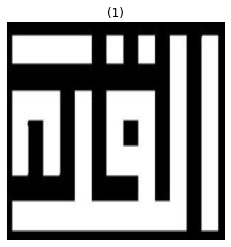

[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 4.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 4.0800000e+02  1.5707964e+00]]

 [[ 4.1100000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  1.5533431

In [169]:
show_images([X_test[0]])
print("hehhhhh",get_max_vote(X_test[0]))
print("saaaa7",y_test[0])

In [170]:
test_values=[get_max_vote(img) for img in X_test]
print(test_values)
print(y_test.astype("int"))
correct=test_values==y_test
print(y_test[test_values!=y_test])
#print(np.bincount(y_test[test_values!=y_test]).argmax())
print("accuracy=",np.sum(correct)/correct.shape[0])

[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 4.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 4.0800000e+02  1.5707964e+00]]

 [[ 4.1100000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  1.5533431

 [[-1.6500000e+02  3.1241393e+00]]]
0.1904086344543659
(1, 6)
[0.923804 0.005076 0.004148 0.       0.003648 0.050948 0.       0.005116
 0.00396  0.0033  ]
[4.]
[4.]
(1, 100)
[0.950852 0.003924 0.005244 0.       0.002448 0.025932 0.       0.003976
 0.005136 0.002488]
[4.]
[4]
[[[ 457.           0.       ]]

 [[ 176.           0.       ]]

 [[ 152.           0.       ]]

 ...

 [[ -39.           3.0717795]]

 [[-196.           3.106686 ]]

 [[ -99.           3.1241393]]]
0.019470125118421482
(1, 6)
[9.82892e-01 9.24000e-04 3.08800e-03 0.00000e+00 8.12000e-04 7.46000e-03
 0.00000e+00 8.96000e-04 3.07200e-03 8.56000e-04]
[1.]
[4.]
(1, 100)
[9.89076e-01 1.96000e-04 2.50000e-03 0.00000e+00 6.80000e-05 5.39600e-03
 0.00000e+00 1.92000e-04 2.50400e-03 6.80000e-05]
[1.]
[7]
[[[ 3.3700000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 2.0000000e+01  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 3.60

 [[-5.9000000e+01  2.3561945e+00]]]
0.006621880998080614
(1, 6)
[0.93954  0.003428 0.007412 0.       0.0014   0.035852 0.       0.003088
 0.007756 0.001524]
[4.]
[6.]
(1, 100)
[0.965096 0.003608 0.00412  0.       0.001656 0.016136 0.       0.00356
 0.0042   0.001624]
[4.]
[0]
[[[ 3.0100000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  5.2359879e-02]]

 ...

 [[-3.0000000e+02  3.1066861e+00]]

 [[-3.7300000e+02  3.1241393e+00]]

 [[-2.7800000e+02  3.1241393e+00]]]
0.046651254270038994
(1, 6)
[0.932728 0.0046   0.006132 0.       0.001308 0.043248 0.       0.004424
 0.006188 0.001372]
[4.]
[3.]
(1, 100)
[0.959004 0.004088 0.004288 0.       0.001452 0.021352 0.       0.00412
 0.004252 0.001444]
[4.]
[0]
[[[ 3.7800000e+02  1.5533431e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[-5.4000000e+01  3.0717795e+00]]

 [[ 3.8000000e+02  1.5358897e+00]]

 [[-9.2000000e+01  3.1066861e+00]]

 [[-2.9500000e+02  3.0717795e+00]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[-2.88

[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5533431e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  1.5882496e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 2.8200000e+02  1.5533431e+00]]

 [[ 2.6800000e+02  1.6057029e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.1600000e+02  1.4660766e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.8700000e+02  1.5358897e+00]]

 [[ 2.7000000e+02  1.6057029e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.0900000e+02  1.4835298

[9.82384e-01 4.00000e-04 4.38800e-03 0.00000e+00 3.20000e-04 7.40000e-03
 0.00000e+00 3.88000e-04 4.40400e-03 3.16000e-04]
[8.]
[8]
[[[ 4.9000000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  1.5707964e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 

0.02652222637280538
(1, 6)
[0.90974  0.003548 0.013308 0.       0.003352 0.049844 0.       0.003344
 0.013556 0.003308]
[4.]
[6.]
(1, 100)
[0.937772 0.005624 0.00848  0.       0.00544  0.02314  0.       0.005668
 0.008184 0.005692]
[4.]
[6]
[[[ -78.           3.0892327]]

 [[   5.           3.0717795]]

 [[ -72.           3.106686 ]]

 [[  12.           3.054326 ]]

 [[-262.           3.054326 ]]

 [[  -1.           3.0717795]]

 [[-267.           3.054326 ]]

 [[  -7.           3.0892327]]]
0.15898200404642743
(1, 6)
[9.78616e-01 1.70400e-03 3.22000e-03 0.00000e+00 4.84000e-04 1.05680e-02
 0.00000e+00 1.64800e-03 3.31600e-03 4.44000e-04]
[1.]
[5.]
(1, 100)
[9.87844e-01 1.85200e-03 1.43600e-03 0.00000e+00 5.20000e-04 4.54000e-03
 0.00000e+00 1.85600e-03 1.41200e-03 5.40000e-04]
[1.]
[3]
[[[ 3.9400000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 6.1000000e+01  0.0

 [[-3.3600000e+02  3.1241393e+00]]]
0.6696356275303643
(1, 6)
[9.19976e-01 4.60000e-04 1.56000e-02 0.00000e+00 4.36000e-04 4.70320e-02
 0.00000e+00 4.12000e-04 1.56960e-02 3.88000e-04]
[4.]
[8.]
(1, 100)
[0.966824 0.001872 0.0042   0.       0.001612 0.017808 0.       0.001856
 0.004216 0.001612]
[4.]
[8]
[[[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.7453292e-02]]

 [[-3.5000000e+02  3.1066861e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[ 2.5000

 0.0000e+00 7.3200e-04 2.3520e-03 6.4800e-04]
[1.]
[6]
[[[ 2.4600000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[-2.2200000e+02  3.1241393e+00]]

 [[-1.8900000e+02  3.1241393e+00]]

 [[-4.1000000e+02  3.1241393e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[-3.8400000e+02  3.1066861e+00]]

 [[-3.9300000e+02  3.1241393e+00]]

 [[-3.8700000e+02  3.1241393e+00]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[-2.1100000e+02  3.1066861e+00]]

 [[-1.5300000e+02  3.1066861e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[-2.3500000e+02  3.1066861e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[-2.3900000e+02  3.1241393e+00]]

 [[-1.3000000e+02  3.1241393e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[-4.3300000e+02  3.1066861e+00]]

 [[-2.6300000e+02  3.1066861e+00]]

 [[-2.4000000e+02  3.1066861e+00]]

 [[-4.4800000e+02  3.0543261e+00]]

 [[-2.750

(1, 6)
[9.72408e-01 1.24800e-03 3.62400e-03 0.00000e+00 3.36000e-04 1.71760e-02
 0.00000e+00 1.20800e-03 3.72000e-03 2.80000e-04]
[3.]
[2.]
(1, 100)
[9.84848e-01 1.94800e-03 1.46000e-03 0.00000e+00 5.40000e-04 7.25600e-03
 0.00000e+00 1.94800e-03 1.47600e-03 5.24000e-04]
[1.]
[3]
[[[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5882496e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]


[0.940872 0.004796 0.006376 0.       0.003236 0.030312 0.       0.004832
 0.006336 0.00324 ]
[4.]
[4]
[[[444.          1.5707964]]

 [[480.          1.5707964]]

 [[411.          1.5707964]]

 [[475.          0.       ]]

 [[ 21.          0.       ]]

 [[ 28.          1.5707964]]

 [[376.          1.5707964]]

 [[440.          0.       ]]

 [[341.          1.5707964]]

 [[406.          0.       ]]

 [[371.          0.       ]]

 [[167.          1.5707964]]

 [[196.          0.       ]]

 [[134.          1.5707964]]

 [[306.          1.5707964]]

 [[338.          0.       ]]

 [[272.          1.5707964]]

 [[ 56.          0.       ]]

 [[ 63.          1.5707964]]

 [[127.          0.       ]]

 [[231.          0.       ]]

 [[160.          0.       ]]

 [[302.          0.       ]]

 [[ 99.          1.5707964]]

 [[ 93.          0.       ]]

 [[267.          0.       ]]

 [[237.          1.5707964]]

 [[202.          1.5707964]]]
0.590302178496135
(1, 6)
[9.57784e-01 1.08000e-04 1.47200e

0.11013063840276066
(1, 6)
[0.912752 0.008488 0.00456  0.       0.003624 0.053904 0.       0.008284
 0.005088 0.0033  ]
[4.]
[4.]
(1, 100)
[0.938048 0.005396 0.007692 0.       0.002412 0.030952 0.       0.005364
 0.007724 0.002412]
[4.]
[4]
[[[ 3.4000000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[-3.5900000e+02  3.1241393e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[-2.1000000e+01  3.1066861e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[-3.5500000e+02  3.1066861e+00]]

 [[

[[[-2.6500000e+02  3.1066861e+00]]

 [[-2.6900000e+02  3.1066861e+00]]

 [[-4.5400000e+02  3.0892327e+00]]

 [[-3.1500000e+02  3.0892327e+00]]

 [[-3.1100000e+02  3.0717795e+00]]

 [[ 3.6300000e+02  7.8539819e-01]]

 [[-4.5700000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  3.4906585e-02]]

 [[-3.2400000e+02  3.1241393e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  3.4906585e-02]]

 [[-3.1900000e+02  3.0892327e+00]]

 [[-2.2600000e+02  3.0717795e+00]]

 [[-3.9000000e+01  3.0717795e+00]]

 [[-4.6200000e+02  3.1066861e+00]]

 [[-2.9400000e+02  3.0717795e+00]]

 [[ 3.5900000e+02  7.8539819e-01]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 3.5400000e+02  7.8539819e-01]]

 [[ 3.6100000e+02  7.8539819e-01]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[-3.1700000e+02  2.9845130e+00]]

 [[-2.6100000e+02  3.0892327e+00]]

 [[-4.8000000e+01  3.1066861e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[-2.7400000e+02  3.1241393

0.07980758718705587
(1, 6)
[0.94652  0.003548 0.003892 0.       0.001544 0.03548  0.       0.00338
 0.004116 0.00152 ]
[4.]
[2.]
(1, 100)
[0.966644 0.002788 0.003216 0.       0.00134  0.018668 0.       0.0028
 0.0032   0.001344]
[4.]
[0]
[[[ 1.2000000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1241393e+00]]

 [[ 1.2200000e+02  3.4906585e-02]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[-1.1500000e+02  3.1241393e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  1.7453292e-02]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  1.7453292e-02]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  1.7453292e-02]]

 [[ 1.2800000e+02  1.0471976e-01]]

 [[-4.3600000e+02  3.1241393e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 2.1000000e+02  3.4906585e-02]]

 [[-2.9400000e+02  3.1241393e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.

[0.959    0.003928 0.003836 0.       0.002124 0.021224 0.       0.003948
 0.00378  0.00216 ]
[4.]
[4]
[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  2.3561945e+00]]

 [[ 1.1000000e+01  2.3561945e+00]]

 [[ 1.6000000e+01  2.3561945e+00]]

 [[ 1.3000000e+01  2.3561945e+00]]

 [[ 4.2800000e+02  1.3089969e+00]]

 [[ 2.1000000e+01  2.3561945e+00]]

 [[ 2.7700000e+02  4.8869219e-01]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  1.4137167e+00]]

 [[ 3.9400000e+02  1.4311700e+00]]

 [[ 2.2100000e+02  7.8539819e-01]]

 [[ 4.1600000e+02  1.3439035e+00]]

 [[ 3.9200000e+02  1.5533431e+00]]

 [[ 3.6200000e+02  3.4906585e-02]]

 [[ 2.8600000e+02  7.8539819e-01]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 4.3100000e+02  1.2915436e+00]]

 [[ 4.0200000e+02  1.3962634e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 1.8400000e+02  3.4906585e-02]]

 [[ 4.0700000e+02  1.3788100e+00]]

 0.002488 0.001112]
[4.]
[0]
[[[ 221.           0.       ]]

 [[ 307.           0.       ]]

 [[ 225.           0.       ]]

 ...

 [[-257.           2.984513 ]]

 [[-392.           3.0717795]]

 [[-290.           3.1241393]]]
0.10891435569941388
(1, 6)
[9.46296e-01 1.39600e-03 3.52000e-03 0.00000e+00 1.01200e-03 4.18480e-02
 0.00000e+00 8.08000e-04 4.32800e-03 7.92000e-04]
[4.]
[6.]
(1, 100)
[0.96966  0.001412 0.00212  0.       0.00128  0.020716 0.       0.001428
 0.002128 0.001256]
[4.]
[6]
[[[ 2.7500000e+02  1.5707964e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  1.5882496e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 0.003136 0.00168 ]
[4.]
[7]
[[[ 1.7100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]


[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[-3.0700000e+02  3.1066861e+00]]

 [[-2.6400000e+02  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[-2.5900000e+02  3.1066861

[[[ 5.3000000e+01  0.0000000e+00]]

 [[ 2.3000000e+01  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[-4.0000000e+01  3.1241393e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  7.8539819e-01]]

 [[ 2.0000000e+01  0.0000000

[[[ 326.           1.5707964]]

 [[ 322.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 287.           1.5707964]]

 [[ 229.           0.       ]]

 [[ 386.           0.       ]]

 [[ 489.           0.       ]]

 [[ 455.           0.       ]]

 [[ 329.           1.553343 ]]

 [[ 318.           1.5882496]]

 [[ 299.           1.553343 ]]

 [[ 301.           1.5358897]]

 [[ 310.           1.6057029]]

 [[ 293.           1.553343 ]]

 [[ 284.           1.5882496]]

 [[ 288.           1.5882496]]

 [[ 280.           1.6057029]]

 [[ 290.           1.5882496]]

 [[ 316.           1.5882496]]

 [[-382.           3.1241393]]

 [[ 205.           0.       ]]

 [[ 483.           0.       ]]

 [[ 320.           1.5882496]]

 [[ 292.           1.6406095]]

 [[ 295.           1.553343 ]]

 [[ 297.           1.553343 ]]

 [[ 380.           0.       ]]

 [[ 275.           1.6057029]]

 [[ 270.           1.6231562]]

 [[ 324.           1.4835298]]

 [[ 298.           1.5358897]]

 [[ 264.

[0.937532 0.005492 0.006612 0.       0.003376 0.031508 0.       0.005436
 0.006708 0.003336]
[4.]
[4]
[[[ 51.          0.       ]]

 [[ 15.          0.       ]]

 [[ 85.          0.       ]]

 [[483.          1.5707964]]

 [[477.          0.       ]]

 [[ 19.          1.5707964]]

 [[121.          0.       ]]

 [[447.          1.5707964]]

 [[413.          1.5707964]]

 [[377.          1.5707964]]

 [[157.          0.       ]]

 [[335.          0.       ]]

 [[198.          1.5707964]]

 [[340.          1.5707964]]

 [[369.          0.       ]]

 [[193.          0.       ]]

 [[227.          0.       ]]

 [[234.          1.5707964]]

 [[441.          0.       ]]

 [[ 55.          1.5707964]]

 [[128.          1.5707964]]

 [[162.          1.5707964]]

 [[405.          0.       ]]

 [[306.          1.5707964]]

 [[263.          0.       ]]

 [[299.          0.       ]]

 [[270.          1.5707964]]

 [[ 91.          1.5707964]]]
0.6211579699785561
(1, 6)
[9.59272e-01 1.08000e-04 1.26640

0.03651839648544756
(1, 6)
[9.85432e-01 6.52000e-04 2.09200e-03 0.00000e+00 6.00000e-04 8.17600e-03
 0.00000e+00 5.52000e-04 1.93200e-03 5.64000e-04]
[1.]
[8.]
(1, 100)
[9.90576e-01 1.76000e-04 1.71600e-03 0.00000e+00 1.76000e-04 5.42000e-03
 0.00000e+00 1.60000e-04 1.60000e-03 1.76000e-04]
[1.]
[7]
[[[ 407.           0.       ]]

 [[ 421.           0.       ]]

 [[  81.           0.       ]]

 ...

 [[-112.           3.106686 ]]

 [[-320.           3.1241393]]

 [[-114.           3.1241393]]]
0.02945795202252667
(1, 6)
[0.933848 0.001612 0.0072   0.       0.001388 0.045656 0.       0.001644
 0.00748  0.001172]
[4.]
[7.]
(1, 100)
[0.966492 0.002448 0.002856 0.       0.001536 0.019828 0.       0.002488
 0.0028   0.001552]
[4.]
[7]
[[[ 335.           0.       ]]

 [[ 258.           0.       ]]

 [[ 331.           0.       ]]

 ...

 [[-415.           3.0892327]]

 [[ -22.           3.0892327]]

 [[-407.           3.1241393]]]
0.021060749881347887
(1, 6)
[9.79608e-01 4.44000e-04 3.26400e-

[[[ 416.           0.       ]]

 [[ 274.           1.5707964]]

 [[ 254.           1.5707964]]

 ...

 [[-369.           3.0194197]]

 [[-331.           3.106686 ]]

 [[-212.           3.1241393]]]
0.04020837919143004
(1, 6)
[9.6870e-01 9.6800e-04 4.7640e-03 0.0000e+00 3.5600e-04 1.9124e-02
 0.0000e+00 9.6000e-04 4.8120e-03 3.1600e-04]
[3.]
[3.]
(1, 100)
[9.85164e-01 1.69600e-03 1.51200e-03 0.00000e+00 3.36000e-04 7.74800e-03
 0.00000e+00 1.72800e-03 1.48000e-03 3.36000e-04]
[1.]
[3]
[[[ 40.          1.5707964]]

 [[461.          1.5707964]]

 [[ 29.          0.       ]]

 [[ 77.          1.5707964]]

 [[381.          0.       ]]

 [[410.          0.       ]]

 [[470.          0.       ]]

 [[ 59.          0.       ]]

 [[116.          1.5707964]]

 [[440.          0.       ]]

 [[353.          0.       ]]

 [[422.          1.5707964]]

 [[153.          1.5707964]]

 [[ 88.          0.       ]]

 [[176.          0.       ]]

 [[205.          0.       ]]

 [[265.          0.       ]]

 

0.047835415877824056
(1, 6)
[9.67692e-01 1.87600e-03 5.44400e-03 0.00000e+00 5.04000e-04 1.66600e-02
 0.00000e+00 1.66000e-03 5.67600e-03 4.88000e-04]
[1.]
[4.]
(1, 100)
[9.83328e-01 2.34000e-03 1.99200e-03 0.00000e+00 4.76000e-04 7.05600e-03
 0.00000e+00 2.34800e-03 1.99200e-03 4.68000e-04]
[1.]
[2]
[[[ 2.4000000e+01  0.0000000e+00]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  1.5882496e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.5358897e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5533431e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  1.5707964e+00]]

 [[ 2.3700000e

 0.005512 0.002428]
[4.]
[4]
[[[ 1.4000000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  5.2359879e-02]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2300000e+02  2.2689280e-01]]

 [[ 1.2400000e+02  2.4434610e-01]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  2.2689280e-01]]

 [[ 1.4600000e+02  1.7453292e-02]]

 [[ 8.0000000e+01  3.4906585e-02]]

 [[ 1.1800000e+02  2.0943952e-01]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  1.7453292e-02]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  1.7453292e-02]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 2.0800000e+02  1.7453292e-02]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[-3.7000000e+01  2.3561945e+00]]


 [[-8.3000000e+01  3.1241393e+00]]]
0.05342544617156016
(1, 6)
[9.66764e-01 1.30000e-03 3.51600e-03 0.00000e+00 5.76000e-04 2.24520e-02
 0.00000e+00 1.28400e-03 3.55600e-03 5.52000e-04]
[3.]
[3.]
(1, 100)
[9.8216e-01 1.5360e-03 1.6400e-03 0.0000e+00 4.9200e-04 1.0504e-02
 0.0000e+00 1.5600e-03 1.6080e-03 5.0000e-04]
[3.]
[2]
[[[-1.2100000e+02  3.0892327e+00]]

 [[ 1.9300000e+02  3.4906585e-02]]

 [[ 4.7200000e+02  8.7266460e-02]]

 ...

 [[-4.6800000e+02  3.1241393e+00]]

 [[-3.8000000e+02  3.1241393e+00]]

 [[-5.7000000e+01  3.1241393e+00]]]
0.023258300807357107
(1, 6)
[0.85488  0.005704 0.010044 0.       0.004548 0.102856 0.       0.006036
 0.011092 0.00484 ]
[4.]
[5.]
(1, 100)
[0.879692 0.006432 0.013372 0.       0.006136 0.068124 0.       0.006436
 0.013412 0.006396]
[4.]
[0]
[[[ 7.0000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.5707964e

(1, 6)
[9.69188e-01 4.36000e-04 4.08800e-03 0.00000e+00 4.52000e-04 2.06920e-02
 0.00000e+00 4.00000e-04 4.28800e-03 4.56000e-04]
[3.]
[5.]
(1, 100)
[9.86096e-01 8.52000e-04 1.09200e-03 0.00000e+00 7.72000e-04 8.47200e-03
 0.00000e+00 8.68000e-04 1.07600e-03 7.72000e-04]
[3.]
[5]
[[[ 125.           0.       ]]

 [[ 382.           0.       ]]

 [[ 122.           0.       ]]

 ...

 [[ -36.           3.0892327]]

 [[-394.           3.106686 ]]

 [[-287.           3.106686 ]]]
0.0610618242306626
(1, 6)
[0.92958  0.001448 0.010004 0.       0.001284 0.0449   0.       0.001376
 0.010148 0.00126 ]
[4.]
[7.]
(1, 100)
[0.964956 0.00256  0.003452 0.       0.00166  0.0197   0.       0.002528
 0.003428 0.001716]
[4.]
[7]
[[[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e

[0.94058  0.005792 0.007032 0.       0.003944 0.025884 0.       0.00586
 0.006952 0.003956]
[4.]
[4]
[[[ 3.6400000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[-3.5400000e+02  3.1066861e+00]]

 [[-3.5100000e+02  3.1066861e+00]]

 [[-4.1600000e+02  3.1066861e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.7453292e-02]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[-4.1000000e+02  3.1066861e+00]]

 [[-3.6100000e+02  3.1241393e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  3.8397244e-01]]

 [[ 4.7800000e+02  3.4906584e-01]]]
0.11519022883616453
(1, 6)
[9.69288e-01 2.32000e-03 3.48000e-03 0.00000e+00 5.20000e-04 1.80720e-02
 0.00000e+00 2.19600e-03 3.63200e-03 4.9200

 0.0000e+00 1.7320e-03 1.5480e-03 4.4000e-04]
[3.]
[2]
[[[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5882496e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 4.6300000e+02  1.7453292e-02]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.6057029e+00]]

 [[ 3.4100000e+02  1.5184364e+00]]

 [[ 3.8800000e+02  2.4434610e-01]]

 [[ 3.2600000e+02  1.5533431e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[-4.5000000e+02  3.1241393e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 4.5400000e+02  2.4434610e-01]]

 [[ 2.9700000e+02  1.5184364e+00]]

 [[ 3.3600000e+02  1.5358897e+00]]

 [[ 3.2900000e+02  1.5882496e+00]]

 [[ 3.1700000e+02  1.6057029e+00]]]
0.07905858954172537
(1, 6)
[9.71852e-01 1.19600e-03 2.84400e-03 0.00000e+00 9.20000e-04 1.82280e-02
 0.00000e+00 7.08

0.08161141667905455
(1, 6)
[9.73872e-01 8.12000e-04 4.81600e-03 0.00000e+00 6.36000e-04 1.36000e-02
 0.00000e+00 7.32000e-04 4.94400e-03 5.88000e-04]
[1.]
[1.]
(1, 100)
[9.87376e-01 1.27200e-03 1.50000e-03 0.00000e+00 7.88000e-04 5.50400e-03
 0.00000e+00 1.27200e-03 1.49200e-03 7.96000e-04]
[1.]
[1]
[[[ 460.           0.       ]]

 [[ 462.           0.       ]]

 [[-158.           3.1241393]]

 ...

 [[ -96.           3.0892327]]

 [[-336.           3.1241393]]

 [[-276.           3.1241393]]]
0.05807176086840276
(1, 6)
[0.923564 0.0038   0.00324  0.       0.001456 0.059508 0.       0.003576
 0.003408 0.001448]
[4.]
[0.]
(1, 100)
[0.950956 0.002796 0.0035   0.       0.001236 0.033972 0.       0.002844
 0.003476 0.00122 ]
[4.]
[0]
[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 2.24

 [[-3.1500000e+02  3.0543261e+00]]]
0.13325053229240597
(1, 6)
[9.69092e-01 1.19600e-03 5.26000e-03 0.00000e+00 7.52000e-04 1.64920e-02
 0.00000e+00 1.10000e-03 5.41200e-03 6.96000e-04]
[1.]
[1.]
(1, 100)
[9.84024e-01 1.87600e-03 1.85600e-03 0.00000e+00 9.32000e-04 6.64800e-03
 0.00000e+00 1.93600e-03 1.80000e-03 9.28000e-04]
[1.]
[1]
[[[ 3.5400000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  1.5707964e-01]]

 [[ 4.5700000e+02  1.9198622e-01]]

 [[ 4.5100000e+

 0.0000e+00 1.5200e-03 1.4920e-03 3.7200e-04]
[1.]
[0]
[[[ 322.           0.       ]]

 [[ 402.           0.       ]]

 [[ 339.           0.       ]]

 ...

 [[-454.           3.0368729]]

 [[-101.           3.0368729]]

 [[-286.           3.106686 ]]]
0.04423191870890616
(1, 6)
[0.952856 0.0012   0.008964 0.       0.001012 0.024792 0.       0.001268
 0.008884 0.001024]
[8.]
[2.]
(1, 100)
[0.97716  0.00194  0.0031   0.       0.001092 0.010576 0.       0.00196
 0.003076 0.001096]
[3.]
[7]
[[[ 302.           1.5707964]]

 [[ 472.           0.       ]]

 [[ 297.           1.5707964]]

 [[ 477.           0.       ]]

 [[ 368.           0.       ]]

 [[ 303.           1.553343 ]]

 [[-458.           3.0892327]]

 [[ 316.           1.5707964]]

 [[  19.           0.       ]]

 [[  86.           0.       ]]

 [[ 283.           1.5707964]]

 [[ 296.           1.5882496]]

 [[ 314.           1.5358897]]

 [[ 450.           0.7853982]]

 [[ 291.           1.5882496]]

 [[ 286.           1.605702

[9.7732e-01 2.0880e-03 3.3640e-03 0.0000e+00 6.3600e-04 1.0504e-02
 0.0000e+00 2.1000e-03 3.3960e-03 5.9200e-04]
[1.]
[8.]
(1, 100)
[9.85236e-01 1.92000e-03 2.14400e-03 0.00000e+00 6.80000e-04 5.27600e-03
 0.00000e+00 1.95200e-03 2.09600e-03 6.96000e-04]
[1.]
[7]
[[[ 339.           0.       ]]

 [[ 341.           0.       ]]

 [[  79.           0.       ]]

 ...

 [[-350.           3.0717795]]

 [[-403.           3.1241393]]

 [[ -89.           3.1241393]]]
0.07452964081662361
(1, 6)
[0.923296 0.003432 0.007924 0.       0.00198  0.050008 0.       0.00332
 0.0081   0.00194 ]
[4.]
[6.]
(1, 100)
[0.954816 0.004152 0.004048 0.       0.001692 0.025392 0.       0.004184
 0.004024 0.001692]
[4.]
[7]
[[[ 2.7500000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 7.4000

 0.00000e+00 2.46400e-03 2.93600e-03 7.92000e-04]
[1.]
[0]
[[[332.          1.5707964]]

 [[354.          1.5707964]]

 [[358.          1.5707964]]

 [[329.          1.5707964]]

 [[294.          1.5707964]]

 [[363.          1.553343 ]]

 [[337.          1.553343 ]]

 [[364.          1.5358897]]

 [[182.          0.       ]]

 [[268.          1.5707964]]

 [[324.          1.5882496]]

 [[190.          0.       ]]

 [[359.          1.553343 ]]

 [[334.          1.553343 ]]

 [[339.          1.5358897]]

 [[342.          1.5358897]]

 [[291.          1.5707964]]

 [[341.          1.5184364]]

 [[327.          1.5882496]]

 [[368.          1.5358897]]

 [[203.          0.       ]]

 [[366.          1.43117  ]]

 [[200.          0.       ]]

 [[365.          1.4486233]]

 [[349.          1.5882496]]

 [[344.          1.5184364]]

 [[353.          1.5882496]]

 [[361.          1.5358897]]

 [[364.          1.4835298]]

 [[299.          1.553343 ]]

 [[339.          1.6057029]]

 [[366.    

 [[-4.1400000e+02  3.1066861e+00]]]
0.023191162484453874
(1, 6)
[0.95354  0.002328 0.0047   0.       0.001268 0.029868 0.       0.002304
 0.00486  0.001132]
[0.]
[0.]
(1, 100)
[0.972608 0.002352 0.002808 0.       0.001068 0.014936 0.       0.002372
 0.0028   0.001056]
[4.]
[2]
[[[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  1.5533431e+00]]

 [[ 2.6500000e+02  1.5882496e+00]]

 [[-1.7400000e+02  3.0892327e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.6000000e+02  1.6057029e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[-1.7100000e+02  3.0892327e+00]]

 [[ 1.8500000e+02  3.8397244e-01]]

 [[ 1.9000000e+02  4.0142572e-01]]

 [[ 2.7700000e+02  1.5533431e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5009831e+00]]

 [[ 2.3800000e+02  1.6755161e+00]]

 [[ 2.2100000e+02  1.6929693e+00]]

 [[ 2.7700000e+02  1.4835298e+00]]

 [[ 2.7500000e+02  1.5009831e+00]]

 [

 0.004024 0.00182 ]
[4.]
[7]
[[[-3.4400000e+02  3.0892327e+00]]

 [[-3.7100000e+02  3.0892327e+00]]

 [[-2.7400000e+02  3.0892327e+00]]

 [[-4.3400000e+02  3.1066861e+00]]

 [[-4.3100000e+02  3.0892327e+00]]

 [[-2.8300000e+02  3.1066861e+00]]

 [[-1.7500000e+02  3.0892327e+00]]

 [[-1.4900000e+02  3.0892327e+00]]

 [[-1.5800000e+02  3.1066861e+00]]

 [[-4.0600000e+02  3.1066861e+00]]

 [[-2.7700000e+02  3.1066861e+00]]

 [[-1.7900000e+02  3.1066861e+00]]

 [[-4.4000000e+02  3.1066861e+00]]

 [[-4.3700000e+02  3.0892327e+00]]

 [[-4.0200000e+02  3.0892327e+00]]

 [[-1.5200000e+02  3.1066861e+00]]

 [[-3.6700000e+02  3.0717795e+00]]

 [[-3.5100000e+02  3.0892327e+00]]

 [[-2.8000000e+02  3.0892327e+00]]

 [[ 2.8600000e+02  7.8539819e-01]]

 [[ 4.0600000e+02  5.2359879e-02]]

 [[ 2.0800000e+02  5.2359879e-02]]

 [[ 1.0900000e+02  6.9813170e-02]]

 [[-1.6800000e+02  3.1066861e+00]]

 [[-4.0000000e+02  3.1066861e+00]]

 [[ 3.3400000e+02  7.8539819e-01]]

 [[-3.7600000e+02  3.0892327e+00]]


[9.80864e-01 2.13200e-03 2.32800e-03 0.00000e+00 6.40000e-04 8.93600e-03
 0.00000e+00 2.13200e-03 2.31200e-03 6.56000e-04]
[3.]
[2]
[[[  81.           0.       ]]

 [[ 441.           0.       ]]

 [[ 433.           0.       ]]

 [[-380.           3.106686 ]]

 [[ 463.           0.       ]]

 [[-214.           3.106686 ]]

 [[ 276.           0.       ]]

 [[-448.           3.106686 ]]

 [[-297.           3.0717795]]

 [[  -5.           3.106686 ]]

 [[   4.           3.106686 ]]

 [[ 326.           0.       ]]

 [[ 296.           0.       ]]

 [[ 324.           0.       ]]

 [[-290.           3.0368729]]

 [[-234.           3.0892327]]

 [[ 282.           0.       ]]

 [[-371.           3.106686 ]]

 [[-272.           3.1241393]]

 [[-242.           3.1241393]]

 [[-295.           3.054326 ]]

 [[-243.           3.0892327]]

 [[   3.           0.       ]]

 [[ 160.           0.       ]]

 [[-282.           3.0368729]]

 [[-247.           3.106686 ]]

 [[-227.           3.1241393]]

 [[-

0.17572564713033786
(1, 6)
[0.908588 0.006116 0.003888 0.       0.003108 0.065268 0.       0.00588
 0.004176 0.002976]
[4.]
[4.]
(1, 100)
[0.942124 0.00446  0.0055   0.       0.00244  0.033084 0.       0.004484
 0.0055   0.002408]
[4.]
[4]
[[[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  1.5707964e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 3.9000000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  1.5707964e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 4.5100000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  1.5707964e+00]]

 [[ 5.0000000e+01  1.5707964e+00]]

 [[ 

 [[-1.5000000e+01  3.1241393e+00]]]
0.06434709704464472
(1, 6)
[0.95032  0.002244 0.00406  0.       0.001312 0.034448 0.       0.002196
 0.004228 0.001192]
[4.]
[3.]
(1, 100)
[0.970424 0.002312 0.002788 0.       0.001576 0.016224 0.       0.002336
 0.002768 0.001572]
[4.]
[0]
[[[  45.           0.       ]]

 [[ 356.           0.       ]]

 [[ 266.           0.       ]]

 ...

 [[-163.           3.106686 ]]

 [[-103.           3.1241393]]

 [[  -4.           3.1241393]]]
0.036709310589907604
(1, 6)
[0.911392 0.003384 0.009588 0.       0.00302  0.055912 0.       0.003356
 0.01002  0.003328]
[4.]
[8.]
(1, 100)
[0.94468  0.00386  0.0064   0.       0.003148 0.028476 0.       0.003848
 0.006412 0.003176]
[4.]
[7]
[[[  43.           0.       ]]

 [[ 201.           0.       ]]

 [[ 204.           0.       ]]

 ...

 [[   3.           3.106686 ]]

 [[-268.           3.1241393]]

 [[   0.           3.1241393]]]
0.06852334937722747
(1, 6)
[0.94084  0.002616 0.004184 0.       0.001392 0.042848 0. 

0.02462764841619467
(1, 6)
[9.51524e-01 3.34800e-03 5.53200e-03 0.00000e+00 9.60000e-04 2.88280e-02
 0.00000e+00 3.20000e-03 5.67600e-03 9.32000e-04]
[0.]
[3.]
(1, 100)
[0.97202  0.003464 0.003044 0.       0.001008 0.012952 0.       0.003476
 0.003016 0.00102 ]
[4.]
[2]
[[[ 134.           0.       ]]

 [[  33.           0.       ]]

 [[  30.           0.       ]]

 ...

 [[ -57.           3.106686 ]]

 [[-161.           3.1241393]]

 [[-115.           3.1241393]]]
0.03144339563668188
(1, 6)
[9.49636e-01 1.20400e-03 6.54400e-03 0.00000e+00 7.72000e-04 3.30760e-02
 0.00000e+00 1.21600e-03 6.79200e-03 7.60000e-04]
[4.]
[7.]
(1, 100)
[0.973924 0.002184 0.002504 0.       0.001236 0.01422  0.       0.002192
 0.00244  0.0013  ]
[4.]
[7]
[[[ 4.8300000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 4.7700000e+02  1.5707964e+00]]

 [[ 1.8000000e+01  1.5707964e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.35

0.02473285074112375
(1, 6)
[0.903156 0.0044   0.0125   0.       0.004092 0.05486  0.       0.004116
 0.012908 0.003968]
[4.]
[6.]
(1, 100)
[0.926896 0.007176 0.008216 0.       0.00702  0.02828  0.       0.0072
 0.008352 0.00686 ]
[4.]
[6]
[[[ 119.           0.       ]]

 [[-117.           3.1241393]]

 [[ 122.           0.       ]]

 ...

 [[-466.           3.1241393]]

 [[-134.           3.1241393]]

 [[ -76.           3.1241393]]]
0.05668618158163739
(1, 6)
[0.942364 0.002632 0.00314  0.       0.001348 0.043588 0.       0.002492
 0.003196 0.00124 ]
[4.]
[3.]
(1, 100)
[0.965264 0.002156 0.002768 0.       0.001052 0.022796 0.       0.00218
 0.002724 0.00106 ]
[4.]
[0]
[[[ 4.9500000e+02  0.0000000e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.7900000e+02  1.5707964e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]


[0.959836 0.002108 0.003584 0.       0.001932 0.024916 0.       0.002092
 0.0036   0.001932]
[4.]
[8]
[[[ 4.5700000e+02  1.5707964e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  1.5707964e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 2.3000000e+01  1.5707964e+00]]

 [[ 5.1000000e+01  1.5707964e+00]]

 [[ 4.0500000e+02  1.5707964e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  1.5707964e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

[[[ 4.0600000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[-4.0000000e+02  3.1241393e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[-3.1000000e+01  3.1241393e+00]]

 [[-4.2900000e+02  3.1241393e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  1.7453292e-02]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[-1.4200000e+02  3.1241393e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 3.7000000e+01  1.7453292e-02]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[ 3.4000000e+02  1.5707964

 [[ 2.3800000e+02  1.5882496e+00]]]
0.04170616113744076
(1, 6)
[9.6960e-01 1.0520e-03 5.0880e-03 0.0000e+00 8.9200e-04 1.6336e-02
 0.0000e+00 9.2400e-04 5.2080e-03 9.0000e-04]
[1.]
[5.]
(1, 100)
[0.985672 0.001124 0.001704 0.       0.001028 0.006616 0.       0.00112
 0.00172  0.001016]
[1.]
[5]
[[[ 284.           0.       ]]

 [[ 354.           0.       ]]

 [[ 107.           0.       ]]

 ...

 [[-113.           3.0892327]]

 [[ -46.           3.0892327]]

 [[  -3.           3.106686 ]]]
0.05599567879006122
(1, 6)
[0.926528 0.002252 0.003896 0.       0.001636 0.057896 0.       0.002356
 0.003944 0.001492]
[4.]
[3.]
(1, 100)
[0.956488 0.002052 0.002912 0.       0.001472 0.030644 0.       0.002056
 0.002876 0.0015  ]
[4.]
[0]
[[[ 2.7100000e+02  5.2359879e-02]]

 [[ 2.6800000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  1.7453292e-02]]

 [[ 1.8800000e+02  1.7453292e-02]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  1.7453292e-02]]

 [[ 2.2800000e+02  3.4906585e-02]]

 [[ 2.6300000

 [[ 3.4200000e+02  1.5358897e+00]]]
0.060055542698449434
(1, 6)
[9.67556e-01 1.64400e-03 4.54400e-03 0.00000e+00 6.92000e-04 1.86600e-02
 0.00000e+00 1.66000e-03 4.57600e-03 6.68000e-04]
[3.]
[7.]
(1, 100)
[9.81904e-01 1.96800e-03 2.05600e-03 0.00000e+00 5.64000e-04 8.90400e-03
 0.00000e+00 1.96800e-03 2.05600e-03 5.80000e-04]
[3.]
[2]
[[[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  1.7453292e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  5.2359879e-02]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  3.4906585e-02]]

 [[ 4.2500000e+02  3.4906585e-02]]

 [[ 2.5000000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[ 1.3400000e+02  3.3161256e-01]]

 [[ 4.4200000e+02  1.0471976e-01]]

 [[ 2.5700000e+02  4.5378560e-01]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  2.2689280e-01]]

 [[ 1.2900000e+02  3.3161256e-01]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 4.3300000e+02  6.9813170e-02]]

 [[ 3.9000000e

[[[ 22.          1.5707964]]

 [[338.          0.       ]]

 [[476.          0.       ]]

 [[ 27.          0.       ]]

 [[234.          0.       ]]

 [[470.          1.5707964]]

 [[ 64.          1.5707964]]

 [[227.          1.5707964]]

 [[390.          1.5707964]]

 [[129.          0.       ]]

 [[267.          1.5707964]]

 [[305.          0.       ]]

 [[185.          1.5707964]]

 [[372.          0.       ]]

 [[268.          0.       ]]

 [[430.          1.5707964]]

 [[145.          1.5707964]]

 [[348.          1.5707964]]

 [[442.          0.       ]]

 [[ 61.          0.       ]]

 [[104.          1.5707964]]

 [[ 95.          0.       ]]]
0.6806661839246922
(1, 6)
[9.6536e-01 1.0800e-04 1.1184e-02 0.0000e+00 1.1600e-04 1.1824e-02
 0.0000e+00 1.0800e-04 1.1192e-02 1.0800e-04]
[8.]
[8.]
(1, 100)
[9.84876e-01 3.88000e-04 4.47600e-03 0.00000e+00 3.56000e-04 4.68400e-03
 0.00000e+00 3.88000e-04 4.46800e-03 3.64000e-04]
[8.]
[8]
[[[ 2.8200000e+02  0.0000000e+00]]

 [[-2.7900000e

0.14109455167358906
(1, 6)
[9.72748e-01 1.40800e-03 3.73200e-03 0.00000e+00 3.24000e-04 1.62920e-02
 0.00000e+00 1.30400e-03 3.80400e-03 3.88000e-04]
[1.]
[6.]
(1, 100)
[9.85228e-01 1.84400e-03 1.70800e-03 0.00000e+00 3.80000e-04 6.90800e-03
 0.00000e+00 1.84400e-03 1.70800e-03 3.80000e-04]
[1.]
[3]
[[[ 3.3700000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5358897e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5882496e+00]]

 [[ 3.2900000e+02  1.5882496e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[-1.5000000e+

 [[-4.0000000e+01  3.1241393e+00]]]
0.5728449145459261
(1, 6)
[0.910576 0.003136 0.014616 0.       0.00284  0.048584 0.       0.003064
 0.014444 0.00274 ]
[4.]
[3.]
(1, 100)
[0.951496 0.00462  0.005592 0.       0.003684 0.020724 0.       0.004632
 0.005556 0.003696]
[4.]
[4]
[[[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  1.7453292e-01]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 

[0.941688 0.004268 0.006008 0.       0.003652 0.030456 0.       0.004296
 0.005904 0.003728]
[4.]
[4]
[[[ 4.1400000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[-4.0200000e+02  3.1066861e+00]]

 [[-4.0400000e+02  3.0892327e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[-3.9800000e+02  3.0892327e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[-9.8000000e+01  3.0892327e+00]]

 [[-4.0700000e+02  3.1066861e+00]]

 [[-3.5300000e+02  3.1066861e+00]]

 [[-3.4900000e+02  3.0892327e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[-3.4300000e+02  3.0892327e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[-1.0800000e+02  3.1066861e+00]]

 [[-1.1300000e+02  3.1241393e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  1.5707964e-01]]

 [[ 1.3900000e+02  3.3161256e-01]]

 [[-1.6000000e+01  2.3561945e+00]]

 [[-6.4000000e+01  3.0543261e+00]]]
0.036511156186612576
(1, 6)
[9.72348e-01 7.48000e-04 4.77200e-03 0.00000e+00 4.80000e-04 1.56520e-02
 0.00000e+00 4.60000e-04 5.22800e-03 3.12000e-04]
[1.]
[6.]
(1, 100)
[0.984084 0.001144 0.00216  0.       0.001056 0.007196 0.       0.001116
 0.002192 0.001052]
[1.]
[6]
[[[ 429.           0.       ]]

 [[ 417.           0.       ]]

 [[ 419.           0.       ]]

 ...

 [[ -30.           3.106686 ]]

 [[-132.           3.1241393]]

 [[ -53.           3.1241393]]]
0.030855060913127633
(1, 6)
[0.930028 0.00364  0.007376 0.       0.00228  0.04338  0.       0.00354
 0.007604 0.002152]
[4.]
[6.]
(1, 100)
[0.956972 0.003876 0.004396 0.       0.001792 0.0229   0.       0.00386
 0.004372 0.001832]
[4.]
[7]
[[[ 195.           0.       ]]

 [[ 320.           1.5707964]]

 [[ 123.           0.       ]]

 [[  84.           0.       ]]

 [[ 422.           0.       ]]

 [[ 200.           0.       ]]

 [[ 315.           1.5707964]]

 [[ 299.           1.5707964]]

(1, 6)
[9.70204e-01 1.05600e-03 4.57600e-03 0.00000e+00 3.20000e-04 1.78760e-02
 0.00000e+00 9.00000e-04 4.76000e-03 3.08000e-04]
[1.]
[3.]
(1, 100)
[9.86056e-01 1.74800e-03 1.41600e-03 0.00000e+00 3.16000e-04 6.97600e-03
 0.00000e+00 1.76400e-03 1.41600e-03 3.08000e-04]
[1.]
[3]
[[[  94.           0.       ]]

 [[  90.           0.       ]]

 [[ 324.           0.       ]]

 ...

 [[ -63.           3.0892327]]

 [[-296.           3.106686 ]]

 [[-103.           3.1241393]]]
0.03728070175438596
(1, 6)
[9.69152e-01 8.88000e-04 5.00800e-03 0.00000e+00 3.12000e-04 1.86320e-02
 0.00000e+00 9.28000e-04 4.92000e-03 1.60000e-04]
[3.]
[3.]
(1, 100)
[9.83604e-01 2.22800e-03 1.70000e-03 0.00000e+00 6.12000e-04 7.31600e-03
 0.00000e+00 2.24400e-03 1.69200e-03 6.04000e-04]
[1.]
[3]
[[[-3.6300000e+02  3.1241393e+00]]

 [[-3.6900000e+02  3.1241393e+00]]

 [[-2.5200000e+02  3.1241393e+00]]

 [[-3.8400000e+02  3.1241393e+00]]

 [[-4.8300000e+02  3.1241393e+00]]

 [[-1.6400000e+02  3.1241393e+00]]

 [[-

 [[-4.4700000e+02  3.1241393e+00]]]
0.059000160451096795
(1, 6)
[0.893628 0.008556 0.005044 0.       0.00668  0.065812 0.       0.00806
 0.005824 0.006396]
[4.]
[4.]
(1, 100)
[0.930224 0.005944 0.007948 0.       0.0045   0.032992 0.       0.005988
 0.007996 0.004408]
[4.]
[4]
[[[ 106.           0.       ]]

 [[ 279.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-260.           3.1241393]]

 [[-205.           3.1241393]]

 [[-203.           3.1241393]]]
0.02244869468099958
(1, 6)
[0.949312 0.002544 0.008428 0.       0.002204 0.024336 0.       0.002612
 0.008408 0.002156]
[8.]
[5.]
(1, 100)
[9.66452e-01 9.04000e-04 6.79600e-03 0.00000e+00 3.64000e-04 1.74200e-02
 0.00000e+00 9.24000e-04 6.78400e-03 3.56000e-04]
[4.]
[7]
[[[ 330.           0.       ]]

 [[ 125.           0.       ]]

 [[ 307.           0.       ]]

 ...

 [[-168.           3.1241393]]

 [[-142.           3.1241393]]

 [[-110.           3.1241393]]]
0.02022438736344848
(1, 6)
[0.937208 0.001912 0.008388 0

 [[-4.1700000e+02  3.0892327e+00]]]
0.36504519281699044
(1, 6)
[0.890596 0.007628 0.013748 0.       0.005344 0.055964 0.       0.007712
 0.0137   0.005308]
[4.]
[3.]
(1, 100)
[0.932292 0.007576 0.008164 0.       0.004612 0.027004 0.       0.0076
 0.008076 0.004676]
[4.]
[4]
[[[ 490.           0.       ]]

 [[ 492.           0.       ]]

 [[  99.           0.       ]]

 ...

 [[-130.           3.0892327]]

 [[-483.           3.106686 ]]

 [[ -98.           3.106686 ]]]
0.057337742868954114
(1, 6)
[0.931324 0.002648 0.008156 0.       0.001604 0.043876 0.       0.002564
 0.008364 0.001464]
[4.]
[2.]
(1, 100)
[0.960408 0.0038   0.003636 0.       0.001568 0.0216   0.       0.00384
 0.003564 0.001584]
[4.]
[7]
[[[ 295.           1.5707964]]

 [[ 291.           1.5707964]]

 [[ 304.           1.4660766]]

 ...

 [[ 153.           1.8325957]]

 [[  54.           2.3561945]]

 [[-228.           3.054326 ]]]
0.05539088551315302
(1, 6)
[0.95906  0.002824 0.0045   0.       0.001188 0.023956 0.    

[[[ 3.9000000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[ 4.2000000e+02  1.7453292e-02]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  1.7453292e-02]]

 [[ 3.0300000e+02  7.8539819e-01]]

 [[ 3.0400000e+02  1.6231562e+00]]

 [[-2.7900000e+02  3.1241393e+00]]

 [[ 3.6600000e+02  1.3788100e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.6929693e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.6929693e+00]]

 [[ 3.6100000e+02  1.3613569e+00]]

 [[ 3.1500000e+02  1.5882496

[9.84204e-01 1.85200e-03 1.64400e-03 0.00000e+00 7.36000e-04 7.33200e-03
 0.00000e+00 1.87200e-03 1.64400e-03 7.16000e-04]
[1.]
[3]
[[[ 184.           0.       ]]

 [[-190.           3.106686 ]]

 [[ 191.           0.       ]]

 [[ 198.           0.       ]]

 [[-172.           3.0892327]]

 [[-177.           3.106686 ]]

 [[ 455.           0.       ]]

 [[-187.           3.0892327]]

 [[-451.           3.0717795]]

 [[ -62.           3.0717795]]

 [[-194.           3.1241393]]

 [[  72.           0.       ]]

 [[-180.           3.0717795]]

 [[-181.           3.1241393]]

 [[-440.           3.0892327]]

 [[-185.           3.0892327]]]
0.06575310916628282
(1, 6)
[9.80096e-01 1.10400e-03 2.90000e-03 0.00000e+00 3.72000e-04 1.11520e-02
 0.00000e+00 9.80000e-04 3.03600e-03 3.60000e-04]
[1.]
[2.]
(1, 100)
[9.88508e-01 1.36800e-03 1.37600e-03 0.00000e+00 4.80000e-04 5.04400e-03
 0.00000e+00 1.37600e-03 1.36000e-03 4.88000e-04]
[1.]
[3]
[[[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.4000000e+02  

0.41546837917073853
(1, 6)
[9.44712e-01 1.00400e-03 8.27200e-03 0.00000e+00 9.00000e-04 3.49360e-02
 0.00000e+00 7.56000e-04 8.62400e-03 7.96000e-04]
[4.]
[8.]
(1, 100)
[0.968708 0.001912 0.003292 0.       0.001508 0.017868 0.       0.001936
 0.003252 0.001524]
[4.]
[8]
[[[2.5000000e+02 0.0000000e+00]]

 [[1.9500000e+02 3.4906584e-01]]

 [[2.0200000e+02 4.7123888e-01]]

 [[3.5000000e+02 1.5707964e+00]]

 [[1.9700000e+02 3.6651915e-01]]

 [[1.2200000e+02 0.0000000e+00]]

 [[1.9300000e+02 4.5378560e-01]]

 [[1.2700000e+02 0.0000000e+00]]

 [[1.8800000e+02 3.3161256e-01]]

 [[2.0000000e+02 3.6651915e-01]]

 [[1.9300000e+02 3.1415927e-01]]

 [[4.5600000e+02 4.3633232e-01]]

 [[4.2500000e+02 0.0000000e+00]]

 [[1.9500000e+02 4.3633232e-01]]

 [[3.4600000e+02 1.5707964e+00]]

 [[2.8200000e+02 1.5707964e-01]]

 [[1.9100000e+02 3.4906584e-01]]

 [[1.9500000e+02 3.8397244e-01]]

 [[1.9500000e+02 4.7123888e-01]]

 [[4.1900000e+02 0.0000000e+00]]

 [[2.0100000e+02 4.1887903e-01]]

 [[3.7500000e+0

(1, 6)
[9.6120e-01 1.0080e-03 3.9200e-03 0.0000e+00 6.0800e-04 2.7728e-02
 0.0000e+00 4.6400e-04 4.6080e-03 4.6400e-04]
[0.]
[6.]
(1, 100)
[9.79148e-01 1.10800e-03 2.03600e-03 0.00000e+00 9.32000e-04 1.27000e-02
 0.00000e+00 1.06400e-03 2.10800e-03 9.04000e-04]
[3.]
[6]
[[[ 345.           1.5707964]]

 [[  12.           0.       ]]

 [[-324.           3.1241393]]

 ...

 [[-129.           3.054326 ]]

 [[-436.           3.0717795]]

 [[ -21.           3.106686 ]]]
0.030621408045977013
(1, 6)
[0.944088 0.002312 0.009556 0.       0.001588 0.029    0.       0.00216
 0.009556 0.00174 ]
[8.]
[2.]
(1, 100)
[0.969276 0.00332  0.003704 0.       0.001752 0.013172 0.       0.003312
 0.003648 0.001816]
[4.]
[7]
[[[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[-4.2900000e+02  3.1066861e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [

[[[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  1.2217305e-01]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[-1.0800000e+02  3.1241393e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  1.7453292e-02]]

 [[-1.7000000e+02  3.1241393e+00]]

 [[ 2.6300000e+02  2.0943952e-01]]

 [[ 2.0600000e+02  1.7453292e-02]]

 [[ 1.8600000e+02  1.5707964e-01]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 1.8000000e+02  1.2217305e-01]]

 [[ 2.4800000e+02  1.5707964e-01]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  3.4906585e-02]]

 [[ 2.5300000e+02  1.7453292e-01]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  1.0471976e-01]]

 [[ 1.8900000e+02  1.7453292e-01]]

 [[ 3.7200000e+02  1.7453292e-02]]

 [[ 2.5900000e+02  1.9198622e-01]]

 [[ 1.9600000e+02  1.9198622e-01]]

 [[ 2.6900000e+02  2.2689280

[4.]
[2]
[[[ 179.           0.       ]]

 [[ -80.           3.106686 ]]

 [[ 143.           0.       ]]

 ...

 [[-109.           3.0717795]]

 [[-181.           3.0892327]]

 [[-244.           3.106686 ]]]
0.48430946859426655
(1, 6)
[0.89582  0.0037   0.011188 0.       0.003584 0.067236 0.       0.003632
 0.011332 0.003508]
[4.]
[4.]
(1, 100)
[0.940196 0.00424  0.006212 0.       0.003624 0.031652 0.       0.004284
 0.006148 0.003644]
[4.]
[4]
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5533431e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  1.5358897e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  1.5358897e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.850000

[0.979568 0.001412 0.00254  0.       0.00128  0.009968 0.       0.001368
 0.002612 0.001252]
[3.]
[5]
[[[344.          1.5707964]]

 [[340.          1.5707964]]

 [[313.          1.5707964]]

 [[319.          1.5707964]]

 [[336.          1.5882496]]

 [[272.          1.5707964]]

 [[268.          1.5707964]]

 [[309.          1.5707964]]

 [[345.          1.553343 ]]

 [[342.          1.553343 ]]

 [[347.          1.553343 ]]

 [[350.          1.5358897]]

 [[ 15.          0.       ]]

 [[298.          1.5707964]]

 [[ 21.          0.       ]]

 [[321.          1.553343 ]]

 [[318.          1.553343 ]]

 [[305.          1.5882496]]

 [[308.          1.5882496]]

 [[312.          1.5882496]]]
0.14231968182306784
(1, 6)
[9.8178e-01 5.7200e-04 3.8600e-03 0.0000e+00 5.9200e-04 8.1720e-03
 0.0000e+00 5.6000e-04 3.8520e-03 6.1200e-04]
[1.]
[3.]
(1, 100)
[9.89892e-01 8.00000e-04 1.62000e-03 0.00000e+00 9.16000e-04 3.43600e-03
 0.00000e+00 7.80000e-04 1.65200e-03 9.04000e-04]
[1.]
[5]
[[[ 4.7

 [[-3.7600000e+02  3.1066861e+00]]]
0.1341565759501259
(1, 6)
[9.71268e-01 2.23200e-03 2.27200e-03 0.00000e+00 8.24000e-04 1.80760e-02
 0.00000e+00 2.11200e-03 2.28000e-03 9.36000e-04]
[3.]
[3.]
(1, 100)
[0.979788 0.001948 0.002312 0.       0.001056 0.00958  0.       0.001936
 0.00232  0.00106 ]
[3.]
[3]
[[[-158.           3.106686 ]]

 [[-161.           3.106686 ]]

 [[-299.           3.1241393]]

 ...

 [[-127.           3.0368729]]

 [[-116.           3.054326 ]]

 [[-112.           3.106686 ]]]
0.08452950558213716
(1, 6)
[0.9533   0.002348 0.006736 0.       0.001444 0.025644 0.       0.002312
 0.006704 0.001512]
[8.]
[6.]
(1, 100)
[0.973172 0.002664 0.003112 0.       0.001324 0.012628 0.       0.002652
 0.00316  0.001288]
[4.]
[7]
[[[ 1.6100000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  1.2217305e-01]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[-1.2600000e+02  3.1241393e+00]]

 [[

[0.980492 0.001644 0.0022   0.       0.001028 0.009764 0.       0.001644
 0.0022   0.001028]
[3.]
[6]
[[[324.          1.5707964]]

 [[320.          1.5707964]]

 [[322.          1.5707964]]

 [[318.          1.5882496]]

 [[327.          1.553343 ]]

 [[308.          1.6057029]]

 [[330.          1.5358897]]

 [[310.          1.6057029]]

 [[312.          1.6057029]]

 [[332.          1.5358897]]

 [[334.          1.5358897]]

 [[333.          1.5184364]]

 [[264.          1.5707964]]

 [[301.          1.6231562]]

 [[297.          1.6406095]]

 [[304.          1.6231562]]]
0.026413345690454126
(1, 6)
[9.81816e-01 2.28400e-03 2.88800e-03 0.00000e+00 8.20000e-04 6.20000e-03
 0.00000e+00 2.31600e-03 2.79200e-03 8.84000e-04]
[1.]
[3.]
(1, 100)
[9.88808e-01 1.52000e-03 1.77200e-03 0.00000e+00 6.56000e-04 3.29600e-03
 0.00000e+00 1.51200e-03 1.75600e-03 6.80000e-04]
[1.]
[3]
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.11

0.1539218316787407
(1, 6)
[9.72044e-01 8.52000e-04 3.70400e-03 0.00000e+00 1.09200e-03 1.66600e-02
 0.00000e+00 8.52000e-04 3.64000e-03 1.15600e-03]
[1.]
[5.]
(1, 100)
[9.84312e-01 9.04000e-04 1.82000e-03 0.00000e+00 1.17200e-03 7.89600e-03
 0.00000e+00 8.88000e-04 1.84400e-03 1.16400e-03]
[1.]
[5]
[[[ 4.6900000e+02  0.0000000e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[-3.5800000e+02  3.1241393e+00]]

 [[-1.4700000e+02  3.1241393e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  1.2217305e-01]]

 [[ 2.9600000e+0

[[[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  3.4906585e-02]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[-3.0900000e+02  3.1241393e+00]]

 [[-3.5300000e+02  3.1241393e+00]]

 [[-3.1300000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[-1.5800000e+02  3.1241393e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-1.4500000e+02  3.1066861e+00]]

 [[-3.0600000e+02  3.1066861e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 3.3000000e+01  0.0000000e+00]]

 [[-5.8000000e+01  3.0892327e+00]]

 [[-6.0000000e+01  3.1066861e+00]]

 [[-6.6000000e+01  3.1241393e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.7453292e-02]]

 [[ 1.6600000e+02  3.4906585e-02]]

 [[-3.0000000e+01  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[-1.4700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  0.0000000

[0.925128 0.007136 0.008864 0.       0.005416 0.03204  0.       0.007096
 0.00888  0.00544 ]
[4.]
[4]
[[[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  1.5707964e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 2.3000000e+01  1.5707964e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  1.5707964e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  1.5707964e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  1.5707964e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

0.4778837814397225
(1, 6)
[9.52692e-01 2.28000e-04 1.16000e-02 0.00000e+00 1.72000e-04 2.33080e-02
 0.00000e+00 1.52000e-04 1.16640e-02 1.84000e-04]
[8.]
[8.]
(1, 100)
[0.977668 0.001316 0.003892 0.       0.001248 0.00942  0.       0.00132
 0.0039   0.001236]
[8.]
[8]
[[[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  2.0943952e-01]]

 ...

 [[-3.5000000e+02  2.9496064e+00]]

 [[-3.6000000e+02  2.9670596e+00]]

 [[-2.3700000e+02  3.0368729e+00]]]
0.04467235154029346
(1, 6)
[9.55208e-01 3.08800e-03 7.28000e-03 0.00000e+00 6.56000e-04 2.27440e-02
 0.00000e+00 3.13200e-03 7.10400e-03 7.88000e-04]
[8.]
[6.]
(1, 100)
[9.75764e-01 3.48000e-03 3.04000e-03 0.00000e+00 7.20000e-04 9.75600e-03
 0.00000e+00 3.49200e-03 3.04000e-03 7.08000e-04]
[3.]
[2]
[[[ 2.7700000e+02  1.5707964e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964

[[[ 449.           0.       ]]

 [[ 461.           0.       ]]

 [[ 492.           0.       ]]

 [[ 276.           0.       ]]

 [[ 473.           1.5707964]]

 [[   6.           0.       ]]

 [[ 292.           0.       ]]

 [[  30.           1.5707964]]

 [[ 362.           0.       ]]

 [[ 405.           0.       ]]

 [[ 419.           0.       ]]

 [[ 177.           0.       ]]

 [[ 235.           0.       ]]

 [[ 378.           0.       ]]

 [[ 249.           0.       ]]

 [[ 163.           0.       ]]

 [[ 140.           1.5707964]]

 [[ 197.           1.5707964]]

 [[  77.           0.       ]]

 [[ 134.           0.       ]]

 [[ 358.           1.5707964]]

 [[  36.           0.       ]]

 [[  49.           0.       ]]

 [[ 306.           1.5707964]]

 [[  91.           0.       ]]

 [[ 120.           0.       ]]

 [[ -32.           3.1241393]]

 [[ 335.           0.       ]]

 [[-376.           3.1241393]]

 [[  26.           1.5882496]]

 [[ 470.           1.5882496]]

 [[ 466.

[[[ 360.           0.       ]]

 [[ 377.           0.       ]]

 [[ 314.           1.5707964]]

 [[ 310.           1.5707964]]

 [[ 331.           1.5707964]]

 [[ 358.           0.       ]]

 [[-358.           3.0717795]]

 [[ 325.           1.5358897]]

 [[ 348.           1.4486233]]

 [[ 329.           1.5184364]]

 [[ 316.           1.553343 ]]

 [[ 327.           1.5184364]]

 [[ 302.           1.5882496]]

 [[ 304.           1.5707964]]

 [[ 297.           1.6057029]]

 [[-362.           3.0892327]]

 [[-308.           3.0892327]]

 [[ 375.           0.       ]]

 [[ 327.           1.4835298]]

 [[ 306.           1.5882496]]

 [[ 326.           1.4660766]]

 [[ 320.           1.5358897]]

 [[ 290.           1.6231562]]

 [[ 343.           1.4660766]]

 [[ 334.           0.7853982]]

 [[ 351.           1.43117  ]]

 [[ 326.           1.5707964]]

 [[ 310.           1.6057029]]]
0.08307967770814682
(1, 6)
[9.68128e-01 1.51200e-03 4.24800e-03 0.00000e+00 9.20000e-04 1.85120e-02
 0.0

[[[ 8.7000000e+01  0.0000000e+00]]

 [[ 4.5000000e+02  1.3962634e-01]]

 [[ 4.5100000e+02  1.5707964e-01]]

 [[ 4.5500000e+02  1.7453292e-01]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  1.3962634e-01]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.6800000e+02  2.2689280e-01]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  1.5707964e-01]]

 [[ 4.4600000e+02  1.2217305e-01]]

 [[ 2.5100000e+02  1.5707964e-01]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  1.9198622e-01]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.4137167e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  1.2217305e-01]]

 [[ 4.4100000e+02  1.2217305e-01]]

 [[ 2.5400000e+02  1.3962634e-01]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  2.7925268e-01]]

 [[ 4.4600000e+02  0.0000000

[3.]
[0]
[[[249.          1.5707964]]

 [[234.          1.5707964]]

 [[241.          1.5707964]]

 [[226.          1.5707964]]

 [[302.          1.5707964]]

 [[116.          0.       ]]

 [[113.          0.       ]]

 [[120.          0.       ]]

 [[294.          1.5707964]]

 [[287.          1.5707964]]

 [[ 94.          0.       ]]

 [[ 90.          0.       ]]

 [[ 86.          0.       ]]

 [[ 63.          0.       ]]

 [[211.          1.5707964]]

 [[ 67.          0.       ]]

 [[219.          1.5707964]]

 [[ 60.          0.       ]]

 [[ 97.          0.       ]]

 [[243.          1.5358897]]

 [[250.          1.553343 ]]

 [[240.          1.5882496]]

 [[ 56.          0.       ]]

 [[235.          1.553343 ]]

 [[196.          1.5707964]]

 [[204.          1.5707964]]

 [[242.          1.553343 ]]

 [[232.          1.6057029]]

 [[239.          1.6057029]]

 [[253.          1.4835298]]

 [[230.          1.5882496]]

 [[251.          1.5009831]]

 [[231.          1.553343 ]]

 

 [[-2.4700000e+02  3.1066861e+00]]]
0.17362392000776625
(1, 6)
[9.66504e-01 2.41200e-03 7.85600e-03 0.00000e+00 5.56000e-04 1.18480e-02
 0.00000e+00 2.33200e-03 7.84800e-03 6.44000e-04]
[1.]
[4.]
(1, 100)
[9.8286e-01 3.0400e-03 2.5920e-03 0.0000e+00 6.3200e-04 4.6120e-03
 0.0000e+00 3.0560e-03 2.5760e-03 6.3200e-04]
[1.]
[2]
[[[ 1.7100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000

 [[ 2.7800000e+02  1.6231562e+00]]]
0.141422068749019
(1, 6)
[9.74624e-01 9.48000e-04 4.13600e-03 0.00000e+00 7.96000e-04 1.36160e-02
 0.00000e+00 6.20000e-04 4.58400e-03 6.76000e-04]
[1.]
[6.]
(1, 100)
[0.984388 0.001152 0.002068 0.       0.00118  0.006812 0.       0.00112
 0.0021   0.00118 ]
[1.]
[6]
[[[ 2.2200000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[-3.5000000e+01  3.1241393e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-1.5400000e+02  3.1241393e+00]]

 [[-3.1000000e+01  3.1066861e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[-4.8300000e+02  3.1241393e+00]]

 [[-7.5000000e+01  3.1241393e+00]]

 [[-1.5900000e+02  3.1241393e+00]]

 [[-2.3200000e+02  3.1241393e+00]]

 [[-2.2100000e+02  3.1241393e+00]]

 [[ 2.3500000e+02  3.4906585e-02]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[-2.800000

[[[ 119.           0.       ]]

 [[  75.           0.       ]]

 [[-388.           3.1241393]]

 ...

 [[-155.           3.0892327]]

 [[-142.           3.0892327]]

 [[-107.           3.0892327]]]
0.058015343729629444
(1, 6)
[0.949036 0.002128 0.008016 0.       0.001376 0.027924 0.       0.002032
 0.008152 0.001336]
[8.]
[7.]
(1, 100)
[0.971908 0.002972 0.003176 0.       0.001348 0.0131   0.       0.002992
 0.003156 0.001348]
[4.]
[7]
[[[-378.           3.1241393]]

 [[-178.           3.1241393]]

 [[ 327.           0.       ]]

 ...

 [[ -82.           3.106686 ]]

 [[-138.           3.1241393]]

 [[ -85.           3.1241393]]]
0.039339865141750176
(1, 6)
[0.94038  0.002616 0.003332 0.       0.002556 0.042612 0.       0.002224
 0.003716 0.002564]
[4.]
[1.]
(1, 100)
[0.963448 0.002064 0.003424 0.       0.002016 0.021556 0.       0.002088
 0.003372 0.002032]
[4.]
[5]
[[[ 471.           1.5707964]]

 [[ 148.           1.5707964]]

 [[  39.           0.       ]]

 [[ 223.           0.   

 [[-3.4000000e+02  3.1241393e+00]]]
0.3407516431090923
(1, 6)
[0.90758  0.004212 0.008048 0.       0.003132 0.062572 0.       0.004048
 0.00734  0.003068]
[4.]
[7.]
(1, 100)
[0.940972 0.004476 0.00596  0.       0.002968 0.0323   0.       0.004464
 0.005888 0.002972]
[4.]
[4]
[[[ 308.           1.5707964]]

 [[ 238.           1.5707964]]

 [[ 229.           1.5707964]]

 ...

 [[-209.           2.9146998]]

 [[-340.           2.984513 ]]

 [[-239.           3.0194197]]]
0.0032076984763432237
(1, 6)
[0.953856 0.003356 0.003356 0.       0.001592 0.029536 0.       0.00318
 0.00354  0.001584]
[0.]
[2.]
(1, 100)
[0.965524 0.002216 0.004164 0.       0.001236 0.019244 0.       0.002284
 0.004052 0.00128 ]
[4.]
[0]
[[[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.0700000e+02  1.5707964e+00

 [[ 3.1000000e+02  7.8539819e-01]]]
0.09587703063952292
(1, 6)
[0.952316 0.0045   0.00442  0.       0.001464 0.026916 0.       0.004464
 0.004476 0.001444]
[0.]
[4.]
(1, 100)
[0.969884 0.00334  0.003716 0.       0.001144 0.013716 0.       0.003324
 0.00374  0.001136]
[4.]
[2]
[[[ 2.3100000e+02  0.0000000e+00]]

 [[ 4.4200000e+02  1.5707964e+00]]

 [[ 6.0000000e+00  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  1.5707964e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[

0.1292172417088789
(1, 6)
[9.7498e-01 8.2400e-04 3.5960e-03 0.0000e+00 5.7200e-04 1.5036e-02
 0.0000e+00 3.7600e-04 4.1400e-03 4.7600e-04]
[1.]
[6.]
(1, 100)
[0.985356 0.001184 0.001724 0.       0.001108 0.006612 0.       0.001184
 0.001732 0.0011  ]
[1.]
[6]
[[[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0900000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-2.2500000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  1.7453292e-02]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1

0.6385542168674698
(1, 6)
[9.70536e-01 1.44000e-04 7.83200e-03 0.00000e+00 7.20000e-05 1.33680e-02
 0.00000e+00 3.20000e-05 7.91200e-03 1.04000e-04]
[1.]
[8.]
(1, 100)
[9.85084e-01 6.24000e-04 3.32400e-03 0.00000e+00 6.84000e-04 5.65200e-03
 0.00000e+00 6.16000e-04 3.34000e-03 6.76000e-04]
[1.]
[8]
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[-4.1900000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5184364e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[-3.3900000e+02  3.0892327e+00]]

 [[ 1.8000000e+02  1.7453292e-02]]

 [[ 1.8700000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5184364e+00]]

 [[ 3.1800000e+02  1.4660766e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 3.0000000e+02  1.5009831e+00]]

 [[ 2.8800000e+0

0.423394617639222
(1, 6)
[9.46904e-01 2.32000e-04 1.23280e-02 0.00000e+00 1.84000e-04 2.76080e-02
 0.00000e+00 2.72000e-04 1.21920e-02 2.80000e-04]
[8.]
[8.]
(1, 100)
[0.972776 0.001236 0.004744 0.       0.001044 0.013176 0.       0.001192
 0.004824 0.001008]
[8.]
[8]
[[[ 278.           1.5707964]]

 [[ 273.           1.5707964]]

 [[ 270.           1.5707964]]

 [[ 309.           1.5707964]]

 [[ 313.           1.5707964]]

 [[ 201.           0.       ]]

 [[ 276.           1.553343 ]]

 [[ 265.           1.5707964]]

 [[ 208.           0.       ]]

 [[ 283.           1.5358897]]

 [[-217.           3.0892327]]

 [[ 327.           1.5184364]]

 [[ 280.           1.5358897]]

 [[ 284.           1.553343 ]]

 [[ 316.           1.4835298]]

 [[ 314.           1.553343 ]]

 [[ 304.           1.5707964]]

 [[ 289.           1.5358897]]

 [[ 268.           1.5882496]]

 [[ 263.           1.6057029]]

 [[-462.           3.0892327]]

 [[ 272.           1.5882496]]

 [[ 310.           1.256637

[9.84008e-01 2.25600e-03 2.06800e-03 0.00000e+00 5.08000e-04 6.32800e-03
 0.00000e+00 2.26800e-03 2.06800e-03 4.96000e-04]
[1.]
[2]
[[[ 305.           0.       ]]

 [[ 470.           0.       ]]

 [[ 461.           0.       ]]

 [[ 168.           0.       ]]

 [[-407.           3.1241393]]

 [[-164.           3.1241393]]

 [[ 314.           0.       ]]

 [[ 157.           0.       ]]

 [[ 402.           0.7853982]]

 [[ 262.           0.7853982]]

 [[-454.           3.1241393]]]
0.055835928272307524
(1, 6)
[9.7562e-01 1.8800e-03 2.5920e-03 0.0000e+00 3.8400e-04 1.4668e-02
 0.0000e+00 1.6520e-03 2.8640e-03 3.4000e-04]
[1.]
[3.]
(1, 100)
[9.85812e-01 1.81600e-03 1.52400e-03 0.00000e+00 4.32000e-04 6.64400e-03
 0.00000e+00 1.82400e-03 1.51600e-03 4.32000e-04]
[1.]
[3]
[[[ 1.2500000e+02  6.9813170e-02]]

 [[ 1.2700000e+02  6.9813170e-02]]

 [[ 2.2600000e+02  6.9813170e-02]]

 ...

 [[-3.2500000e+02  3.1066861e+00]]

 [[-2.5400000e+02  3.1066861e+00]]

 [[-4.3000000e+01  3.1241393e+00]]]
0.

[[[ 2.8100000e+02  5.9341192e-01]]

 [[ 2.3400000e+02  2.7925268e-01]]

 [[ 2.7500000e+02  5.4105204e-01]]

 [[ 2.1700000e+02  1.9198622e-01]]

 [[ 4.4100000e+02  7.8539819e-01]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  6.1086524e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  5.5850536e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  5.0614548e-01]]

 [[ 2.7300000e+02  5.0614548e-01]]

 [[ 2.7900000e+02  5.5850536e-01]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[-9.6000000e+01  3.0717795e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  5.2359879e-02]]

 [[ 4.1200000e+02  1.0821041e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[ 3.8800000e+02  1.2391838e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  3.4906584e-01]]

 [[ 2.6400000e+02  1.7278759e+00]]

 [[ 2.6600000e+02  4.7123888

0.12372908494115763
(1, 6)
[0.94224  0.007764 0.00364  0.       0.004848 0.025256 0.       0.00784
 0.00364  0.004772]
[4.]
[4.]
(1, 100)
[0.960368 0.004428 0.005372 0.       0.002872 0.014288 0.       0.004484
 0.0053   0.002888]
[4.]
[4]
[[[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5882496e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  1.6057029e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[ 2.9900000e+02  1.5358897e+00]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 2.7500000e+02  1.6057029e+00]]

 [[ 2.8900000e+02  1.5533431e+00]]

 [[ 

0.028202449909790143
(1, 6)
[9.77924e-01 8.08000e-04 3.10800e-03 0.00000e+00 3.40000e-04 1.35640e-02
 0.00000e+00 7.44000e-04 3.18800e-03 3.24000e-04]
[1.]
[6.]
(1, 100)
[9.88892e-01 1.04400e-03 1.14800e-03 0.00000e+00 4.56000e-04 5.81200e-03
 0.00000e+00 1.05200e-03 1.13200e-03 4.64000e-04]
[1.]
[3]
[[[ 1.4000000e+01  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[-9.0000000e+00  3.1241393e+00]]

 [[-1.0900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[-5.4000000e+01  3.1241393e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.8000000e+01  0.0000000e+00]]

 [[-7.0000000e+00  3.1066861e+00]]

 [[-5.0000000e+00  3.1066861e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[-1.1000000e+01  3.1241393e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.8800000e

[9.8804e-01 1.6600e-03 1.4720e-03 0.0000e+00 3.7200e-04 4.9520e-03
 0.0000e+00 1.6760e-03 1.4400e-03 3.8800e-04]
[1.]
[3]
[[[2.8000000e+02 1.5707964e+00]]

 [[3.0100000e+02 1.5707964e+00]]

 [[2.8500000e+02 1.5707964e+00]]

 [[4.5000000e+02 0.0000000e+00]]

 [[2.8300000e+02 1.5533431e+00]]

 [[2.7500000e+02 1.5707964e+00]]

 [[3.4800000e+02 1.5707964e+00]]

 [[2.8600000e+02 1.5533431e+00]]

 [[2.7000000e+02 1.5707964e+00]]

 [[2.8700000e+02 1.5358897e+00]]

 [[2.8900000e+02 1.5358897e+00]]

 [[3.6400000e+02 6.2831855e-01]]

 [[1.8600000e+02 1.5707964e+00]]

 [[2.9100000e+02 1.5707964e+00]]

 [[2.9600000e+02 1.5707964e+00]]

 [[2.9500000e+02 1.5184364e+00]]

 [[1.7100000e+02 1.5707964e+00]]

 [[3.2800000e+02 0.0000000e+00]]

 [[3.1000000e+02 1.4835298e+00]]

 [[2.7300000e+02 1.5882496e+00]]

 [[1.8700000e+02 0.0000000e+00]]

 [[3.5000000e+02 1.3788100e+00]]

 [[3.0200000e+02 1.5009831e+00]]

 [[2.2000000e+02 0.0000000e+00]]

 [[3.0700000e+02 0.0000000e+00]]

 [[3.6300000e+02 6.1086524e-

[9.72952e-01 2.61600e-03 2.62000e-03 0.00000e+00 6.88000e-04 1.52040e-02
 0.00000e+00 2.60800e-03 2.64000e-03 6.72000e-04]
[4.]
[2]
[[[ 4.9400000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  1.5707964e+00]]

 [[ 3.0000000e+00  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 9.7000000e+01  0.0000000e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  1.5707964e+00]]

 [[ 4.4300000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 

 [[ 366.            0.7853982 ]]]
0.9287812041116006
(1, 6)
[0.934604 0.001456 0.015932 0.       0.001156 0.028308 0.       0.001384
 0.015996 0.001164]
[8.]
[4.]
(1, 100)
[0.96836  0.003736 0.004544 0.       0.002524 0.010032 0.       0.003756
 0.004496 0.002552]
[8.]
[4]
[[[ 129.           0.       ]]

 [[ 343.           0.       ]]

 [[ 213.           0.       ]]

 ...

 [[-232.           3.0892327]]

 [[ -36.           3.0892327]]

 [[-200.           3.1241393]]]
0.02702236531938136
(1, 6)
[9.905e-01 2.000e-04 2.452e-03 0.000e+00 2.120e-04 3.772e-03 0.000e+00
 2.000e-04 2.444e-03 2.200e-04]
[1.]
[6.]
(1, 100)
[9.9738e-01 6.4000e-05 4.5600e-04 0.0000e+00 1.8800e-04 1.2040e-03
 0.0000e+00 6.4000e-05 4.5600e-04 1.8800e-04]
[1.]
[7]
[[[ 460.           0.       ]]

 [[ 462.           0.       ]]

 [[-158.           3.1241393]]

 ...

 [[ -96.           3.0892327]]

 [[-336.           3.1241393]]

 [[-276.           3.1241393]]]
0.05807176086840276
(1, 6)
[0.923564 0.0038   0.00324  0.  

 [[-118.           3.106686 ]]]
0.06840037924962752
(1, 6)
[9.71408e-01 2.30400e-03 1.43600e-03 0.00000e+00 7.00000e-04 1.97120e-02
 0.00000e+00 2.10000e-03 1.66000e-03 6.80000e-04]
[3.]
[3.]
(1, 100)
[9.81328e-01 1.70400e-03 1.96400e-03 0.00000e+00 6.48000e-04 1.00400e-02
 0.00000e+00 1.73600e-03 1.93200e-03 6.48000e-04]
[3.]
[3]
[[[478.          0.       ]]

 [[443.          0.       ]]

 [[ 22.          1.5707964]]

 [[ 14.          0.       ]]

 [[484.          1.5707964]]

 [[406.          0.       ]]

 [[155.          0.       ]]

 [[263.          0.       ]]

 [[298.          0.       ]]

 [[119.          0.       ]]

 [[306.          1.5707964]]

 [[200.          1.5707964]]

 [[ 57.          1.5707964]]

 [[227.          0.       ]]

 [[271.          1.5707964]]

 [[335.          0.       ]]

 [[192.          0.       ]]

 [[449.          1.5707964]]

 [[370.          0.       ]]

 [[164.          1.5707964]]

 [[ 93.          1.5707964]]

 [[413.          1.5707964]]

 [[342.

 0.00000e+00 9.32000e-04 1.52800e-03 9.84000e-04]
[1.]
[5]
[[[ 9.9000000e+01  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[-9.0000000e+01  3.1066861e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[-9.3000000e+01  3.1066861e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.1241393e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 1.7100000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 3.7800000e+02  5.2359879e-02]]

 [[ 9.4000000e+01  3.4906585e-02]]

 [[ 2.1600000e+02  2.6179940e-01]]

 [[ 3.7700000e+02  3.4906585e-02]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 1.0300000e+02  8.7266460e-02]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[-9

[9.84436e-01 1.98000e-03 1.80000e-03 0.00000e+00 7.24000e-04 6.55600e-03
 0.00000e+00 1.99600e-03 1.75200e-03 7.56000e-04]
[1.]
[3]
[[[ 260.           0.       ]]

 [[ 266.           0.       ]]

 [[ 257.           0.       ]]

 ...

 [[ -63.           2.9670596]]

 [[-258.           3.0717795]]

 [[-392.           3.0892327]]]
0.041587058973379186
(1, 6)
[0.964964 0.001548 0.004672 0.       0.001396 0.019756 0.       0.001444
 0.004904 0.001316]
[3.]
[5.]
(1, 100)
[0.979832 0.0017   0.002312 0.       0.001388 0.009368 0.       0.001688
 0.002328 0.001384]
[3.]
[5]
[[[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  1.5707964e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00

 [[-9.2000000e+01  3.1066861e+00]]]
0.02597054886211513
(1, 6)
[9.61456e-01 1.55600e-03 4.75600e-03 0.00000e+00 6.08000e-04 2.47040e-02
 0.00000e+00 1.58400e-03 4.89200e-03 4.44000e-04]
[3.]
[3.]
(1, 100)
[9.79584e-01 2.39200e-03 2.05200e-03 0.00000e+00 6.96000e-04 1.01360e-02
 0.00000e+00 2.41600e-03 2.00000e-03 7.24000e-04]
[3.]
[3]
[[[ 9.1000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-7.9000000e+01  3.1241393e+00]]

 [[ 3.2100000e+02  1.7453292e-02]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[ 3.3400000e+02  1.3962634e-01]]

 [[ 1.9600000e+02  2.4434610e-01]]

 [[-3.1900000e+

 [[ 2.0000000e+02  1.7104226e+00]]]
0.10591646741618761
(1, 6)
[9.67192e-01 1.46800e-03 3.00000e-03 0.00000e+00 9.00000e-04 2.20080e-02
 0.00000e+00 1.58000e-03 2.96800e-03 8.84000e-04]
[3.]
[0.]
(1, 100)
[9.806e-01 1.192e-03 1.784e-03 0.000e+00 6.200e-04 1.220e-02 0.000e+00
 1.192e-03 1.792e-03 6.200e-04]
[3.]
[2]
[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[-5.2000000e+01  3.1241393e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.0400000e+02  1.7104226e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[-4.1000000e+01  3.0892327e+00]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[ 2.1900000e+02  1.6755161e+00]]

 [[ 2.1300000e+02  1.6929693e+00]]

 [[ 1.8600000e+02  1.7453292e-01]]


 [[-3.6800000e+02  3.1066861e+00]]]
0.059138172365526896
(1, 6)
[9.93808e-01 2.80000e-04 9.52000e-04 0.00000e+00 2.80000e-04 3.23200e-03
 0.00000e+00 2.64000e-04 9.04000e-04 2.80000e-04]
[1.]
[0.]
(1, 100)
[9.96024e-01 1.04000e-04 7.08000e-04 0.00000e+00 1.00000e-04 2.18400e-03
 0.00000e+00 9.60000e-05 6.84000e-04 1.00000e-04]
[1.]
[0]
[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.6500000e+02  1.5707964e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.2800000e+02  1.5882496e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.6057029e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[-5.1000000e+01  3.0194197e+00]]

 [[ 6.7000000e+01  1.7453292e-02]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[ 3.6700000e

[1.]
[5]
[8, 2, 8, 4, 7, 6, 1, 0, 0, 3, 6, 0, 5, 1, 5, 3, 8, 8, 6, 6, 3, 3, 1, 5, 8, 3, 8, 4, 6, 4, 3, 1, 4, 8, 4, 5, 0, 0, 4, 3, 0, 2, 7, 1, 4, 2, 1, 0, 6, 1, 0, 3, 4, 7, 5, 4, 1, 5, 6, 6, 7, 1, 6, 1, 0, 5, 1, 4, 8, 0, 2, 7, 6, 7, 7, 7, 4, 2, 7, 3, 8, 4, 2, 5, 4, 2, 0, 5, 7, 6, 4, 3, 1, 1, 2, 0, 2, 6, 3, 1, 0, 7, 2, 1, 0, 7, 1, 6, 8, 7, 7, 2, 0, 5, 7, 3, 5, 7, 2, 1, 0, 6, 4, 2, 7, 4, 1, 1, 2, 3, 8, 4, 8, 0, 7, 0, 7, 3, 2, 4, 2, 7, 8, 4, 2, 0, 6, 0, 8, 8, 1, 1, 5, 5, 0, 2, 2, 2, 2, 8, 4, 3, 7, 4, 8, 3, 6, 6, 4, 6, 0, 4, 3, 4, 6, 7, 1, 8, 8, 3, 3, 4, 7, 7, 4, 7, 0, 7, 2, 3, 3, 1, 4, 8, 3, 6, 6, 7, 5, 1, 3, 2, 4, 1, 7, 8, 3, 1, 5, 5, 8, 3, 4, 0, 3, 7, 3, 6, 5, 5, 0, 6, 3, 1, 0, 8, 5, 5, 5, 4, 8, 2, 8, 8, 2, 1, 0, 2, 8, 3, 7, 6, 1, 1, 5, 7, 7, 0, 1, 1, 0, 5, 8, 2, 5, 3, 6, 3, 6, 4, 7, 1, 7, 5, 8, 5, 4, 4, 4, 0, 8, 8, 7, 3, 5, 0, 2, 8, 6, 6, 6, 5, 8, 8, 1, 6, 4, 8, 3, 2, 3, 0, 0, 5, 7, 1, 7, 0, 0, 2, 0, 7, 0, 4, 1, 0, 8, 3, 1, 3, 1, 2, 8, 4, 7, 0, 6, 0, 2, 3, 8, 3, 8, 7, 5, 2, 0, 3, 5, 6, 

In [171]:
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.9525222551928784
